Todo: (Sunday?) 

* Fix the seed and repeat the two experiments 
* Put this code into bandits code and run APFL, FedAvg and Bandits 


### Client collaboration 

In [21]:
#FL
import os 
experiments = ['CHB_bandits_10_1','CHB_bandits_10_2','CHB_bandits_10_3','CHB_bandits_10_4','CHB_bandits_10_5']
print('bandits')
accuracies = np.zeros((5,23))
for i,experiment in enumerate(experiments): 
    accuracies[i,:] = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracies.txt'))
accuracies_bandits = np.mean(accuracies,axis=0)
#FL
experiments = ['CHB_local_1','CHB_local_2','CHB_local_3','CHB_local_4','CHB_local_5']
print('local')
accuracies = np.zeros((5,23))
for i,experiment in enumerate(experiments): 
    accuracies[i,:] = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracies.txt'))
accuracies_local = np.mean(accuracies,axis=0)
print(accuracies_local)
better = []
how_better = []
worse = []
how_worse = []
same = []
for i in range(len(accuracies_bandits)):
    if accuracies_local[i]<accuracies_bandits[i]:
        better.append(i)
        how_better.append(accuracies_bandits[i]-accuracies_local[i])
    if accuracies_local[i]>accuracies_bandits[i]:
        worse.append(i)
        how_worse.append(accuracies_local[i]-accuracies_bandits[i])
    if accuracies_local[i]==accuracies_bandits[i]:
        same.append(i)
print('better: ',better)
print(np.mean(how_better))
print(np.std(how_better))
print('worse: ',worse)
print(np.mean(how_worse))
print(np.std(how_worse))
print('same: ',same)

bandits
local
[98.13953488 94.85714286 90.         72.91338583 91.30952381 50.55555556
 87.95180723 91.35802469 98.08219178 94.14965986 96.05633803 49.
 67.14285714 79.06976744 88.3882149  63.84615385 92.8358209  95.34246575
 93.71428571 84.72727273 62.96296296 97.81818182 81.70542636]
better:  [2, 3, 4, 5, 6, 8, 9, 12, 14, 15, 18, 19, 20, 21, 22]
8.375439789258474
9.978761011436283
worse:  [7, 10, 11, 13, 16, 17]
5.207151930757796
5.043131857280052
same:  [0, 1]


In [29]:
import copy
A = []
N = []
for patient in same: #,24):
    # Hyper parameters
    num_epochs = 10
    num_classes = 2
    learning_rate = 0.005
    
    filepath = '/mimer/NOBACKUP/groups/snic2022-22-122/arthur/'
    train_dataset = CustomDataset(filepath,patient+1,10,'train')
    labels = train_dataset.labels
    A.append(np.sum(labels==1.))
    N.append(len(labels)-np.sum(labels==1.))
print(np.mean(A))
print(np.std(A))
print(np.mean(N))
print(np.std(N))

44.0
5.0
51.0
18.0


85.99153140437544
84.65067043048694
85.7092448835568
85.63867325335215
85.63867325335215
89.41425546930134
87.89696541990119
88.60268172194777
88.60268172194777
89.27311220889203


Text(0, 0.5, 'accuracy (%)')

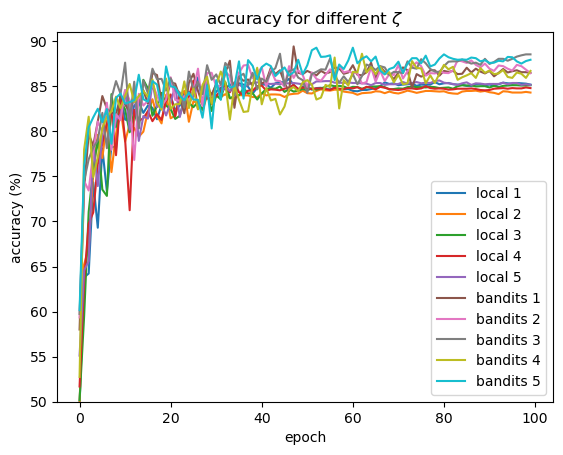

In [5]:
import os
import matplotlib.pyplot as plt 
import numpy as np
ax = plt.gca()
experiments = ['CHB_MIT_local_1','CHB_MIT_local_2',
               'CHB_MIT_local_3','CHB_MIT_local_4','CHB_MIT_local_5'
              ,'CHB_MIT_federated_1','CHB_MIT_federated_2','CHB_MIT_federated_3','CHB_MIT_federated_4','CHB_MIT_federated_5']
labels = ['local 1','local 2','local 3','local 4','local 5','bandits 1','bandits 2','bandits 3','bandits 4','bandits 5']
for i,experiment in enumerate(experiments): 
    accuracies = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'accuracies.txt'))
    plt.plot(accuracies,label=labels[i]);
    print(np.max(accuracies))
plt.legend()
ax.set_ylim([50,91])
ax.set_title('accuracy for different ' +r'$\zeta$')
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy (%)')


accuracy local:  84.94707127734651
accuracy mine:  87.22653493295695
accuracy local:  [98.4496124  93.14285714 88.03921569 74.80314961 91.42857143 87.71084337
 92.09876543 98.08219178 92.24489796 96.15023474 49.71428571 68.83116883
 89.01213172 92.8358209  95.34246575 94.57142857 82.54545455 64.07407407
 98.54545455 85.11627907]
accuracy mine:  [97.05426357 96.57142857 94.31372549 85.19685039 91.66666667 87.71084337
 89.5473251  98.08219178 95.51020408 95.68075117 54.85714286 83.63636364
 89.53206239 87.76119403 87.67123288 98.         80.36363636 80.37037037
 99.63636364 89.6124031 ]


(45.0, 100.0)

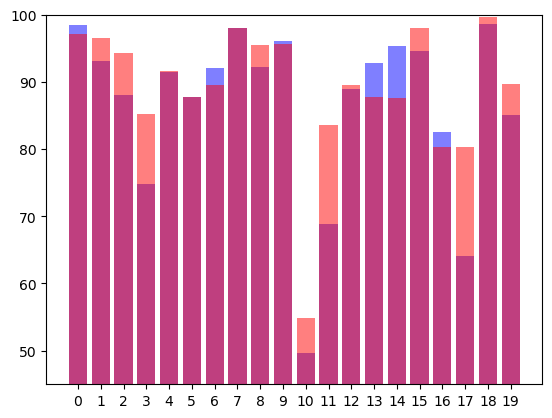

In [34]:
import os
import matplotlib.pyplot as plt 
import numpy as np
experiments = ['CHB_MIT_local_1','CHB_MIT_local_2',
               'CHB_MIT_local_3','CHB_MIT_local_4','CHB_MIT_local_5'
              ,'CHB_MIT_federated_1','CHB_MIT_federated_2','CHB_MIT_federated_3','CHB_MIT_federated_4','CHB_MIT_federated_5']
labels = ['local 1','local 2','local 3','local 4','local 5','bandits 1','bandits 2','bandits 3','bandits 4','bandits 5']
accuracies = []
accuracies_per_client = np.zeros((10,20))
for i,experiment in enumerate(experiments): 
    accuracies.append(np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt')))
    accuracies_per_client[i,:] = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracies.txt'))
print('accuracy local: ', np.mean(accuracies[:5]))
print('accuracy mine: ',np.mean(accuracies[5:]))
accuracy_local =  np.mean(accuracies_per_client[:5,:],axis=0) 
accuracy_mine =  np.mean(accuracies_per_client[5:,:],axis=0)
print('accuracy local: ', accuracy_local)
print('accuracy mine: ',accuracy_mine)
ax = plt.gca()
plt.bar([x for x in range(20)],accuracy_local,fc=(0, 0, 1, 0.5),tick_label=[str(x) for x in range(20)])
plt.bar([x for x in range(20)],accuracy_mine,fc=(1,0,0,0.5),tick_label=[str(x) for x in range(20)])
ax.set_ylim(45,100)

### Data preparation

In [1]:
### We first load the dataset 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
import h5py
import torch.nn.functional as F
!pip install torchsummary
from torchsummary import summary

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
with h5py.File('blub.h5','w') as h5w:
    l1 = [i for i in range(100)]
    h5w.create_dataset('test1',data=l1)
with h5py.File('blub.h5') as h5r:
    print(h5r['test1'].shape, h5r['test1'].dtype)

(100,) int64


In [3]:
current_idx = [x for x in range(85)]
train_idx = np.random.choice(current_idx,60,replace=False)
val_idx = [x for x in range(85) if x not in train_idx]
print(train_idx)
print(val_idx)

[ 8 73 37 77 30  3 75 83  4 14 52 28  1 72 40 25 45 21 13 34 22 65 42 18
 78 66 12 68 32 10 55 20 35 79 19 27 74 70 33 47 15 60  9 54 41 48 36  5
  6 64 57 16 49 17 76  0 29 71 84 62]
[2, 7, 11, 23, 24, 26, 31, 38, 39, 43, 44, 46, 50, 51, 53, 56, 58, 59, 61, 63, 67, 69, 80, 81, 82]


### Model

In [60]:
# network 
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv1d(1,32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            #nn.Dropout(0.2),
            nn.MaxPool1d(kernel_size=2, stride=5))
        self.layer2 = nn.Sequential(
            nn.Conv1d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            #nn.Dropout(0.2),
            nn.MaxPool1d(kernel_size=2, stride=3))
        self.layer3 = nn.Sequential(
            nn.Conv1d(64, 128, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            #nn.Dropout(0.2),
            nn.MaxPool1d(kernel_size=2, stride=3))
        self.layer4 = nn.Sequential(
            nn.Conv1d(128, 64, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            #nn.Dropout(0.2),
            nn.MaxPool1d(kernel_size=2, stride=3))

        self.fc = nn.Linear(64*15, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

num_classes = 2
model = ConvNet(num_classes).cuda()

summary(model,(1,2*1024))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1             [-1, 32, 2048]             192
       BatchNorm1d-2             [-1, 32, 2048]              64
              ReLU-3             [-1, 32, 2048]               0
         MaxPool1d-4              [-1, 32, 410]               0
            Conv1d-5              [-1, 64, 410]          10,304
       BatchNorm1d-6              [-1, 64, 410]             128
              ReLU-7              [-1, 64, 410]               0
         MaxPool1d-8              [-1, 64, 137]               0
            Conv1d-9             [-1, 128, 137]          41,088
      BatchNorm1d-10             [-1, 128, 137]             256
             ReLU-11             [-1, 128, 137]               0
        MaxPool1d-12              [-1, 128, 46]               0
           Conv1d-13               [-1, 64, 46]          41,024
      BatchNorm1d-14               [-1,

In [3]:
# network 
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv1d(1,16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            #nn.Dropout(0.2),
            nn.MaxPool1d(kernel_size=2, stride=5))
        
        self.layer1b = nn.Sequential(
            nn.Conv1d(16,32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm1d(32),
            nn.ReLU())
            #nn.Dropout(0.2),
            #nn.MaxPool1d(kernel_size=2, stride=5))
        
        self.layer2 = nn.Sequential(
            nn.Conv1d(32, 48, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm1d(48),
            nn.ReLU(),
            #nn.Dropout(0.2),
            nn.MaxPool1d(kernel_size=2, stride=3))
        
        self.layer2b = nn.Sequential(
            nn.Conv1d(48, 64, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm1d(64),
            nn.ReLU())
        
        self.layer3 = nn.Sequential(
            nn.Conv1d(64, 96, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm1d(96),
            nn.ReLU(),
            #nn.Dropout(0.2),
            nn.MaxPool1d(kernel_size=2, stride=3))
        
        self.layer3b = nn.Sequential(
            nn.Conv1d(96, 128, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            #nn.Dropout(0.2),
            )
        
        self.layer4 = nn.Sequential(
            nn.Conv1d(128, 64, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            #nn.Dropout(0.2),
            nn.MaxPool1d(kernel_size=2, stride=3))

        self.fc = nn.Linear(64*15, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer1b(out)
        out = self.layer2(out)
        out = self.layer2b(out)
        out = self.layer3(out)
        out = self.layer3b(out)
        out = self.layer4(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

num_classes = 2
model = ConvNet(num_classes).cuda()

summary(model,(1,2*1024))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1             [-1, 16, 2048]              96
       BatchNorm1d-2             [-1, 16, 2048]              32
              ReLU-3             [-1, 16, 2048]               0
         MaxPool1d-4              [-1, 16, 410]               0
            Conv1d-5              [-1, 32, 410]           2,592
       BatchNorm1d-6              [-1, 32, 410]              64
              ReLU-7              [-1, 32, 410]               0
            Conv1d-8              [-1, 48, 410]           7,728
       BatchNorm1d-9              [-1, 48, 410]              96
             ReLU-10              [-1, 48, 410]               0
        MaxPool1d-11              [-1, 48, 137]               0
           Conv1d-12              [-1, 64, 137]          15,424
      BatchNorm1d-13              [-1, 64, 137]             128
             ReLU-14              [-1, 

### Global training

In [4]:
# Split the seizures and allow to define the train ratio. 
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self,filepath,i,iteration,partition='train'):
        self.iteration = iteration
        self.filepath = filepath 
        self.partition = partition 
        self.number = i 
        images, labels = self.load_data()
        
        images, self.labels = self.train_val_test(images,labels)
        self.dataset = self.normalize(images)
        self.size = len(self.labels)
        
    def load_data(self):
        arrays = {}
        filepath = self.filepath + 'chb'+self.create_digits(self.number)+'_4s_0s.mat'
        f = h5py.File(filepath)
        index = 0 
        for k,v in f.items():
            arrays[index] = np.array(v)
            index = index +1 
        all_electrodes = np.transpose(arrays[0])
        labels = np.transpose(arrays[1])
        image = np.reshape(all_electrodes, (np.shape(all_electrodes)[0],-1,1024))
        selected_electrodes = [1,13]
        image = image[:,selected_electrodes,:]
        return image,labels

    def train_val_test(self,images,labels):
        
        # find the begin, end and the number of seizures 
        begin = 0 
        n_seizures = 0 
        seizure_onset = []
        seizure_end = []
        seizures = []
        non_seizures = []
        for ii in range(len(labels)): 
            if labels[ii]==1 and begin ==0: # check where the seizure begins
                n_seizures += 1 
                seizure_onset.append(ii)
            if labels[ii]==0 and begin ==1: # check where the seizure ends 
                seizure_end.append(ii-1)
            if labels[ii]==1: 
                seizures.append(ii)
                if ii == len(labels)-1:
                    seizure_end.append(ii)
            if labels[ii]==0: 
                non_seizures.append(ii)
            begin = labels[ii]
            
        # if it is even, put half of them in the train,
        # and half of them in the test dataset 
        
        train_idx = []
        test_idx = []
        # if it is odd, split one of the seizures and divide the rest.
        seizures_train = np.floor(n_seizures/2)
         
        for j in range(n_seizures):
            if j < int(seizures_train): 
                train_idx.append([x for x in range(seizure_onset[j],seizure_end[j]+1)])
            else: 
                if n_seizures % 2 == 0:
                    test_idx.append([x for x in range(seizure_onset[j],seizure_end[j]+1)])
                else: 
                    if j == int(seizures_train): #split seizure into 2 
                        train_idx.append([x for x in range(seizure_onset[j],
                                                           int(np.ceil(seizure_onset[j]+0.5*(seizure_end[j]-seizure_onset[j]))))])
                        test_idx.append([x for x in range(int(np.ceil(seizure_onset[j]+0.5*(seizure_end[j]-seizure_onset[j]))),
                                                         seizure_end[j]+1)])
                    else: 
                        test_idx.append([x for x in range(seizure_onset[j],seizure_end[j]+1)])
                        
        train_idx= np.sort(np.hstack([np.hstack(train_idx),[x for idx,x in enumerate(non_seizures) if idx < int(len(non_seizures)/2)]]))  
        test_idx= np.sort(np.hstack([np.hstack(test_idx),[x for idx,x in enumerate(non_seizures) if idx >= int(len(non_seizures)/2)]])) 
        
        
        #plt.plot(train_idx,labels[train_idx],'r.')
        #plt.plot(test_idx,labels[test_idx],'b.')
        
        train_data = images[train_idx,:,:]
        test_data = images[test_idx,:,:]
        train_labels = labels[train_idx]
        test_labels = labels[test_idx]
        
        
        #train_data, test_data, train_labels, test_labels = train_test_split(images,labels,random_state=1)
        train_data, val_data, train_labels, val_labels = train_test_split(train_data,train_labels,test_size=data_fraction,random_state=self.iteration)
        
        
        if self.partition == 'train':
            return train_data, train_labels
            
           # return images[:fraction_train,:,:], labels[:fraction_train]
        if self.partition == 'val':
            return val_data, val_labels
            
          #  return images[fraction_train:fraction_val,:,:],labels[fraction_train:fraction_val]
        if self.partition == 'test': 
            return test_data, test_labels
            
          #  return images[fraction_val:,:,:],labels[fraction_val:]

    def create_digits(self,number):
        if number <10: 
            return '0'+str(number)
        else: 
            return str(number)
        
    def normalize(self,data):
        input_shape = np.shape(data)
        data = np.reshape(data,(-1,1024))
        var = np.mean(data,axis=0)
        mean = np.mean(data,axis=0)
        normalized = (data -mean)/var
        normalized = np.reshape(data,(input_shape[0],2,1024))
        return normalized 


    def __getitem__(self, index):
        return torch.from_numpy(self.dataset[index,:,:]),torch.from_numpy(self.labels[index])

    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return len(self.labels)
    
filepath = '/mimer/NOBACKUP/groups/snic2022-22-122/arthur/'
data_fraction = 1
train_dataset = CustomDataset(filepath,12,0,'train')
val_dataset = CustomDataset(filepath,3,0,'val')
test_dataset = CustomDataset(filepath,3,0,'test')

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=32, 
                                           shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                           batch_size=4, 
                                           shuffle=False)
image, label = train_dataset.__getitem__(1)
print(image.shape)

torch.Size([2, 1024])


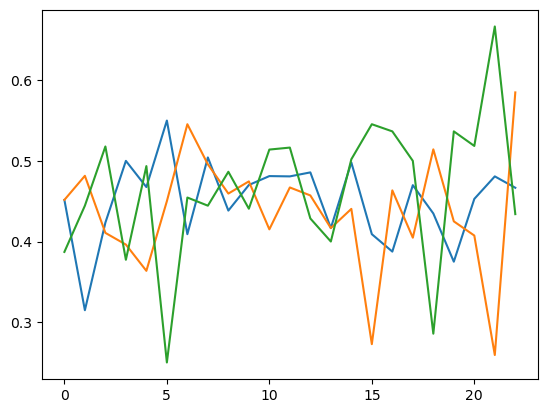

In [11]:
train_ratios = []
val_ratios = []
test_ratios = []
for patient in range(1,24):
    #print('patient: ',patient)
    train_dataset = CustomDataset(filepath,patient,0,'train')
    train_ratio = np.sum(train_dataset.labels)/len(train_dataset.labels)
    train_ratios.append(train_ratio)
    train_dataset = CustomDataset(filepath,patient,0,'val')
    train_ratio = np.sum(train_dataset.labels)/len(train_dataset.labels)
    val_ratios.append(train_ratio)
    train_dataset = CustomDataset(filepath,patient,0,'test')
    train_ratio = np.sum(train_dataset.labels)/len(train_dataset.labels)
    test_ratios.append(train_ratio)
    
plt.plot(train_ratios,label='train')
plt.plot(val_ratios,label='val')
plt.plot(test_ratios,label='test')

In [ ]:
### Rest of the code 

In [6]:
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 50
num_classes = 2
learning_rate = 0.005
patient = 4

model = ConvNet(num_classes).to(device).double()
filepath = '/mimer/NOBACKUP/groups/snic2022-22-122/arthur/'

train_size = 0 
val_size = 0 
test_size = 0 
for patient in range(1,24):
    train_dataset = CustomDataset(filepath,patient,0,'train')
    val_dataset = CustomDataset(filepath,patient,0,'val')
    test_dataset = CustomDataset(filepath,patient,0,'test')
    if patient != 1: 
        train_dataset_coll = torch.utils.data.ConcatDataset([train_dataset,train_dataset_coll])
        val_dataset_coll = torch.utils.data.ConcatDataset([val_dataset,val_dataset_coll])
        test_dataset_coll = torch.utils.data.ConcatDataset([test_dataset,test_dataset_coll])
    else: 
        train_dataset_coll = train_dataset
        val_dataset_coll = val_dataset
        test_dataset_coll = test_dataset
    train_size += train_dataset.size
    val_size += val_dataset.size
    test_size += test_dataset.size 
    train_dataset = train_dataset_coll
    val_dataset = val_dataset_coll
    test_dataset = test_dataset_coll 
print(len(train_dataset))
print(len(val_dataset))
print(train_size)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=32, 
                                           shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                           batch_size=4, 
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size = 4,
                                         shuffle=False)

2911
1462
2911


In [53]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
losses_list = []
losses_val_list = []
accuracies = []
accuracies_val = []
best_val_accuracy = 0 
accuracies_test = []
for epoch in range(num_epochs):
    print(epoch)
    losses = 0 
    losses_val = 0 

    model.train()
    accuracy = 0 
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.type(torch.LongTensor).squeeze(1).to(device)
        # Forward pass
        images = torch.reshape(images, (-1,1,2*1024))

        output = model(images)
        output = F.log_softmax(output,dim=1)

        loss = F.nll_loss(output,labels) #.detach().cpu().numpy()
        losses += torch.sum(loss).detach().cpu().numpy()

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        accuracy += sum(torch.argmax(output,1)==labels)
    accuracy = accuracy / (train_size)
    #if (i+1) % 100 == 0:
    #accuracies.append(accuracy.detach().cpu().numpy())
    losses_list.append(losses)
    #print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
    #           .format(epoch+1, num_epochs, i+1, total_step, accuracy))

    model.eval()
    accuracy = 0 
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)

        images = torch.reshape(images, (-1,1,2*1024))
        labels = labels.type(torch.LongTensor).squeeze(1).to(device)

        # Forward pass
        output = model(images)
        output = F.log_softmax(output,dim=1)
        loss = F.nll_loss(output,labels) #.detach().cpu().numpy()
        losses += torch.sum(loss).detach().cpu().numpy()

        accuracy += sum(torch.argmax(output,1)==labels)
    accuracy = accuracy / (train_size)
    #if (i+1) % 100 == 0:
    accuracies.append(accuracy.detach().cpu().numpy())
    #losses_val_list.append(losses)
    #print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
    #           .format(epoch+1, num_epochs, i+1, total_step, accuracy))

    accuracy = 0 
    for i, (images, labels) in enumerate(val_loader):
        images = images.to(device)
        images = torch.reshape(images, (-1,1,2*1024))
        labels = labels.type(torch.LongTensor).squeeze(1).to(device)

        # Forward pass
        output = model(images)
        output = F.log_softmax(output,dim=1)
        loss = F.nll_loss(output,labels) #.detach().cpu().numpy()
        losses += torch.sum(loss).detach().cpu().numpy()

        accuracy += sum(torch.argmax(output,1)==labels)
    accuracy = accuracy / (val_size)

    if accuracy > best_val_accuracy: 
        print(accuracy)
        best_val_accuracy = accuracy 
    test_accuracy = 0 
    label_array = []
    output_array = []
    for i, (images, labels) in enumerate(test_loader):
        images = images.to(device)
        images = torch.reshape(images, (-1,1,2*1024))
        labels = labels.type(torch.LongTensor).squeeze(1).to(device)

        # Forward pass
        output = model(images)
        output = F.log_softmax(output,dim=1)
        loss = F.nll_loss(output,labels) #.detach().cpu().numpy()
        losses += torch.sum(loss).detach().cpu().numpy()
        label_array.append(list(labels.detach().cpu().numpy()))
        output_array.append(list(torch.argmax(output,1).detach().cpu().numpy()))
        test_accuracy += sum(torch.argmax(output,1)==labels)
    test_accuracy = test_accuracy / (test_size)
    print(test_accuracy)
    calc_table(label_array,output_array)

    #if (i+1) % 100 == 0:
    accuracies_val.append(accuracy.detach().cpu().numpy())
    accuracies_test.append(test_accuracy.detach().cpu().numpy())
    losses_val_list.append(losses)

0
tensor(0.4937, device='cuda:0')
tensor(0.5380, device='cuda:0')
TP:  33
TN:  434
FP:  0
FN:  401
1
tensor(0.7794, device='cuda:0')
tensor(0.7224, device='cuda:0')
TP:  211
TN:  416
FP:  18
FN:  223
2
tensor(0.8183, device='cuda:0')
tensor(0.7673, device='cuda:0')
TP:  275
TN:  391
FP:  43
FN:  159
3
tensor(0.7615, device='cuda:0')
TP:  294
TN:  367
FP:  67
FN:  140
4
tensor(0.7742, device='cuda:0')
TP:  290
TN:  382
FP:  52
FN:  144
5
tensor(0.7535, device='cuda:0')
TP:  261
TN:  393
FP:  41
FN:  173
6
tensor(0.7051, device='cuda:0')
TP:  236
TN:  376
FP:  58
FN:  198
7
tensor(0.7627, device='cuda:0')
TP:  311
TN:  351
FP:  83
FN:  123
8
tensor(0.7880, device='cuda:0')
TP:  326
TN:  358
FP:  76
FN:  108
9
tensor(0.7903, device='cuda:0')
TP:  309
TN:  377
FP:  57
FN:  125
10
tensor(0.7846, device='cuda:0')
TP:  284
TN:  397
FP:  37
FN:  150
11
tensor(0.7396, device='cuda:0')
TP:  297
TN:  345
FP:  89
FN:  137
12
tensor(0.7581, device='cuda:0')
TP:  324
TN:  334
FP:  100
FN:  110
13
te

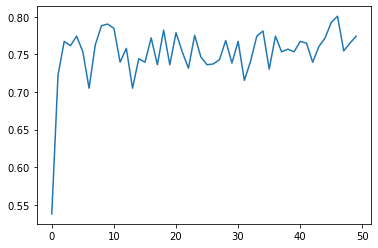

In [56]:
#accuracies_test_global = accuracies_test
plt.plot(accuracies_test_global)

### Local training

In [81]:
#print(np.ravel(output_array))
def calc_table(label_array,output_array):
    TP = 0 
    TN = 0 
    FP = 0 
    FN = 0 
    for i,ele in enumerate(output_array): 
        for j,ele2 in enumerate(ele): 
            if ele2 == 1 and label_array[i][j] == 1: 
                TP += 1 
            if ele2 == 0 and label_array[i][j] ==0:
                TN += 1
            if ele2 == 1 and label_array[i][j] ==0: 
                FP += 1 
            if ele2 ==0 and label_array[i][j] == 1: 
                FN += 1 

    print('TP: ',TP)
    print('TN: ',TN)
    print('FP: ',FP)
    print('FN: ',FN)
            

In [ ]:
    num_zeros = 0 
num_ones = 0 
for i, (images, labels) in enumerate(test_loader):
    num_ones += torch.sum(labels)
    num_zeros += len(labels)-torch.sum(labels)
print(num_zeros)
print(num_ones)

In [83]:
import copy

torch.manual_seed(42)
np.random.seed(42)
torch.cuda.manual_seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

accuracies_val1 = []
accuracies_test1 = []
network = ConvNet(num_classes).double().cuda()
for patient in range(1,24): #,24):
    print(patient)
    # Hyper parameters
    num_epochs = 10
    num_classes = 2
    learning_rate = 0.005
    #patient = 4
    
    model = copy.deepcopy(network)

    
    filepath = '/mimer/NOBACKUP/groups/snic2022-22-122/arthur/'
    train_dataset = CustomDataset(filepath,patient,'train')
    val_dataset = CustomDataset(filepath,patient,'val')
    test_dataset = CustomDataset(filepath,patient,'test')
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=32, 
                                               shuffle=True)
    val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                               batch_size=32, 
                                               shuffle=False)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                             batch_size = 32,
                                             shuffle=False)

    # Loss and optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    total_step = len(train_loader)
    losses_list = []
    losses_val_list = []
    accuracies = []
    accuracies_val = []
    best_val_accuracy = 0 
    for epoch in range(num_epochs):
        #print(model.layer1[0].weight.detach().cpu().numpy())
        losses = 0 
        losses_val = 0 

        model.train()
        accuracy = 0 
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.type(torch.LongTensor).squeeze(1).to(device)
            # Forward pass
            images = torch.reshape(images, (-1,1,2*1024))

            output = model(images)
            output = F.log_softmax(output,dim=1)

            loss = F.nll_loss(output,labels) #.detach().cpu().numpy()
            losses += torch.sum(loss).detach().cpu().numpy()

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            accuracy += sum(torch.argmax(output,1)==labels)
        accuracy = accuracy / (train_dataset.size)
        #if (i+1) % 100 == 0:
        #accuracies.append(accuracy.detach().cpu().numpy())
        losses_list.append(losses)
        #print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
        #           .format(epoch+1, num_epochs, i+1, total_step, accuracy))

        model.eval()
        accuracy = 0 
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)

            images = torch.reshape(images, (-1,1,2*1024))
            labels = labels.type(torch.LongTensor).squeeze(1).to(device)

            # Forward pass
            output = model(images)
            output = F.log_softmax(output,dim=1)
            loss = F.nll_loss(output,labels) #.detach().cpu().numpy()
            losses += torch.sum(loss).detach().cpu().numpy()

            accuracy += sum(torch.argmax(output,1)==labels)
        accuracy = accuracy / (train_dataset.size)
        #if (i+1) % 100 == 0:
        accuracies.append(accuracy.detach().cpu().numpy())
        #losses_val_list.append(losses)
        #print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
        #           .format(epoch+1, num_epochs, i+1, total_step, accuracy))

        accuracy = 0 
        for i, (images, labels) in enumerate(val_loader):
            images = images.to(device)
            images = torch.reshape(images, (-1,1,2*1024))
            labels = labels.type(torch.LongTensor).squeeze(1).to(device)

            # Forward pass
            output = model(images)
            output = F.log_softmax(output,dim=1)
            loss = F.nll_loss(output,labels) #.detach().cpu().numpy()
            losses += torch.sum(loss).detach().cpu().numpy()

            accuracy += sum(torch.argmax(output,1)==labels)
        accuracy = accuracy / (val_dataset.size)

        if accuracy > best_val_accuracy: 
            print(accuracy)
            best_val_accuracy = accuracy 
            test_accuracy = 0 
            label_array = []
            output_array = []
            for i, (images, labels) in enumerate(test_loader):
                images = images.to(device)
                images = torch.reshape(images, (-1,1,2*1024))
                labels = labels.type(torch.LongTensor).squeeze(1).to(device)

                # Forward pass
                output = model(images)
                output = F.log_softmax(output,dim=1)
                loss = F.nll_loss(output,labels) #.detach().cpu().numpy()
                losses += torch.sum(loss).detach().cpu().numpy()
                label_array.append(list(labels.detach().cpu().numpy()))
                output_array.append(list(torch.argmax(output,1).detach().cpu().numpy()))
                test_accuracy += sum(torch.argmax(output,1)==labels)
            test_accuracy = test_accuracy / (test_dataset.size)
            print(test_accuracy)
            calc_table(label_array,output_array)
            
        else: 
            #print('not the best accuracy')
            test_accuracy = 0 
            label_array = []
            output_array = []
            for i, (images, labels) in enumerate(test_loader):
                images = images.to(device)
                images = torch.reshape(images, (-1,1,2*1024))
                labels = labels.type(torch.LongTensor).squeeze(1).to(device)

                # Forward pass
                output = model(images)
                output = F.log_softmax(output,dim=1)
                loss = F.nll_loss(output,labels) #.detach().cpu().numpy()
                losses += torch.sum(loss).detach().cpu().numpy()
                label_array.append(list(labels.detach().cpu().numpy()))
                output_array.append(list(torch.argmax(output,1).detach().cpu().numpy()))
                test_accuracy += sum(torch.argmax(output,1)==labels)
            test_accuracy = test_accuracy / (test_dataset.size)
            #print(test_accuracy)


        #if (i+1) % 100 == 0:
        accuracies_val.append(accuracy.detach().cpu().numpy())
        
        losses_val_list.append(losses)
    accuracies_val1.append(best_val_accuracy) #.detach().cpu().numpy())
    accuracies_test1.append(test_accuracy.detach().cpu().numpy())
       # print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
        #           .format(epoch+1, num_epochs, i+1, total_step, accuracy))

1
tensor(0.5161, device='cuda:0')
tensor(0.4324, device='cuda:0')
TP:  0
TN:  16
FP:  21
FN:  0
tensor(0.8065, device='cuda:0')
tensor(0.7568, device='cuda:0')
TP:  0
TN:  28
FP:  9
FN:  0
tensor(0.9032, device='cuda:0')
tensor(0.8919, device='cuda:0')
TP:  0
TN:  33
FP:  4
FN:  0
tensor(1., device='cuda:0')
tensor(0.9730, device='cuda:0')
TP:  0
TN:  36
FP:  1
FN:  0
2
tensor(0.5185, device='cuda:0')
tensor(0.1875, device='cuda:0')
TP:  0
TN:  3
FP:  13
FN:  0
tensor(0.5926, device='cuda:0')
tensor(0.6250, device='cuda:0')
TP:  0
TN:  10
FP:  6
FN:  0
tensor(0.7037, device='cuda:0')
tensor(0.6875, device='cuda:0')
TP:  0
TN:  11
FP:  5
FN:  0
tensor(0.7778, device='cuda:0')
tensor(0.6875, device='cuda:0')
TP:  0
TN:  11
FP:  5
FN:  0
tensor(0.8148, device='cuda:0')
tensor(0.9375, device='cuda:0')
TP:  0
TN:  15
FP:  1
FN:  0
tensor(0.8519, device='cuda:0')
tensor(1., device='cuda:0')
TP:  0
TN:  16
FP:  0
FN:  0
tensor(0.8889, device='cuda:0')
tensor(1., device='cuda:0')
TP:  0
TN:  1

/tmp/ipykernel_3225984/1293631241.py:45: RuntimeWarning: divide by zero encountered in divide
  normalized = (data -mean)/var


tensor(0.8077, device='cuda:0')
tensor(0., device='cuda:0')
TP:  0
TN:  0
FP:  16
FN:  0
22
tensor(0.3704, device='cuda:0')
tensor(0.4000, device='cuda:0')
TP:  0
TN:  6
FP:  0
FN:  9
tensor(0.7037, device='cuda:0')
tensor(0.6000, device='cuda:0')
TP:  9
TN:  0
FP:  6
FN:  0
tensor(0.7407, device='cuda:0')
tensor(0.6667, device='cuda:0')
TP:  9
TN:  1
FP:  5
FN:  0
tensor(0.8519, device='cuda:0')
tensor(0.7333, device='cuda:0')
TP:  9
TN:  2
FP:  4
FN:  0
tensor(0.8889, device='cuda:0')
tensor(0.7333, device='cuda:0')
TP:  9
TN:  2
FP:  4
FN:  0
tensor(0.9259, device='cuda:0')
tensor(0.7333, device='cuda:0')
TP:  9
TN:  2
FP:  4
FN:  0
tensor(0.9630, device='cuda:0')
tensor(0.8000, device='cuda:0')
TP:  9
TN:  3
FP:  3
FN:  0
tensor(1., device='cuda:0')
tensor(0.8667, device='cuda:0')
TP:  9
TN:  4
FP:  2
FN:  0
23
tensor(0.0189, device='cuda:0')
tensor(0.2258, device='cuda:0')
TP:  0
TN:  7
FP:  24
FN:  0
tensor(0.3019, device='cuda:0')
tensor(0.6129, device='cuda:0')
TP:  0
TN:  19
F

In [344]:
print(i)
print(test_dataset.size)

0
16


0.6692542


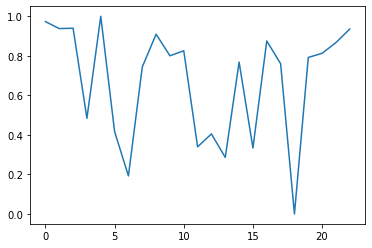

In [84]:
#print(accuracies_val1)
#print(accuracies_test1)
#print(np.mean(accuracies_val1))
print(np.mean(accuracies_test1))
# compare this to global training 
#plt.plot(accuracies_val1)
plt.plot(accuracies_test1)

In [85]:
# calculate the real average accuracy, taking into account the difference in dataset sizes. 
#size_total = 0 
accuracies_normalized = 0 
for patient in range(1,24):
    #print(patient)
    test_dataset = CustomDataset(filepath,patient,'test')
    #print(test_dataset.size)
    #size_total += test_dataset.size 
    fraction = test_dataset.size / size_total 
    accuracies_normalized += accuracies_test1[patient-1]*fraction
print(size_total)
print(accuracies_normalized)

868
0.6854838757058992


/tmp/ipykernel_3225984/1293631241.py:45: RuntimeWarning: divide by zero encountered in divide
  normalized = (data -mean)/var


In [ ]:
#62.24611708482676

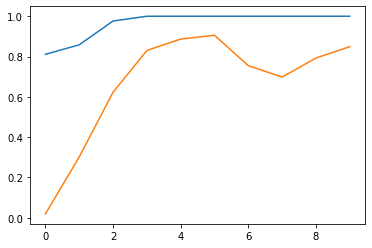

In [86]:
plt.plot(accuracies)
plt.plot(accuracies_val)

### Bandits

In [5]:
# You should build your custom dataset as below.
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self,filepath,i,iteration,partition='train'):
        self.iteration = iteration
        self.filepath = filepath 
        self.partition = partition 
        self.number = i 
        images, labels = self.load_data()
        
        images, self.labels = self.train_val_test(images,labels)
        self.dataset = self.normalize(images)
        #print(self.labels)
        self.size = len(self.labels)
        
    def load_data(self):
        arrays = {}
        filepath = self.filepath + 'chb'+self.create_digits(self.number)+'_4s_0s.mat'
        f = h5py.File(filepath)
        index = 0 
        for k,v in f.items():
            arrays[index] = np.array(v)
            index = index +1 
        all_electrodes = np.transpose(arrays[0])
        labels = np.transpose(arrays[1])
        image = np.reshape(all_electrodes, (np.shape(all_electrodes)[0],-1,1024))
        selected_electrodes = [1,13]
        image = image[:,selected_electrodes,:]
        return image,labels

    def train_val_test(self,images,labels):
        fraction_train = int(np.ceil(0.6*len(labels)))
        fraction_val = int(np.ceil(0.75*len(labels)))
        np.random.seed(self.iteration)
        current_idx = [x for x in range(fraction_val)]
        train_idx = np.random.choice(current_idx,fraction_train,replace=False)
        val_idx = [x for x in range(fraction_val) if x not in train_idx]
        
        if self.partition == 'train':
            #print(train_idx)
            return images[train_idx,:,:], labels[train_idx]
        if self.partition == 'val':
            #print(val_idx)
            return images[val_idx,:,:], labels[val_idx]
            #return image[fraction_train:fraction_val,:,:],labels[fraction_train:fraction_val]
        if self.partition == 'test': 
            #print(fraction_val)
            return images[fraction_val:,:,:],labels[fraction_val:]

    def create_digits(self,number):
        if number <10: 
            return '0'+str(number)
        else: 
            return str(number)
        
    def normalize(self,data):
        input_shape = np.shape(data)
        data = np.reshape(data,(-1,1024))
        var = np.mean(data,axis=0)
        mean = np.mean(data,axis=0)
        normalized = (data -mean)/var
        normalized = np.reshape(data,(input_shape[0],2,1024))
        return normalized 


    def __getitem__(self, index):
        return torch.from_numpy(self.dataset[index,:,:]),torch.from_numpy(self.labels[index])

    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return len(self.labels)
    
filepath = '/mimer/NOBACKUP/groups/snic2022-22-122/arthur/'

train_dataset = CustomDataset(filepath,3,0,'train')
val_dataset = CustomDataset(filepath,3,0,'val')
test_dataset = CustomDataset(filepath,3,0,'test')

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=32, 
                                           shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                           batch_size=4, 
                                           shuffle=False)
image, label = train_dataset.__getitem__(1)
print(image.shape)

torch.Size([2, 1024])


In [157]:
# You should build your custom dataset as below.
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self,filepath,i,iteration,partition='train'):
        self.iteration = iteration
        self.filepath = filepath 
        self.partition = partition 
        self.number = i 
        images, labels = self.load_data()
        images, self.labels = self.train_val_test(images,labels)
        self.dataset = self.normalize(images)
        self.size = len(self.labels)
        
    def load_data(self):
        arrays = {}
        filepath = self.filepath + 'chb'+self.create_digits(self.number)+'_4s_0s.mat'
        f = h5py.File(filepath)
        index = 0 
        for k,v in f.items():
            arrays[index] = np.array(v)
            index = index +1 
        all_electrodes = np.transpose(arrays[0])
        labels = np.transpose(arrays[1])
        image = np.reshape(all_electrodes, (np.shape(all_electrodes)[0],-1,1024))
        selected_electrodes = [1,13]
        image = image[:,selected_electrodes,:]
        return image,labels

    def train_val_test(self,images,labels):
        train_data, test_data, train_labels, test_labels = train_test_split(images,labels,random_state=1)
        train_data, val_data, train_labels, val_labels = train_test_split(train_data,train_labels,test_size=0.333,random_state=self.iteration)
        
        fraction_train = int(np.ceil(0.6*len(labels)))
        fraction_val = int(np.ceil(0.75*len(labels)))
        if self.partition == 'train':
            return train_data, train_labels
            
           # return images[:fraction_train,:,:], labels[:fraction_train]
        if self.partition == 'val':
            return val_data, val_labels
            
          #  return images[fraction_train:fraction_val,:,:],labels[fraction_train:fraction_val]
        if self.partition == 'test': 
            return test_data, test_labels
            
          #  return images[fraction_val:,:,:],labels[fraction_val:]

    def create_digits(self,number):
        if number <10: 
            return '0'+str(number)
        else: 
            return str(number)
        
    def normalize(self,data):
        input_shape = np.shape(data)
        data = np.reshape(data,(-1,1024))
        var = np.mean(data,axis=0)
        mean = np.mean(data,axis=0)
        normalized = (data -mean)/var
        normalized = np.reshape(data,(input_shape[0],2,1024))
        return normalized 


    def __getitem__(self, index):
        return torch.from_numpy(self.dataset[index,:,:]),torch.from_numpy(self.labels[index])

    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return len(self.labels)
    
filepath = '/mimer/NOBACKUP/groups/snic2022-22-122/arthur/'

train_dataset = CustomDataset(filepath,3,0,'train')
val_dataset = CustomDataset(filepath,3,0,'val')
test_dataset = CustomDataset(filepath,3,0,'test')

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=32, 
                                           shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                           batch_size=4, 
                                           shuffle=False)
image, label = train_dataset.__getitem__(1)
print(image.shape)

torch.Size([2, 1024])


In [158]:
for patient in range(1,24):
    print('patient: ',patient)
    train_dataset = CustomDataset(filepath,patient,0,'train')
    train_ratio = np.sum(train_dataset.labels)/len(train_dataset.labels)
    print(train_ratio)
    train_dataset = CustomDataset(filepath,patient,0,'val')
    train_ratio = np.sum(train_dataset.labels)/len(train_dataset.labels)
    print(train_ratio)
    train_dataset = CustomDataset(filepath,patient,0,'test')
    train_ratio = np.sum(train_dataset.labels)/len(train_dataset.labels)
    print(train_ratio)
    


patient:  1
0.45161290322580644
0.45161290322580644
0.3870967741935484
patient:  2
0.3148148148148148
0.48148148148148145
0.4444444444444444
patient:  3
0.42342342342342343
0.4107142857142857
0.5178571428571429
patient:  4
0.5
0.39622641509433965
0.37735849056603776
patient:  5
0.4675324675324675
0.36363636363636365
0.4935064935064935
patient:  6
0.55
0.45
0.25
patient:  7
0.4090909090909091
0.5454545454545454
0.45454545454545453
patient:  8
0.5042735042735043
0.49572649572649574
0.4444444444444444
patient:  9
0.4383561643835616
0.4594594594594595
0.4864864864864865
patient:  10
0.4700854700854701
0.4745762711864407
0.4406779661016949
patient:  11
0.4811320754716981
0.41509433962264153
0.514018691588785
patient:  12
0.4807692307692308
0.46703296703296704
0.5164835164835165
patient:  13
0.4857142857142857
0.45714285714285713
0.42857142857142855
patient:  14
0.4166666666666667
0.4166666666666667
0.4
patient:  15
0.498015873015873
0.44047619047619047
0.5019762845849802
patient:  16
0.4090

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from scipy.special import binom

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
from torchvision import transforms
from torch.autograd import Variable
import torch.utils.data as data_utils
import torch.nn.init as init

from collections import Counter
import operator
import copy
from itertools import product,combinations
from time import time
#from IPython.core.display import display

#%matplotlib inline

## code extracted from https://www.kaggle.com/code/graymant/breast-cancer-diagnosis-with-pytorch
## SV code extracted from https://github.com/mburaksayici/ExplainableAI-Pure-Numpy/blob/main/KernelSHAP-Pure-Numpy.ipynb

import yaml
import os
import shutil

# Combinatorial UCB
import math

def init():
    with open('settings/train_settings_bandits.yaml', 'r') as file:
        settings = yaml.safe_load(file)
    if not os.path.isdir('checkpoints_bandits'):
        os.mkdir('checkpoints_bandits')
    if not os.path.isdir(os.path.join('checkpoints_bandits', settings['experiment_name'])):
        os.mkdir(os.path.join('checkpoints_bandits', settings['experiment_name']))
    save_dir = os.path.join('checkpoints_bandits', settings['experiment_name'])
    if not os.path.isdir(os.path.join(save_dir, 'model')):
        os.mkdir(os.path.join(save_dir, 'model'))
    shutil.copyfile('settings/train_settings_bandits.yaml', save_dir + '/train_settings.yaml')
    return settings,save_dir

In [9]:
class combinatorial_UCB(object):
    def __init__(self, n_clients, n_clients_selected=10, algorithm='UCB1_tuned'):
        self.n_clients = n_clients

        # define variables for storage
        # which clients we select
        self.times_selected = np.zeros((n_clients, n_clients))  # to record how often each client got selected
        self.reward_per_client = np.zeros((n_clients, n_clients))  # to record what reward we collected per client
        self.reward2_per_client = np.zeros(
            (n_clients, n_clients))  # to record the squared reward per client (needed for UCB1-tuned)
        # how many clients we select
        self.n_clients_selected_arr = []
        self.reward3_per_client = np.zeros((n_clients, n_clients - 1))
        self.times_selected2 = np.zeros((n_clients, n_clients - 1))

        if n_clients_selected == None:
            self.n_clients_selected = np.zeros((n_clients, 1))
        else:
            self.n_clients_selected = np.ones((n_clients, 1)) * n_clients_selected

        self.algorithm = algorithm

    def UCB(self, this_client, n):
        # for this_client in range(self.n_clients):
        other_clients = [x for x in range(self.n_clients) if x != this_client[0]]

        upper_bound = np.zeros(self.n_clients)
        for i, other_client in enumerate(other_clients):
            if self.times_selected[this_client, other_client] == 0:  # make first iteration value high
                upper_bound[other_client] = 1e500
            else:
                # We first calculate the average reward gained for this client
                average_reward = self.reward_per_client[this_client, other_client] / self.times_selected[
                    this_client, other_client]

                # Then we compute the confidence interval [avg_reward - delta, avg_reward + delta]
                if self.algorithm == 'UCB1':
                    delta = math.sqrt(2 * math.log(n) / self.times_selected[this_client, other_client])

                if self.algorithm == 'UCB1_tuned':
                    variance_bound = self.reward2_per_client[this_client, other_client] / self.times_selected[
                        this_client, other_client] - average_reward ** 2
                    variance_bound += math.sqrt(2 * math.log(n) / self.times_selected[this_client, other_client])

                    factor = np.min([variance_bound, 1 / 4])
                    delta = math.sqrt(factor * math.log(n) / self.times_selected[this_client, other_client])

                # upper bound
                upper_bound[other_client] = average_reward + delta

        if self.algorithm == 'random':
            upper_bound = np.random.rand(self.n_clients)

        # select the client with the highest upper bound
        sorted_upper_bound = np.flip(np.argsort(upper_bound))

        # if epoch == 0:
        #     n_clients_selected = self.n_clients -2

        # else:
        n_clients_selected = self.n_clients_selected[i]-1

        # Run UCB again to determine the number of clients
        # upper_bound2 = np.zeros(self.n_clients-1)
        # for ii in range(1,self.n_clients-1):
        #    if self.times_selected2[this_client,ii]==0: # make first iteration value high
        #        upper_bound2[ii] = 1e500
        #        n_clients_selected = self.n_clients -2
        #    else:
        # predict the reward when selecting these clients
        #        average_reward_n_clients = self.reward3_per_client[this_client,ii] / self.times_selected2[this_client,ii]
        #        delta = math.sqrt(2*math.log(n)) / np.sum(self.times_selected2[this_client,ii])

        #        upper_bound2[ii] = average_reward_n_clients + delta

        #        n_clients_selected = np.argmax(upper_bound2)

        # n_clients_selected_arr.append(n_clients_selected)
        selected_clients = sorted_upper_bound[:int(n_clients_selected + 1)]

        self.times_selected[this_client, selected_clients] += 1
        return selected_clients

    def collect_reward(self, this_client, selected_clients, observations):
        # collect the reward
        reward = observations[selected_clients]  # df.iloc[n,selected_client]
        self.reward_per_client[this_client, selected_clients] += reward
        self.reward2_per_client[this_client, selected_clients] += reward ** 2

        # reward for numbers of clients selected
        # n_clients_selected = len(selected_clients)-1
        # self.times_selected2[this_client,n_clients_selected] += 1

    # if epoch == 0:
    #     self.n_clients_selected[this_client] = np.sum(observations)
    # reward2 = np.abs(n_clients_selected - np.sum(observations))
    # self.reward3_per_client[this_client,n_clients_selected] += 1 - reward2 / self.n_clients

    def to_client(self, this_client, n):
        self.selected_clients = self.UCB(this_client, n)
        return self.selected_clients

    def to_server(self, this_client, observation):
        self.collect_reward(this_client, self.selected_clients, observation)

In [171]:
class P2P_AFPL():
    def __init__(self, patients_left, n_clients_selected,test='local'):
        self.selected_clients = patients_left
        self.network = ConvNet(2).to(device).double()
        self.best_test_loss = {}
        self.best_test_loss_global = 1000000
        self.current_test_loss = {}
        self.current_train_loss = {}
        self.test = test
        self.total_clients = len(self.selected_clients)
        self.patients_left = patients_left
        self.client_models = {}
        self.optimizers = {}
        self.dataloaders = {}
        self.len = {}
        self.len_test = {}
        self.len_really_test = {}
        self.dataloaders_test = {}
        self.dataloaders_really_test = {}
        filepath = '/mimer/NOBACKUP/groups/snic2022-22-122/arthur/'
        
        if self.test == 'AFPL':
            self.client_models_global = {}

        if self.test == 'bandits':
            self.comb_UCB = combinatorial_UCB(self.total_clients,n_clients_selected)

        for idx, i in enumerate(self.patients_left):
            self.client_models[str(idx)] = copy.deepcopy(self.network).double().cuda()
            self.optimizers[str(idx)] = torch.optim.SGD(self.client_models[str(idx)].parameters(), lr=0.01,
                                                        momentum=0.5)
            dataset_train = CustomDataset(filepath,self.patients_left[idx],0,'train')
            self.len[str(idx)] = len(dataset_train)
            self.dataloaders[str(idx)] = DataLoader(dataset_train, batch_size=32, shuffle=True, num_workers=0)

            dataset_test = CustomDataset(filepath,self.patients_left[idx],0,'val')
            self.len_test[str(idx)] = len(dataset_test)
            self.dataloaders_test[str(idx)] = DataLoader(dataset_test, batch_size=32, shuffle=False)
            self.best_test_loss[str(idx)] = 10000000
            self.current_test_loss[str(idx)] = 100000
            self.current_train_loss[str(idx)] = 1000000
            if self.test == 'AFPL':
                self.client_models_global[str(idx)] = copy.deepcopy(self.network).double().cuda()
                self.shared_model = copy.deepcopy(self.network).double().cuda()

            dataset_really_test = CustomDataset(filepath,self.patients_left[idx],0,'test')
            self.len_really_test[str(idx)] = len(dataset_really_test)
            self.dataloaders_really_test[str(idx)] = DataLoader(dataset_really_test, batch_size=32, shuffle=False)
        self.dataset_train = dataset_train

    def update_local_models(self, selected_clients):
        self.dw = {}
        loss_test = 0
        loss_test2 = 0
        losses = 0
        losses2 = 0
        loss_test3 = 0
        losses3 = 0
        losses4 = 0 

        for idx, i in enumerate(selected_clients):
            if self.iteration == 1000: 
                dataset_train = CustomDataset(filepath,i+1,self.iteration,'train')
                self.dataloaders[str(i)] = DataLoader(dataset_train, batch_size=32, shuffle=True, num_workers=0)

                dataset_test = CustomDataset(filepath,i+1,self.iteration,'val')
                self.dataloaders_test[str(i)] = DataLoader(dataset_test, batch_size=32, shuffle=False)

            dataloader = self.dataloaders[str(i)]
            optimizer = torch.optim.Adam(self.client_models[str(i)].parameters(), lr=0.005 * 0.95 ** self.iteration)
            self.client_models[str(i)].train()

            if self.test == 'AFPL':
                self.client_models_global[str(i)] = copy.deepcopy(self.shared_model)
                self.client_models_global[str(i)].train()
                optimizer_global = torch.optim.Adam(self.client_models_global[str(i)].parameters(),
                                                    lr=0.005 * 0.95 ** self.iteration)

            for batch_idx, (data, target) in enumerate(dataloader):
                data = data.cuda()
                target = target.type(torch.LongTensor).squeeze(1).cuda()
                # Forward pass
                data = torch.reshape(data, (-1,1,2*1024))
                output = self.client_models[str(i)](data)
                output = F.log_softmax(output, dim=-1)
                # data = data.double().cuda()
                # target=target.long().cuda()

                optimizer.zero_grad()
                # output = self.client_models[str(i)](data)
                loss = F.nll_loss(output, target)

                if self.test == 'AFPL':
                    optimizer_global.zero_grad()
                    output_global = self.client_models_global[str(i)](data)
                    loss_global = F.nll_loss(output_global, target)
                    loss_global.backward()
                    optimizer_global.step()

                loss.backward()
                optimizer.step()

            self.client_models[str(i)].eval()
            dataloader_test = self.dataloaders_test[str(i)]
            loss_test = 0
            with torch.no_grad():
                for batch_idx, (data, target) in enumerate(dataloader_test):
                    data = data.cuda()
                    target = target.type(torch.LongTensor).squeeze(1).cuda()
                    # Forward pass
                    data = torch.reshape(data, (-1,1,2*1024))
                    output = self.client_models[str(i)](data)
                    output = F.log_softmax(output, dim=-1)

                    loss_test += F.nll_loss(output, target)
                self.current_test_loss[str(i)] = loss_test / self.len_test[str(i)]
                if self.current_test_loss[str(i)] < self.best_test_loss[str(i)]:
                    torch.save(self.client_models[str(i)].state_dict(),
                               os.path.join(save_dir, 'model', 'best_model' + str(i) + '.pt'))
                    self.best_test_loss[str(i)] = self.current_test_loss[str(i)]

            losses += loss_test / self.len_test[str(i)]
            loss_test2 = 0
            self.client_models[str(i)].eval()
            with torch.no_grad():
                for batch_idx, (data, target) in enumerate(dataloader):
                    data = data.cuda()
                    target = target.type(torch.LongTensor).squeeze(1).cuda()
                    # Forward pass
                    data = torch.reshape(data, (-1,1,2*1024))
                    output = self.client_models[str(i)](data)
                    output = F.log_softmax(output, dim=-1)

                    loss_test2 += F.nll_loss(output, target)

            losses2 += loss_test2 / self.len[str(i)]
            self.current_train_loss[str(i)] = loss_test2 / self.len[str(i)]
        print('losses before: ',losses4)
        print('full train loss: ', losses2)
        print('full loss: ', losses)

        return losses2, losses

    def combine_models(self, i, client_numbers, set_as=True):
        zero_copy = copy.deepcopy(self.client_models[str(i)])  # This is used to collect the model in
        j = 0
        client_numbers_plus_client = np.concatenate((client_numbers, np.array([int(i)])))  # This is more efficient
        #  alphas = zero_copy.alphas.detach()
        # alphas[i] = 1 - torch.sum(
        #     torch.tensor([iii for idx, iii in enumerate(alphas) if idx != i and idx in client_numbers]))
        # It's not possible to set the value of self.alphas[i], so instead we determine it manually here
        alphas = torch.ones(len(client_numbers_plus_client)).cuda() / (len(client_numbers_plus_client))
        # print(alphas)
        for ii in client_numbers_plus_client:
            #  print(ii)
            for (name, param), (name2, param2) in zip(zero_copy.named_parameters(), self.client_models[
                str(ii)].named_parameters()):  # self.client_models[str(ii)].named_parameters()):

                if name != 'alphas':
                    if j == 0:
                        param.data = torch.zeros(param.shape).cuda()

                    param.data += alphas[j] * param2.data  # we add all participating client's models to the one here.

            j += 1

        # self.client_models[str(i)] = zero_copy.double()
        if set_as == True:
            for (name, param), (name2, param2) in zip(self.client_models[str(i)].named_parameters(),
                                                      zero_copy.named_parameters()):
                param.data = param2.data
            self.client_models[str(i)].double()
        else:
            return zero_copy.double()

    def federated_averaging(self):
        self.shared_model = copy.deepcopy(self.network).double().cuda()
        n_clients = len(self.selected_clients)
        weight = [self.len[str(x)] for x in self.selected_clients]
        weight = weight / np.sum(weight)

        losses = 0
        losses2 = 0
        # print("weights ",weight)
        for idx, i in enumerate(self.selected_clients):
            for (name, param), (name2, param2) in zip(self.shared_model.named_parameters()
                    , self.client_models[str(i)].named_parameters()):
                if idx == 0:
                    param.data = torch.zeros(param.shape).cuda().double()
                param.data += weight[idx] * param2.data

        self.shared_model = self.shared_model.double().eval()

        for i in self.selected_clients:
            self.client_models[str(i)] = copy.deepcopy(self.shared_model)  # copy global model to the clients
            loss_test = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(i)]):
                data = data.cuda()
                target = target.type(torch.LongTensor).squeeze(1).cuda()
                # Forward pass
                data = torch.reshape(data, (-1,1,2*1024))
                output = self.shared_model(data)
                output = F.log_softmax(output, dim=-1)

                loss_test += F.nll_loss(output, target).detach().cpu().numpy()

            loss_test = loss_test / self.len_test[str(i)]
            losses += loss_test
            if loss_test < self.best_test_loss[str(i)]:
                torch.save(self.client_models[str(i)].state_dict(),
                           os.path.join(save_dir, 'model', 'best_model' + str(i) + '.pt'))
                self.best_test_loss[str(i)] = loss_test
            self.client_models[str(i)].eval()
            loss_test2 = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders[str(i)]):
                data = data.cuda()
                target = target.type(torch.LongTensor).squeeze(1).cuda()
                # Forward pass
                data = torch.reshape(data, (-1,1,2*1024))
                output = self.shared_model(data)
                output = F.log_softmax(output, dim=-1)

                loss_test2 += F.nll_loss(output, target).detach().cpu().numpy()

            loss_test2 = loss_test2 / self.len[str(i)]
            losses2 += loss_test2

        return losses, losses2

    def AFPL(self):  # use alpha = 0.25 = 0.75 global model + 0.25 local model
        self.shared_model_old = copy.deepcopy(self.shared_model)
        self.shared_model = copy.deepcopy(self.network).double().cuda()
        n_clients = len(self.selected_clients)
        weight = [self.len[str(x)] for x in self.selected_clients]
        weight = weight / np.sum(weight)

        losses = 0
        losses2 = 0

        # accumulate local weights
        for idx, i in enumerate(self.selected_clients):
            for (name, param), (name2, param2), (name3, param3), (name4, param4) in zip(
                    self.shared_model.named_parameters()
                    , self.client_models_global[str(i)].named_parameters(),
                    self.shared_model_old.named_parameters(),
                    self.client_models[str(i)].named_parameters()):
                if idx == 0:
                    param.data = torch.zeros(param.shape).cuda().double()
                param.data += weight[idx] * param2.data  # accumulate local weights
                param4.data = 0.25 * param4.data + 0.75 * param3.data  # do AFPL local model update: note that we take the previous global model
            self.client_models[str(i)] = self.client_models[str(i)].double()
            self.client_models[str(i)].eval()
            loss_test = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(i)]):
                data = data.cuda()
                target = target.type(torch.LongTensor).squeeze(1).cuda()
                # Forward pass
                data = torch.reshape(data, (-1,1,2*1024))
                output = self.client_models[str(i)](data)
                output = F.log_softmax(output, dim=-1)

                loss_test += F.nll_loss(output, target).detach().cpu().numpy()

            loss_test = loss_test / self.len_test[str(i)]
            losses += loss_test
            if loss_test < self.best_test_loss[str(i)]:
                torch.save(self.client_models[str(i)].state_dict(),
                           os.path.join(save_dir, 'model', 'best_model' + str(i) + '.pt'))
                self.best_test_loss[str(i)] = loss_test
            self.client_models[str(i)].eval()
            loss_test2 = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders[str(i)]):
                data = data.cuda()
                target = target.type(torch.LongTensor).squeeze(1).cuda()
                # Forward pass
                data = torch.reshape(data, (-1,1,2*1024))
                output = self.client_models[str(i)](data)
                output = F.log_softmax(output, dim=-1)

                loss_test2 += F.nll_loss(output, target).detach().cpu().numpy()

            loss_test2 = loss_test2 / self.len[str(i)]
            losses2 += loss_test2

        self.shared_model = self.shared_model.double()
        return losses, losses2

    def my_method2(self, client, k=30):

        selected_clients = []
        other_clients = [x for x in range(self.total_clients) if x is not client]
        ey = np.zeros(len(other_clients))  # fix indices
        current_test = np.zeros(len(other_clients))
        collected_clients = []
        list1 = np.arange(len(other_clients))
        np.random.shuffle(list1)
        for i in list1[:k]:
            shared_model = self.combine_models(client, [other_clients[i]], set_as=False)

            if len(collected_clients) > 0:
                all_clients = collected_clients + [other_clients[i]]
                shared_model2 = self.combine_models(client, all_clients, set_as=False)

            shared_model.eval().cuda()
            self.client_models[str(client)].eval().cuda()
            loss_test = 0
            loss_test2 = 0
            loss_test3 = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(client)]):
                data = data.cuda()
                target = target.type(torch.LongTensor).squeeze(1).cuda()
                # Forward pass
                data = torch.reshape(data, (-1,1,2*1024))
                output = shared_model(data)
                output = F.log_softmax(output, dim=-1)
                local_output = self.client_models[str(client)](data)
                local_output = F.log_softmax(local_output, dim=-1)

                loss_test += F.nll_loss(output, target).detach().cpu().numpy()
                loss_test2 += F.nll_loss(local_output, target).detach().cpu().numpy()

                if len(collected_clients) > 0:
                    output2 = shared_model2(data)
                    output2 = F.log_softmax(output2, dim=-1)
                    loss_test3 += F.nll_loss(output2, target).detach().cpu().numpy()

            ey[i] = loss_test / self.len_test[str(client)]
            current_test[i] = loss_test2 / self.len_test[str(client)]
            if ey[i] < current_test[i]:
                if len(collected_clients) > 0:
                    test2 = loss_test3 / self.len_test[str(client)]
                    if test2 < current_test[i]:
                        collected_clients.append(other_clients[i])
                else:
                    collected_clients.append(other_clients[i])
        loss_test = current_test[i]
        # print(client)
        # print(loss_test)
        # print(self.current_test_loss[str(client)])
        # print(ey)

        selected_clients = np.where(ey <= self.current_test_loss[str(client)].detach().cpu().numpy())[0]
        selected_clients = [other_clients[x] for x in selected_clients]
        # print(selected_clients)
        selected_clients = collected_clients

        if len(selected_clients) > 0:
            self.combine_models(client, selected_clients, set_as=True)
            loss_test = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(client)]):
                data = data.cuda()
                target = target.type(torch.LongTensor).squeeze(1).cuda()
                # Forward pass
                data = torch.reshape(data, (-1,1,2*1024))
                output = self.client_models[str(client)](data)
                output = F.log_softmax(output, dim=-1)

                loss_test += F.nll_loss(output, target).detach().cpu().numpy()

            loss_test = loss_test / self.len_test[str(client)]
            if loss_test < self.best_test_loss[str(client)]:
                torch.save(self.client_models[str(client)].state_dict(),
                           os.path.join(save_dir, 'model', 'best_model' + str(i) + '.pt'))
                self.best_test_loss[str(client)] = loss_test
            self.client_models[str(client)].eval()
            loss_test2 = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders[str(client)]):
                data = data.cuda()
                target = target.type(torch.LongTensor).squeeze(1).cuda()
                # Forward pass
                data = torch.reshape(data, (-1,1,2*1024))
                output = self.client_models[str(client)](data)
                output = F.log_softmax(output, dim=-1)
                loss_test2 += F.nll_loss(output, target).detach().cpu().numpy()

            loss_test2 = loss_test2 / self.len[str(client)]
        return loss_test, loss_test2, selected_clients

    def bandits(self, client, n,length):

        selected_clients = []
        other_clients = [x for x in range(self.total_clients) if x != client]
        # print(other_clients)
        ey = np.zeros(self.total_clients)  # fix indices
        current_test = np.zeros(self.total_clients)
        collected_clients = []
        #print('START OF UCB CLIENT: ',client)
        selected_clients_UCB = self.comb_UCB.to_client([client], n)
        if client == 0:
            print('selected clients UCB: ', selected_clients_UCB)
        old_accuracy = 0 
        for i in selected_clients_UCB:
            shared_model = self.combine_models(client, [i], set_as=False)

            if len(collected_clients) > 0:
                all_clients = collected_clients + [i]
                shared_model2 = self.combine_models(client, all_clients, set_as=False)

            shared_model.eval().cuda()
            self.client_models[str(client)].eval().cuda()
            loss_test = 0
            loss_test2 = 0
            loss_test3 = 0
            
            accuracy_shared = 0 
            accuracy_local = 0 
            
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(client)]):
                data = data.cuda()
                target = target.type(torch.LongTensor).squeeze(1).cuda()
                # Forward pass
                data = torch.reshape(data, (-1,1,2*1024))
                output = shared_model(data)
                output = F.log_softmax(output, dim=-1)
                output2 = self.client_models[str(client)](data)
                output2 = F.log_softmax(output2, dim=-1)
                loss_test += F.nll_loss(output, target).detach().cpu().numpy()
                loss_test2 += F.nll_loss(output2, target).detach().cpu().numpy()


                if len(collected_clients) > 0:
                    output = shared_model2(data)
                    output = F.log_softmax(output, dim=-1)
                    loss_test3 += F.nll_loss(output, target).detach().cpu().numpy()
                    old_accuracy = accuracy_shareds
                    
                # calculate accuracy 
                output_array = output.detach().cpu().numpy()
                output_class = np.argmax(output_array, axis=-1)
                target_array = target.detach().cpu().numpy()
                accuracy_shared += np.sum(output_class == target_array)
                
                output_array2 = output2.detach().cpu().numpy()
                output_class2 = np.argmax(output_array2, axis=-1)
                accuracy_local += np.sum(output_class2 == target_array)
                    
            accuracy_locals = accuracy_local / length[str(client)] * 100 
            accuracy_shareds = accuracy_shared / length[str(client)] *100 
            #print('CLIENT: ',i)
          #  print(accuracy_locals)
           # print(accuracy_shareds)
            
            # ACCURACY-based client selection 
            if accuracy_shareds > accuracy_locals and accuracy_shareds > old_accuracy: 
                collected_clients.append(i)

                # LOSS-BASED client selection: 
         #   ey[i] = loss_test / self.len_test[str(client)]
         #   current_test[i] = loss_test2 / self.len_test[str(client)]
         #   if ey[i] < current_test[i]:
        #        if len(collected_clients) > 0:
        #            test2 = loss_test3 / self.len_test[str(client)]
        #            if test2 < current_test[i]:
         #               collected_clients.append(i)
        #        else:
         #           collected_clients.append(i)
        
        loss_test = current_test[i]
        #selected_clients = np.where(ey <= self.current_test_loss[str(client)].detach().cpu().numpy())[0]
        
        selected_clients = collected_clients

        observation = np.zeros(self.total_clients)
        observation[selected_clients] = 1
        if client == 0:
            print(observation)

        self.comb_UCB.to_server(client, observation)

        if len(selected_clients) > 0:
            self.combine_models(client, selected_clients, set_as=True)
            loss_test = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(client)]):
                data = data.cuda()
                target = target.type(torch.LongTensor).squeeze(1).cuda()
                # Forward pass
                data = torch.reshape(data, (-1,1,2*1024))
                output2 = self.client_models[str(client)](data)
                output2 = F.log_softmax(output2, dim=-1)

                loss_test += F.nll_loss(output2, target).detach().cpu().numpy()

            loss_test = loss_test / self.len_test[str(client)]
            if loss_test < self.best_test_loss[str(client)]:
                torch.save(self.client_models[str(client)].state_dict(),
                           os.path.join(save_dir, 'model', 'best_model' + str(i) + '.pt'))
                self.best_test_loss[str(client)] = loss_test
            self.client_models[str(client)].eval()
            loss_test2 = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders[str(client)]):
                data = data.cuda()
                target = target.type(torch.LongTensor).squeeze(1).cuda()
                # Forward pass
                data = torch.reshape(data, (-1,1,2*1024))
                output2 = self.client_models[str(client)](data)
                output2 = F.log_softmax(output2, dim=-1)

                loss_test2 += F.nll_loss(output2, target).detach().cpu().numpy()

            loss_test2 = loss_test2 / self.len[str(client)]
        return loss_test, loss_test2, selected_clients, selected_clients_UCB

    def calc_accuracy(self,dataloaders,length):
        accuracies = np.zeros(len(self.selected_clients))
        total = 0
        for i in self.selected_clients:
            #dataloader = self.dataloaders_really_test[str(i)]
            dataloader = dataloaders[str(i)]
            intermediate_accuracy = 0
            self.client_models[str(i)].eval()
            y_pred = []
            y_true = []
            for batch_idx, (data, target) in enumerate(dataloader):
                data = data.cuda()
                target = target.type(torch.LongTensor).squeeze(1).cuda()
                # Forward pass
                data = torch.reshape(data, (-1,1,2*1024))
                output = self.client_models[str(i)](data)
                output = F.log_softmax(output, dim=-1)
                output_array = output.detach().cpu().numpy()
                output_class = np.argmax(output_array, axis=-1)
                target_array = target.detach().cpu().numpy()
                intermediate_accuracy += np.sum(output_class == target_array)
                y_pred.append(list(output_class))
                y_true.append(list(target_array))

            #accuracy = intermediate_accuracy / p2p.len_really_test[str(i)] * 100
            # print(i)
            accuracy = intermediate_accuracy / length[str(i)] * 100 
            if self.iteration % 5 == 0: 
                print('client accuracy : ',str(i))
                print(accuracy)

            pred = np.array([j for sub in y_pred for j in sub])
            true = np.array([j for sub in y_true for j in sub])
            C = confusion_matrix(true, pred).ravel()
            if len(C) == 4:
                df = pandas.DataFrame([[C[3], C[1]], [C[2], C[0]]], columns=['Positive', 'Negative'],
                                      index=['Predicted Positive', 'Predicted Negative'])

            total += length[str(i)]
            accuracies[i] = intermediate_accuracy
        overall_accuracy = np.sum(accuracies) / total * 100
       
        return overall_accuracy
    
    def loop(self, epochs, p2p, experiment_name):

        loss_tests = []
        loss_trains = []
        loss_tests2 = []
        loss_trains2 = []
        accuracies = []
        accuracies_train = []
        self.p2p = p2p
        self.phis = np.zeros((self.total_clients, self.total_clients))
        self.phisUCB = np.zeros((self.total_clients, self.total_clients))
        self.selected_clients_arr = np.zeros((epochs, self.total_clients, self.total_clients))

        for i in range(epochs):
            print(i)
            #print(self.client_models[str(1)].layer1[0].weight.detach().cpu().numpy())
            self.iteration = i
            list1 = []
            self.selected_clients = [x for x in range(self.total_clients)]
            loss_train, loss_test = self.update_local_models(self.selected_clients)
            loss_tests.append(loss_test.detach().cpu().numpy())
            loss_trains.append(loss_train.detach().cpu().numpy())
            #print(self.client_models[str(1)].layer1[0].weight.detach().cpu().numpy())
            accuracy_val = self.calc_accuracy(self.dataloaders_test,self.len_test)
            print('val accuracy before bandits: ',accuracy_val)
            if self.test == 'AFPL':
                losses2, losses3 = self.AFPL()

            if self.test == 'local':
                print('we are done')

            if self.test == 'federated':
                losses2, losses3 = self.federated_averaging()

            if self.test == 'bandits':
                losses2 = 0
                losses3 = 0
                for client in range(self.total_clients):
                    loss_test2, loss_train2, selected_clients2,selected_clients_UCB = self.bandits(client, i,self.len_test)
                    losses2 += loss_test2
                    if len(selected_clients2) < 1:
                        losses3 += self.current_train_loss[str(client)].detach().cpu().numpy()
                    else:
                        losses3 += loss_train2
                    self.phis[client, selected_clients2] += 1
                    self.phisUCB[client,selected_clients_UCB] += 1
                    self.selected_clients_arr[i, client, selected_clients2] += 1
                fname = os.path.join('checkpoints_bandits', experiment_name, 'phi' + str(i) + '.txt')
                np.savetxt(fname, self.phis)
                fname = os.path.join('checkpoints_bandits', experiment_name, 'phi_UCB' + str(i) + '.txt')
                np.savetxt(fname, self.phisUCB)

            if self.test == 'mine':
                losses2 = 0
                losses3 = 0
                for client in range(self.total_clients):
                    loss_test2, loss_train2, selected_clients2 = self.my_method2(client)
                    losses2 += loss_test2
                    if len(selected_clients2) < 1:
                        losses3 += self.current_train_loss[str(client)].detach().cpu().numpy()

                    else:
                        losses3 += loss_train2
                    self.phis[client, selected_clients2] += 1
                    # print(selected_clients2)
                fname = os.path.join('checkpoints_bandits', experiment_name, 'phi' + str(i) + '.txt')
                np.savetxt(fname, self.phis)

            if self.test == 'optimal':
                losses2, losses3 = self.optimal_fedavg()
                losses2 = losses2.detach().cpu().numpy()
                losses3 = losses3.detach().cpu().numpy()

            if self.test != 'local':
                print('loss after my code: ', losses2)
                print('train loss after my code: ', losses3)
                loss_tests2.append(losses2)
                loss_trains2.append(losses3)
                fname = os.path.join('checkpoints_bandits', experiment_name, 'losses_test.txt')
                np.savetxt(fname, loss_tests2)
                fname = os.path.join('checkpoints_bandits', experiment_name, 'losses_train.txt')
                np.savetxt(fname, loss_trains2)


            else:
                fname = os.path.join('checkpoints_bandits', experiment_name, 'losses_test.txt')
                np.savetxt(fname, loss_tests)
                fname = os.path.join('checkpoints_bandits', experiment_name, 'losses_train.txt')
                np.savetxt(fname, loss_trains)

            accuracy_val = self.calc_accuracy(self.dataloaders_test,self.len_test)
            print('val accuracy: ',accuracy_val)
            accuracy = self.calc_accuracy(self.dataloaders_really_test,self.len_really_test)
            print('test accuracy: ',accuracy)
            accuracies.append(accuracy)
            # accuracy_train = self.calc_accuracy(test=False)
            # print(accuracy_train)
            # accuracies_train.append(accuracy_train)
        # print(self.phis)
        fname = os.path.join('checkpoints_bandits', experiment_name, 'accuracies.txt')
        np.savetxt(fname, accuracies)

        plt.figure()
        plt.plot(loss_trains, label='train loss before')
        plt.plot(loss_tests, label='test loss before')
        plt.plot(loss_trains2, label='train loss after')
        plt.plot(loss_tests2, label='test loss after')
        plt.title('loss curve')
        plt.legend(loc="upper right")
        plt.savefig(os.path.join('checkpoints_bandits', experiment_name, 'loss_curve.png'))
        plt.clf()
        plt.plot(accuracies, label='test')
        # plt.plot(accuracies_train,label='train')
        plt.title('accuracy progression')
        plt.legend()
        plt.savefig(os.path.join('checkpoints_bandits', experiment_name, 'accuracy_progression.png'))
        return accuracies 

[1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 15, 17, 18, 19, 20, 21, 22, 23]
0
losses before:  0
full train loss:  tensor(0.6906, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.7919, device='cuda:0', dtype=torch.float64)
client accuracy :  0
79.03225806451613
client accuracy :  1
77.77777777777779
client accuracy :  2
80.35714285714286
client accuracy :  3
60.37735849056604
client accuracy :  4
90.9090909090909
client accuracy :  5
79.54545454545455
client accuracy :  6
68.37606837606837
client accuracy :  7
89.1891891891892
client accuracy :  8
71.1864406779661
client accuracy :  9
97.16981132075472
client accuracy :  10
58.791208791208796
client accuracy :  11
75.71428571428571
client accuracy :  12
66.26984126984127
client accuracy :  13
78.04878048780488
client accuracy :  14
83.33333333333334
client accuracy :  15
88.57142857142857
client accuracy :  16
85.0
client accuracy :  17
55.55555555555556
client accuracy :  18
33.33333333333333
client accuracy :  19
88.67924528301

val accuracy:  45.06041222459133
test accuracy:  47.801418439716315
10
losses before:  0
full train loss:  tensor(0.7343, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.8453, device='cuda:0', dtype=torch.float64)
client accuracy :  0
88.70967741935483
client accuracy :  1
55.55555555555556
client accuracy :  2
85.71428571428571
client accuracy :  3
60.37735849056604
client accuracy :  4
81.81818181818183
client accuracy :  5
81.81818181818183
client accuracy :  6
87.17948717948718
client accuracy :  7
81.08108108108108
client accuracy :  8
94.91525423728814
client accuracy :  9
95.28301886792453
client accuracy :  10
73.62637362637363
client accuracy :  11
90.0
client accuracy :  12
87.3015873015873
client accuracy :  13
68.29268292682927
client accuracy :  14
78.57142857142857
client accuracy :  15
82.85714285714286
client accuracy :  16
42.5
client accuracy :  17
40.74074074074074
client accuracy :  18
74.07407407407408
client accuracy :  19
79.24528301886792
val accuracy

val accuracy:  46.41080312722104
test accuracy:  48.723404255319146
20
losses before:  0
full train loss:  tensor(0.4155, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5046, device='cuda:0', dtype=torch.float64)
client accuracy :  0
95.16129032258065
client accuracy :  1
62.96296296296296
client accuracy :  2
94.64285714285714
client accuracy :  3
60.37735849056604
client accuracy :  4
97.40259740259741
client accuracy :  5
84.0909090909091
client accuracy :  6
88.03418803418803
client accuracy :  7
100.0
client accuracy :  8
94.91525423728814
client accuracy :  9
99.05660377358491
client accuracy :  10
67.58241758241759
client accuracy :  11
90.0
client accuracy :  12
88.88888888888889
client accuracy :  13
92.6829268292683
client accuracy :  14
88.09523809523809
client accuracy :  15
74.28571428571429
client accuracy :  16
50.0
client accuracy :  17
66.66666666666666
client accuracy :  18
55.55555555555556
client accuracy :  19
98.11320754716981
val accuracy before bandi

test accuracy:  53.04964539007092
30
losses before:  0
full train loss:  tensor(0.4357, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5629, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
81.48148148148148
client accuracy :  2
96.42857142857143
client accuracy :  3
66.0377358490566
client accuracy :  4
93.5064935064935
client accuracy :  5
77.27272727272727
client accuracy :  6
76.06837606837607
client accuracy :  7
97.2972972972973
client accuracy :  8
98.30508474576271
client accuracy :  9
95.28301886792453
client accuracy :  10
56.043956043956044
client accuracy :  11
77.14285714285715
client accuracy :  12
83.33333333333334
client accuracy :  13
95.1219512195122
client accuracy :  14
90.47619047619048
client accuracy :  15
62.857142857142854
client accuracy :  16
72.5
client accuracy :  17
81.48148148148148
client accuracy :  18
77.77777777777779
client accuracy :  19
96.22641509433963
val accuracy before bandits:  81.7

val accuracy:  54.65529495380241
test accuracy:  51.13475177304964
40
losses before:  0
full train loss:  tensor(0.8028, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.9680, device='cuda:0', dtype=torch.float64)
client accuracy :  0
91.93548387096774
client accuracy :  1
88.88888888888889
client accuracy :  2
87.5
client accuracy :  3
66.0377358490566
client accuracy :  4
89.6103896103896
client accuracy :  5
77.27272727272727
client accuracy :  6
62.39316239316239
client accuracy :  7
94.5945945945946
client accuracy :  8
98.30508474576271
client accuracy :  9
80.18867924528303
client accuracy :  10
53.2967032967033
client accuracy :  11
70.0
client accuracy :  12
78.96825396825396
client accuracy :  13
85.36585365853658
client accuracy :  14
80.95238095238095
client accuracy :  15
71.42857142857143
client accuracy :  16
75.0
client accuracy :  17
81.48148148148148
client accuracy :  18
88.88888888888889
client accuracy :  19
83.01886792452831
val accuracy before bandits: 

val accuracy:  55.15280739161336
test accuracy:  51.843971631205676
50
losses before:  0
full train loss:  tensor(1.4903, device='cuda:0', dtype=torch.float64)
full loss:  tensor(1.7302, device='cuda:0', dtype=torch.float64)
client accuracy :  0
82.25806451612904
client accuracy :  1
96.29629629629629
client accuracy :  2
80.35714285714286
client accuracy :  3
62.264150943396224
client accuracy :  4
89.6103896103896
client accuracy :  5
77.27272727272727
client accuracy :  6
61.53846153846154
client accuracy :  7
94.5945945945946
client accuracy :  8
96.61016949152543
client accuracy :  9
77.35849056603774
client accuracy :  10
52.74725274725275
client accuracy :  11
62.857142857142854
client accuracy :  12
70.23809523809523
client accuracy :  13
78.04878048780488
client accuracy :  14
61.904761904761905
client accuracy :  15
68.57142857142857
client accuracy :  16
75.0
client accuracy :  17
59.25925925925925
client accuracy :  18
92.5925925925926
client accuracy :  19
64.1509433962264

loss after my code:  18.14365255928803
train loss after my code:  16.48644864137799
val accuracy:  54.93958777540867
test accuracy:  52.05673758865248
60
losses before:  0
full train loss:  tensor(1.9211, device='cuda:0', dtype=torch.float64)
full loss:  tensor(2.2742, device='cuda:0', dtype=torch.float64)
client accuracy :  0
74.19354838709677
client accuracy :  1
92.5925925925926
client accuracy :  2
82.14285714285714
client accuracy :  3
66.0377358490566
client accuracy :  4
88.31168831168831
client accuracy :  5
77.27272727272727
client accuracy :  6
61.53846153846154
client accuracy :  7
94.5945945945946
client accuracy :  8
91.52542372881356
client accuracy :  9
76.41509433962264
client accuracy :  10
53.2967032967033
client accuracy :  11
60.0
client accuracy :  12
69.44444444444444
client accuracy :  13
70.73170731707317
client accuracy :  14
61.904761904761905
client accuracy :  15
68.57142857142857
client accuracy :  16
65.0
client accuracy :  17
59.25925925925925
client accu

val accuracy before bandits:  67.30632551528075
loss after my code:  18.44849242820364
train loss after my code:  16.240812699449506
val accuracy:  55.010660980810236
test accuracy:  52.05673758865248
70
losses before:  0
full train loss:  tensor(2.3102, device='cuda:0', dtype=torch.float64)
full loss:  tensor(2.6860, device='cuda:0', dtype=torch.float64)
client accuracy :  0
67.74193548387096
client accuracy :  1
92.5925925925926
client accuracy :  2
64.28571428571429
client accuracy :  3
66.0377358490566
client accuracy :  4
87.01298701298701
client accuracy :  5
77.27272727272727
client accuracy :  6
61.53846153846154
client accuracy :  7
91.8918918918919
client accuracy :  8
91.52542372881356
client accuracy :  9
71.69811320754717
client accuracy :  10
52.74725274725275
client accuracy :  11
58.57142857142858
client accuracy :  12
65.87301587301587
client accuracy :  13
73.17073170731707
client accuracy :  14
61.904761904761905
client accuracy :  15
65.71428571428571
client accurac

val accuracy before bandits:  67.16417910447761
loss after my code:  19.86885159234056
train loss after my code:  17.910301277727655
val accuracy:  55.0817341862118
test accuracy:  52.05673758865248
80
losses before:  0
full train loss:  tensor(2.5382, device='cuda:0', dtype=torch.float64)
full loss:  tensor(2.8923, device='cuda:0', dtype=torch.float64)
client accuracy :  0
66.12903225806451
client accuracy :  1
92.5925925925926
client accuracy :  2
64.28571428571429
client accuracy :  3
64.15094339622641
client accuracy :  4
87.01298701298701
client accuracy :  5
77.27272727272727
client accuracy :  6
60.68376068376068
client accuracy :  7
91.8918918918919
client accuracy :  8
89.83050847457628
client accuracy :  9
71.69811320754717
client accuracy :  10
52.74725274725275
client accuracy :  11
60.0
client accuracy :  12
63.888888888888886
client accuracy :  13
70.73170731707317
client accuracy :  14
61.904761904761905
client accuracy :  15
65.71428571428571
client accuracy :  16
62.5


val accuracy before bandits:  66.5955934612651
loss after my code:  20.864467719863633
train loss after my code:  19.55061521582392
val accuracy:  55.0817341862118
test accuracy:  52.05673758865248
90
losses before:  0
full train loss:  tensor(2.5745, device='cuda:0', dtype=torch.float64)
full loss:  tensor(3.0423, device='cuda:0', dtype=torch.float64)
client accuracy :  0
64.51612903225806
client accuracy :  1
92.5925925925926
client accuracy :  2
64.28571428571429
client accuracy :  3
64.15094339622641
client accuracy :  4
85.71428571428571
client accuracy :  5
72.72727272727273
client accuracy :  6
60.68376068376068
client accuracy :  7
94.5945945945946
client accuracy :  8
89.83050847457628
client accuracy :  9
71.69811320754717
client accuracy :  10
52.74725274725275
client accuracy :  11
60.0
client accuracy :  12
65.07936507936508
client accuracy :  13
70.73170731707317
client accuracy :  14
61.904761904761905
client accuracy :  15
68.57142857142857
client accuracy :  16
62.5
cl

val accuracy before bandits:  66.31130063965884
loss after my code:  20.223053929369648
train loss after my code:  17.636452934540646
val accuracy:  55.0817341862118
test accuracy:  52.05673758865248


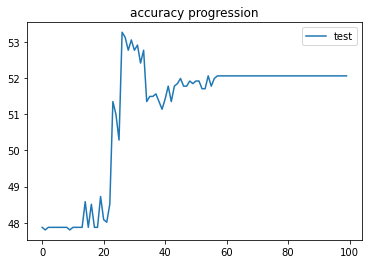

In [188]:
settings, save_dir = init()
import collections
from time import time
import random
from sklearn.metrics import f1_score, confusion_matrix
import pandas

torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
experiment_name = settings['experiment_name']
test ='federated'
n_epochs = 100 #settings['n_epochs']
patients_removed = [6, 14, 16]
patients_left = [x for x in range(1,24) if x not in patients_removed]
print(patients_left)
p2p = P2P_AFPL(patients_left,19, test)
accuracies_fed = p2p.loop(n_epochs, p2p, experiment_name)

[1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 15, 17, 18, 19, 20, 21, 22, 23]
0
losses before:  0
full train loss:  tensor(0.6906, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.7919, device='cuda:0', dtype=torch.float64)
client accuracy :  0
79.03225806451613
client accuracy :  1
77.77777777777779
client accuracy :  2
80.35714285714286
client accuracy :  3
60.37735849056604
client accuracy :  4
90.9090909090909
client accuracy :  5
79.54545454545455
client accuracy :  6
68.37606837606837
client accuracy :  7
89.1891891891892
client accuracy :  8
71.1864406779661
client accuracy :  9
97.16981132075472
client accuracy :  10
58.791208791208796
client accuracy :  11
75.71428571428571
client accuracy :  12
66.26984126984127
client accuracy :  13
78.04878048780488
client accuracy :  14
83.33333333333334
client accuracy :  15
88.57142857142857
client accuracy :  16
85.0
client accuracy :  17
55.55555555555556
client accuracy :  18
33.33333333333333
client accuracy :  19
88.67924528301

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
loss after my code:  0.25566550095414564
train loss after my code:  0.27663757078558704
val accuracy:  78.89125799573561
test accuracy:  76.52482269503547
2
losses before:  0
full train loss:  tensor(0.7385, device='cuda:0', dtype=torch.float64)
full loss:  tensor(1.1443, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  76.19047619047619
selected clients UCB:  [19 10  2  8 18  9 15  7 13 12]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
loss after my code:  0.30158617767605855
train loss after my code:  0.3818211887564561
val accuracy:  82.2316986496091
test accuracy:  80.42553191489363
3
losses before:  0
full train loss:  tensor(0.5439, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.8351, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  81.4498933901919
selected clients UCB:  [19  8 10 12  2 18  9 15  7 11]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
loss after my code:  0.2240554382902728
train loss after my code:  0.23526550718205677
val accuracy:  87.63326226012794
test accuracy:  85.60283687943262
4
losses before:  0
full train loss:  tensor(0.5008, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.6320, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  83.72423596304193
selected clients UCB:  [19 10  8 18  7 12  2  9 15 14]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1.]
loss after my code:  0.25158781613594583
train loss after my code:  0.1984328020679704
val accuracy:  88.55721393034825
test accuracy:  87.09219858156028
5
losses before:  0
full train loss:  tensor(0.5218, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.8498, device='cuda:0', dtype=torch.float64)
client accuracy :  0
85.48387096774194
client accuracy :  1
51.85185185185185
client accuracy :  2
91.07142857142857
client accuracy :  3
77.35849056603774
client accuracy :  4
76.62337662337663
client accuracy :  5
86.36363636363636
client accuracy :  6
72.64957264957265
client accuracy :  7
89.1891891891892
client accuracy :  8
100.0
client accuracy :  9
91.50943396226415
client accuracy :  10
80.76923076923077
client accuracy :  11
84.28571428571429
client accuracy :  12
70.23809523809523
client accuracy :  13
90.2439024390244
client accuracy :  14
59.523809523809526
client accuracy :  15
91.42857142857143
client accu

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
loss after my code:  0.17765498281198025
train loss after my code:  0.22103046820151132
client accuracy :  0
96.7741935483871
client accuracy :  1
96.29629629629629
client accuracy :  2
96.42857142857143
client accuracy :  3
81.13207547169812
client accuracy :  4
96.1038961038961
client accuracy :  5
88.63636363636364
client accuracy :  6
74.35897435897436
client accuracy :  7
97.2972972972973
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
80.76923076923077
client accuracy :  11
84.28571428571429
client accuracy :  12
83.33333333333334
client accuracy :  13
90.2439024390244
client accuracy :  14
88.09523809523809
client accuracy :  15
91.42857142857143
client accuracy :  16
80.0
client accuracy :  17
85.18518518518519
client accuracy :  18
92.5925925925926
client accuracy :  19
98.11320754716981
val accuracy:  87.91755508173419
client accuracy :  0
95.16129032258065
client accuracy : 

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.1966216107154098
train loss after my code:  0.19381607237001136
val accuracy:  91.11584932480456
test accuracy:  89.71631205673759
7
losses before:  0
full train loss:  tensor(0.2501, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4188, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  83.51101634683724
selected clients UCB:  [19 10 15 18  7  8 12  9  2 11]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
loss after my code:  0.24069700135658656
train loss after my code:  0.2044367864631785
val accuracy:  88.77043354655295
test accuracy:  88.79432624113474
8
losses before:  0
full train loss:  tensor(0.3567, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5203, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  86.4960909737029
selected clients UCB:  [19 10 15  8 18  7  2  9 12 13]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
loss after my code:  0.22161906137467222
train loss after my code:  0.2919895226732785
val accuracy:  90.26297085998578
test accuracy:  89.00709219858156
9
losses before:  0
full train loss:  tensor(0.8041, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.9996, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  82.51599147121536
selected clients UCB:  [19 10 15 18  8  7  2  4 17 16]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.3195483681112414
train loss after my code:  0.21100993846006166
val accuracy:  89.05472636815921
test accuracy:  89.29078014184397
10
losses before:  0
full train loss:  tensor(0.1226, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3546, device='cuda:0', dtype=torch.float64)
client accuracy :  0
95.16129032258065
client accuracy :  1
88.88888888888889
client accuracy :  2
91.07142857142857
client accuracy :  3
77.35849056603774
client accuracy :  4
100.0
client accuracy :  5
86.36363636363636
client accuracy :  6
88.03418803418803
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
97.16981132075472
client accuracy :  10
73.07692307692307
client accuracy :  11
88.57142857142857
client accuracy :  12
90.47619047619048
client accuracy :  13
87.8048780487805
client accuracy :  14
71.42857142857143
client accuracy :  15
91.42857142857143
client accuracy :  16
75.0
client 

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
loss after my code:  0.17756069715729567
train loss after my code:  0.14541446445143075
client accuracy :  0
96.7741935483871
client accuracy :  1
96.29629629629629
client accuracy :  2
94.64285714285714
client accuracy :  3
83.01886792452831
client accuracy :  4
100.0
client accuracy :  5
86.36363636363636
client accuracy :  6
88.03418803418803
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
98.11320754716981
client accuracy :  10
73.07692307692307
client accuracy :  11
92.85714285714286
client accuracy :  12
90.47619047619048
client accuracy :  13
92.6829268292683
client accuracy :  14
97.61904761904762
client accuracy :  15
91.42857142857143
client accuracy :  16
77.5
client accuracy :  17
81.48148148148148
client accuracy :  18
92.5925925925926
client accuracy :  19
98.11320754716981
val accuracy:  90.12082444918266
client accuracy :  0
91.93548387096774
client accuracy :  1
96.29629629629629
c

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.24577230044491696
train loss after my code:  0.1860552570356889
val accuracy:  91.82658137882018
test accuracy:  91.56028368794327
12
losses before:  0
full train loss:  tensor(0.2195, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4228, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  87.20682302771856
selected clients UCB:  [19 10  7 14 15 18  8 12  2 17]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
loss after my code:  0.18067654355556728
train loss after my code:  0.1805643863419558
val accuracy:  91.54228855721394
test accuracy:  90.99290780141844
13
losses before:  0
full train loss:  tensor(0.1777, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3490, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  89.62331201137171
selected clients UCB:  [19 10 17  7 15 18 14  8  4  5]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
loss after my code:  0.21438068547328396
train loss after my code:  0.1628726037850231
val accuracy:  92.03980099502488
test accuracy:  91.41843971631207
14
losses before:  0
full train loss:  tensor(0.0680, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2585, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  89.97867803837953
selected clients UCB:  [19 10 14  5  7 17 15 18  3 16]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.]
loss after my code:  0.15828044550642542
train loss after my code:  0.1523952868753656
val accuracy:  91.4001421464108
test accuracy:  90.92198581560284
15
losses before:  0
full train loss:  tensor(0.1849, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4006, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
59.25925925925925
client accuracy :  2
92.85714285714286
client accuracy :  3
73.58490566037736
client accuracy :  4
98.7012987012987
client accuracy :  5
81.81818181818183
client accuracy :  6
89.74358974358975
client accuracy :  7
100.0
client accuracy :  8
94.91525423728814
client accuracy :  9
99.05660377358491
client accuracy :  10
82.96703296703298
client accuracy :  11
94.28571428571428
client accuracy :  12
84.52380952380952
client accuracy :  13
90.2439024390244
client accuracy :  14
92.85714285714286
client accuracy :  15
68.57142857142857
client accur

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.18863086420525374
train loss after my code:  0.12217946968347555
client accuracy :  0
98.38709677419355
client accuracy :  1
96.29629629629629
client accuracy :  2
96.42857142857143
client accuracy :  3
83.01886792452831
client accuracy :  4
98.7012987012987
client accuracy :  5
88.63636363636364
client accuracy :  6
89.74358974358975
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
82.96703296703298
client accuracy :  11
94.28571428571428
client accuracy :  12
84.52380952380952
client accuracy :  13
90.2439024390244
client accuracy :  14
95.23809523809523
client accuracy :  15
94.28571428571428
client accuracy :  16
82.5
client accuracy :  17
85.18518518518519
client accuracy :  18
100.0
client accuracy :  19
96.22641509433963
val accuracy:  90.97370291400142
client accuracy :  0
98.38709677419355
client accuracy :  1
100.0
client accur

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
loss after my code:  0.17630657997186489
train loss after my code:  0.1312494042018857
val accuracy:  91.25799573560768
test accuracy:  91.91489361702128
17
losses before:  0
full train loss:  tensor(0.1091, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2934, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  88.27292110874201
selected clients UCB:  [19 17 14 10  7 16  6 11  2  8]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.164273297783675
train loss after my code:  0.1488803809900588
val accuracy:  90.76048329779674
test accuracy:  91.98581560283688
18
losses before:  0
full train loss:  tensor(0.1403, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4209, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  85.99857853589197
selected clients UCB:  [19 17 14 10  7 12  5  9 16 18]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.18639593203129093
train loss after my code:  0.17230929752825813
val accuracy:  89.62331201137171
test accuracy:  90.1418439716312
19
losses before:  0
full train loss:  tensor(0.0900, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2675, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  89.05472636815921
selected clients UCB:  [19 17 10 14  7 15  8 18  2  4]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
loss after my code:  0.11763320557579456
train loss after my code:  0.10943324212151376
val accuracy:  91.32906894100924
test accuracy:  91.70212765957447
20
losses before:  0
full train loss:  tensor(0.1352, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3544, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
87.5
client accuracy :  3
69.81132075471697
client accuracy :  4
100.0
client accuracy :  5
79.54545454545455
client accuracy :  6
93.16239316239316
client accuracy :  7
70.27027027027027
client accuracy :  8
100.0
client accuracy :  9
98.11320754716981
client accuracy :  10
81.31868131868131
client accuracy :  11
77.14285714285715
client accuracy :  12
79.36507936507937
client accuracy :  13
92.6829268292683
client accuracy :  14
100.0
client accuracy :  15
88.57142857142857
client accuracy :  16
87.5
client accuracy :  1

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.1374964882899961
train loss after my code:  0.10346191679641353
client accuracy :  0
98.38709677419355
client accuracy :  1
96.29629629629629
client accuracy :  2
94.64285714285714
client accuracy :  3
81.13207547169812
client accuracy :  4
100.0
client accuracy :  5
81.81818181818183
client accuracy :  6
93.16239316239316
client accuracy :  7
97.2972972972973
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
81.31868131868131
client accuracy :  11
82.85714285714286
client accuracy :  12
87.3015873015873
client accuracy :  13
92.6829268292683
client accuracy :  14
100.0
client accuracy :  15
94.28571428571428
client accuracy :  16
87.5
client accuracy :  17
92.5925925925926
client accuracy :  18
100.0
client accuracy :  19
92.45283018867924
val accuracy:  90.97370291400142
client accuracy :  0
96.7741935483871
client accuracy :  1
100.0
client accuracy :  2
96.4285

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
loss after my code:  0.18547539934921445
train loss after my code:  0.09474929064803049
val accuracy:  91.68443496801706
test accuracy:  91.98581560283688
22
losses before:  0
full train loss:  tensor(0.1756, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4712, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  85.71428571428571
selected clients UCB:  [19 14  5  7 10 17  2 16 12 15]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.2178892548418135
train loss after my code:  0.16755205853108468
val accuracy:  89.69438521677327
test accuracy:  91.34751773049645
23
losses before:  0
full train loss:  tensor(0.1842, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3480, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  87.06467661691542
selected clients UCB:  [19 14  7  5 10 17 18  2  8 15]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.13933856256323635
train loss after my code:  0.16687462513797996
val accuracy:  89.33901918976545
test accuracy:  90.56737588652483
24
losses before:  0
full train loss:  tensor(0.1055, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3658, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  88.55721393034825
selected clients UCB:  [19  7 14  5 10 17 18  2  8  9]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
loss after my code:  0.13075517582621665
train loss after my code:  0.14825621298638308
val accuracy:  90.8315565031983
test accuracy:  90.92198581560284
25
losses before:  0
full train loss:  tensor(0.1338, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3345, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
94.64285714285714
client accuracy :  3
83.01886792452831
client accuracy :  4
98.7012987012987
client accuracy :  5
81.81818181818183
client accuracy :  6
90.5982905982906
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
97.16981132075472
client accuracy :  10
86.26373626373626
client accuracy :  11
94.28571428571428
client accuracy :  12
82.53968253968253
client accuracy :  13
78.04878048780488
client accuracy :  14
88.09523809523809
client accuracy :  15
91.42857142857143
client accuracy :  16
62

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.140725660680888
train loss after my code:  0.13625029260230756
client accuracy :  0
98.38709677419355
client accuracy :  1
96.29629629629629
client accuracy :  2
96.42857142857143
client accuracy :  3
86.79245283018868
client accuracy :  4
98.7012987012987
client accuracy :  5
81.81818181818183
client accuracy :  6
90.5982905982906
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
86.26373626373626
client accuracy :  11
94.28571428571428
client accuracy :  12
84.92063492063492
client accuracy :  13
92.6829268292683
client accuracy :  14
97.61904761904762
client accuracy :  15
91.42857142857143
client accuracy :  16
80.0
client accuracy :  17
77.77777777777779
client accuracy :  18
100.0
client accuracy :  19
98.11320754716981
val accuracy:  91.4001421464108
client accuracy :  0
95.16129032258065
client accuracy :  1
100.0
client accuracy 

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.19842682149529595
train loss after my code:  0.11489070841246765
val accuracy:  92.03980099502488
test accuracy:  91.70212765957447
27
losses before:  0
full train loss:  tensor(0.1341, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3988, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  89.55223880597015
selected clients UCB:  [19 17  7  9 14 10  6  4 15 18]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
loss after my code:  0.09595689339026092
train loss after my code:  0.10083817637120673
val accuracy:  92.25302061122956
test accuracy:  91.63120567375887
28
losses before:  0
full train loss:  tensor(0.1481, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4433, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  89.33901918976545
selected clients UCB:  [19 15  7 17  9 14 10  8  2 18]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
loss after my code:  0.11229814788564124
train loss after my code:  0.08815326072861829
val accuracy:  91.75550817341862
test accuracy:  93.40425531914893
29
losses before:  0
full train loss:  tensor(0.0875, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3144, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  90.76048329779674
selected clients UCB:  [19  2 15  7 17 14 16 12  5  9]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.15792027768418482
train loss after my code:  0.12416988288627685
val accuracy:  92.96375266524521
test accuracy:  92.97872340425532
30
losses before:  0
full train loss:  tensor(0.1069, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3558, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
85.18518518518519
client accuracy :  2
96.42857142857143
client accuracy :  3
77.35849056603774
client accuracy :  4
100.0
client accuracy :  5
90.9090909090909
client accuracy :  6
90.5982905982906
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
97.16981132075472
client accuracy :  10
84.06593406593407
client accuracy :  11
78.57142857142857
client accuracy :  12
90.07936507936508
client accuracy :  13
87.8048780487805
client accuracy :  14
95.23809523809523
client accuracy :  15
91.42857142857143
client accuracy :  16
85.0
client a

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.10955559111630903
train loss after my code:  0.09705122769641863
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
98.21428571428571
client accuracy :  3
84.90566037735849
client accuracy :  4
100.0
client accuracy :  5
90.9090909090909
client accuracy :  6
90.5982905982906
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
98.11320754716981
client accuracy :  10
84.06593406593407
client accuracy :  11
82.85714285714286
client accuracy :  12
90.07936507936508
client accuracy :  13
92.6829268292683
client accuracy :  14
100.0
client accuracy :  15
94.28571428571428
client accuracy :  16
85.0
client accuracy :  17
81.48148148148148
client accuracy :  18
100.0
client accuracy :  19
98.11320754716981
val accuracy:  92.03980099502488
client accuracy :  0
100.0
client accuracy :  1
100.0
client accuracy :  2
98.21428571428571
client accu

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
loss after my code:  0.15525663433456371
train loss after my code:  0.09984553711183859
val accuracy:  93.10589907604833
test accuracy:  92.05673758865248
32
losses before:  0
full train loss:  tensor(0.1229, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4130, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  89.62331201137171
selected clients UCB:  [19 11  1  2 15  7  6  5  9 12]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.12731707756769992
train loss after my code:  0.12728849722943192
val accuracy:  91.75550817341862
test accuracy:  92.2695035460993
33
losses before:  0
full train loss:  tensor(0.1445, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4312, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  90.68941009239516
selected clients UCB:  [19  1 11  2  5 15  7 16  8 10]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.15291518169633297
train loss after my code:  0.12093885342231374
val accuracy:  92.181947405828
test accuracy:  91.98581560283688
34
losses before:  0
full train loss:  tensor(0.0587, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3432, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.03980099502488
selected clients UCB:  [19  1 11  2  5 17 14 18  7 15]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.15111911773455025
train loss after my code:  0.10865203251792856
val accuracy:  93.17697228144989
test accuracy:  93.61702127659575
35
losses before:  0
full train loss:  tensor(0.0942, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3349, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
92.85714285714286
client accuracy :  3
81.13207547169812
client accuracy :  4
98.7012987012987
client accuracy :  5
84.0909090909091
client accuracy :  6
90.5982905982906
client accuracy :  7
94.5945945945946
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
82.96703296703298
client accuracy :  11
92.85714285714286
client accuracy :  12
94.44444444444444
client accuracy :  13
90.2439024390244
client accuracy :  14
90.47619047619048
client accuracy :  15
94.28571428571428
client accurac

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.15893991241874092
train loss after my code:  0.11132578209843284
client accuracy :  0
100.0
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
86.79245283018868
client accuracy :  4
100.0
client accuracy :  5
86.36363636363636
client accuracy :  6
90.5982905982906
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
82.96703296703298
client accuracy :  11
92.85714285714286
client accuracy :  12
94.44444444444444
client accuracy :  13
92.6829268292683
client accuracy :  14
100.0
client accuracy :  15
94.28571428571428
client accuracy :  16
85.0
client accuracy :  17
85.18518518518519
client accuracy :  18
100.0
client accuracy :  19
98.11320754716981
val accuracy:  93.24804548685147
client accuracy :  0
98.38709677419355
client accuracy :  1
100.0
client accuracy :  2
98.21428571428571
client acc

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
loss after my code:  0.11295513455847425
train loss after my code:  0.08104058816030761
val accuracy:  93.24804548685147
test accuracy:  92.19858156028369
37
losses before:  0
full train loss:  tensor(0.1767, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5247, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  90.54726368159204
selected clients UCB:  [19  2  1  9 17  5  4  3 15 12]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.24191818619175834
train loss after my code:  0.14062817673037112
val accuracy:  92.75053304904051
test accuracy:  92.62411347517731
38
losses before:  0
full train loss:  tensor(0.0550, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3476, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  91.89765458422174
selected clients UCB:  [19  2  1 17  9 11 16 10  7  8]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.11153912949588614
train loss after my code:  0.07393464768171562
val accuracy:  92.32409381663112
test accuracy:  92.12765957446808
39
losses before:  0
full train loss:  tensor(0.0441, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3629, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  91.96872778962332
selected clients UCB:  [19  2  1 17  9  5 14 18 15 10]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
loss after my code:  0.13525561789633142
train loss after my code:  0.08652514751120476
val accuracy:  92.53731343283582
test accuracy:  92.2695035460993
40
losses before:  0
full train loss:  tensor(0.0492, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3762, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
79.24528301886792
client accuracy :  4
100.0
client accuracy :  5
84.0909090909091
client accuracy :  6
91.45299145299145
client accuracy :  7
94.5945945945946
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
84.06593406593407
client accuracy :  11
91.42857142857143
client accuracy :  12
87.6984126984127
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
94.28571428571428
client accuracy :  16
82.5

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.2516119930691079
train loss after my code:  0.141545330434314
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
86.79245283018868
client accuracy :  4
100.0
client accuracy :  5
86.36363636363636
client accuracy :  6
91.45299145299145
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
84.06593406593407
client accuracy :  11
91.42857142857143
client accuracy :  12
87.6984126984127
client accuracy :  13
92.6829268292683
client accuracy :  14
100.0
client accuracy :  15
94.28571428571428
client accuracy :  16
85.0
client accuracy :  17
88.88888888888889
client accuracy :  18
100.0
client accuracy :  19
98.11320754716981
val accuracy:  92.181947405828
client accuracy :  0
98.38709677419355
client accuracy :  1
100.0
client accuracy :  2
100.0
client accuracy

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
loss after my code:  0.18023849100713343
train loss after my code:  0.10075635695638313
val accuracy:  92.96375266524521
test accuracy:  92.8368794326241
42
losses before:  0
full train loss:  tensor(0.0594, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4510, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.46624022743426
selected clients UCB:  [19  2  9 15 18  1 17 10  3 13]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.]
loss after my code:  0.016262393774103448
train loss after my code:  0.05903791903005073
val accuracy:  93.31911869225303
test accuracy:  93.19148936170212
43
losses before:  0
full train loss:  tensor(0.1090, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5034, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.03980099502488
selected clients UCB:  [19  2 13 15 17  9 18  6  4  7]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
loss after my code:  0.08919121354039732
train loss after my code:  0.09862578303454661
val accuracy:  93.10589907604833
test accuracy:  92.8368794326241
44
losses before:  0
full train loss:  tensor(0.0467, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3793, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  91.82658137882018
selected clients UCB:  [19  2 15 13 18  7 17  9  1 10]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.08326797889467101
train loss after my code:  0.08051628185168853
val accuracy:  92.53731343283582
test accuracy:  92.48226950354609
45
losses before:  0
full train loss:  tensor(0.0518, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3728, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
92.85714285714286
client accuracy :  3
88.67924528301887
client accuracy :  4
100.0
client accuracy :  5
93.18181818181817
client accuracy :  6
92.3076923076923
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
85.71428571428571
client accuracy :  11
87.14285714285714
client accuracy :  12
92.06349206349206
client accuracy :  13
87.8048780487805
client accuracy :  14
95.23809523809523
client accuracy :  15
94.28571428571428
client accuracy :  16
87.5
client a

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
loss after my code:  0.0917375119295485
train loss after my code:  0.1358207743100084
client accuracy :  0
100.0
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
88.67924528301887
client accuracy :  4
100.0
client accuracy :  5
93.18181818181817
client accuracy :  6
92.3076923076923
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
85.71428571428571
client accuracy :  11
87.14285714285714
client accuracy :  12
92.06349206349206
client accuracy :  13
90.2439024390244
client accuracy :  14
100.0
client accuracy :  15
94.28571428571428
client accuracy :  16
87.5
client accuracy :  17
81.48148148148148
client accuracy :  18
100.0
client accuracy :  19
98.11320754716981
val accuracy:  93.24804548685147
client accuracy :  0
96.7741935483871
client accuracy :  1
100.0
client accuracy :  2
98.21428571428571
client accura

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
loss after my code:  0.08566738170494975
train loss after my code:  0.12224233515348894
val accuracy:  93.31911869225303
test accuracy:  92.8368794326241
47
losses before:  0
full train loss:  tensor(0.0458, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3570, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.82160625444207
selected clients UCB:  [19 15  2 18 13  7 17 16 12  1]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.16624160168495933
train loss after my code:  0.0967295713872128
val accuracy:  93.46126510305615
test accuracy:  93.12056737588652
48
losses before:  0
full train loss:  tensor(0.1020, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4491, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.32409381663112
selected clients UCB:  [19  2 15 18  7 13 10 17  9 14]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
loss after my code:  0.2163623446201184
train loss after my code:  0.1387631605198295
val accuracy:  93.03482587064677
test accuracy:  93.04964539007092
49
losses before:  0
full train loss:  tensor(0.0870, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4623, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.60838663823738
selected clients UCB:  [19 15  2 17 18  7  3  6  4  8]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.09155527235904541
train loss after my code:  0.09171354420440563
val accuracy:  93.17697228144989
test accuracy:  93.19148936170212
50
losses before:  0
full train loss:  tensor(0.0737, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4589, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
88.88888888888889
client accuracy :  2
96.42857142857143
client accuracy :  3
81.13207547169812
client accuracy :  4
100.0
client accuracy :  5
84.0909090909091
client accuracy :  6
93.16239316239316
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
85.16483516483517
client accuracy :  11
90.0
client accuracy :  12
92.85714285714286
client accuracy :  13
87.8048780487805
client accuracy :  14
95.23809523809523
client accuracy :  15
88.57142857142857
client accuracy :  16
80.0
client accuracy :  1

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.14293222688385662
train loss after my code:  0.10614221019948408
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
84.90566037735849
client accuracy :  4
100.0
client accuracy :  5
84.0909090909091
client accuracy :  6
93.16239316239316
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
85.16483516483517
client accuracy :  11
90.0
client accuracy :  12
92.85714285714286
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
91.42857142857143
client accuracy :  16
80.0
client accuracy :  17
85.18518518518519
client accuracy :  18
100.0
client accuracy :  19
98.11320754716981
val accuracy:  92.75053304904051
client accuracy :  0
100.0
client accuracy :  1
100.0
client accuracy :  2
100.0
client accuracy :  3
88

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.18171210862771242
train loss after my code:  0.08996153135940717
val accuracy:  93.60341151385929
test accuracy:  93.04964539007092
52
losses before:  0
full train loss:  tensor(0.0914, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4672, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.75053304904051
selected clients UCB:  [19 15  2 17  7 10 18  5  8  9]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.09149495066746029
train loss after my code:  0.11703567317929502
val accuracy:  93.03482587064677
test accuracy:  92.41134751773049
53
losses before:  0
full train loss:  tensor(0.0713, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4495, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.60838663823738
selected clients UCB:  [19 15  2 17  7 14  6  4  3 18]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.12039844157582055
train loss after my code:  0.14182340127841198
val accuracy:  93.17697228144989
test accuracy:  92.90780141843972
54
losses before:  0
full train loss:  tensor(0.0834, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4310, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.82160625444207
selected clients UCB:  [19 15  2 17 10  1 16 13 12 11]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.12138002506688217
train loss after my code:  0.12192873487438186
val accuracy:  93.39019189765459
test accuracy:  93.04964539007092
55
losses before:  0
full train loss:  tensor(0.0809, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4093, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
81.13207547169812
client accuracy :  4
100.0
client accuracy :  5
93.18181818181817
client accuracy :  6
92.3076923076923
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
98.11320754716981
client accuracy :  10
85.16483516483517
client accuracy :  11
92.85714285714286
client accuracy :  12
92.06349206349206
client accuracy :  13
90.2439024390244
client accuracy :  14
95.23809523809523
client accuracy :  15
88.57142857142857
client accuracy :  16
82.5
client a

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.19125506378670845
train loss after my code:  0.1305257785654784
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
84.90566037735849
client accuracy :  4
100.0
client accuracy :  5
93.18181818181817
client accuracy :  6
92.3076923076923
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
85.16483516483517
client accuracy :  11
92.85714285714286
client accuracy :  12
92.06349206349206
client accuracy :  13
92.6829268292683
client accuracy :  14
97.61904761904762
client accuracy :  15
88.57142857142857
client accuracy :  16
82.5
client accuracy :  17
81.48148148148148
client accuracy :  18
100.0
client accuracy :  19
98.11320754716981
val accuracy:  92.96375266524521
client accuracy :  0
98.38709677419355
client accuracy :  1
100.0
client accuracy :  2
98.21

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.09637734602951861
train loss after my code:  0.10931900546831498
val accuracy:  93.53233830845771
test accuracy:  92.8368794326241
57
losses before:  0
full train loss:  tensor(0.0741, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4234, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.75053304904051
selected clients UCB:  [19 15  2 17 18  3  4  6  9 14]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.09606406522639879
train loss after my code:  0.10543972222604306
val accuracy:  93.10589907604833
test accuracy:  93.19148936170212
58
losses before:  0
full train loss:  tensor(0.0703, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3953, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.17697228144989
selected clients UCB:  [19 15  2 16 13 12 11  7 17 10]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.13217582947742157
train loss after my code:  0.094028930173624
val accuracy:  93.46126510305615
test accuracy:  93.47517730496455
59
losses before:  0
full train loss:  tensor(0.0724, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4361, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.03482587064677
selected clients UCB:  [19 15  2 18  7  5  8  1  9 14]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.03638402309995164
train loss after my code:  0.10265061058318824
val accuracy:  93.39019189765459
test accuracy:  93.26241134751773
60
losses before:  0
full train loss:  tensor(0.0890, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4295, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
98.21428571428571
client accuracy :  3
81.13207547169812
client accuracy :  4
100.0
client accuracy :  5
93.18181818181817
client accuracy :  6
92.3076923076923
client accuracy :  7
97.2972972972973
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
85.16483516483517
client accuracy :  11
92.85714285714286
client accuracy :  12
93.65079365079364
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
91.42857142857143
client accuracy :  16
87

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.07100148958733661
train loss after my code:  0.08942849224781443
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
98.21428571428571
client accuracy :  3
84.90566037735849
client accuracy :  4
100.0
client accuracy :  5
93.18181818181817
client accuracy :  6
92.3076923076923
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
85.16483516483517
client accuracy :  11
92.85714285714286
client accuracy :  12
93.65079365079364
client accuracy :  13
90.2439024390244
client accuracy :  14
100.0
client accuracy :  15
91.42857142857143
client accuracy :  16
87.5
client accuracy :  17
81.48148148148148
client accuracy :  18
100.0
client accuracy :  19
98.11320754716981
val accuracy:  93.53233830845771
client accuracy :  0
98.38709677419355
client accuracy :  1
100.0
client accuracy :  2
98.2142857142857

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.18606294228773498
train loss after my code:  0.09907685011891339
val accuracy:  93.31911869225303
test accuracy:  93.40425531914893
62
losses before:  0
full train loss:  tensor(0.0974, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4676, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.89267945984363
selected clients UCB:  [19 15  2 14  9  1  7 10 18 17]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.023002517707666717
train loss after my code:  0.11595070180700938
val accuracy:  93.24804548685147
test accuracy:  93.61702127659575
63
losses before:  0
full train loss:  tensor(0.0892, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4428, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.89267945984363
selected clients UCB:  [19 15  2  7 14  9 13 12 11 16]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.11801836137712471
train loss after my code:  0.1181987268859866
val accuracy:  93.24804548685147
test accuracy:  93.97163120567376
64
losses before:  0
full train loss:  tensor(0.1013, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4444, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.10589907604833
selected clients UCB:  [19 15  2  5  8 10 18 17  1  7]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.1270127998208771
train loss after my code:  0.1384151811953245
val accuracy:  93.39019189765459
test accuracy:  93.90070921985816
65
losses before:  0
full train loss:  tensor(0.0969, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4552, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
98.21428571428571
client accuracy :  3
83.01886792452831
client accuracy :  4
100.0
client accuracy :  5
88.63636363636364
client accuracy :  6
94.01709401709401
client accuracy :  7
97.2972972972973
client accuracy :  8
100.0
client accuracy :  9
98.11320754716981
client accuracy :  10
85.16483516483517
client accuracy :  11
91.42857142857143
client accuracy :  12
94.04761904761905
client accuracy :  13
90.2439024390244
client accuracy :  14
95.23809523809523
client accuracy :  15
91.42857142857143
client accuracy :  16
90.

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.09160388600134496
train loss after my code:  0.13815480842931677
client accuracy :  0
98.38709677419355
client accuracy :  1
96.29629629629629
client accuracy :  2
98.21428571428571
client accuracy :  3
83.01886792452831
client accuracy :  4
100.0
client accuracy :  5
88.63636363636364
client accuracy :  6
94.01709401709401
client accuracy :  7
97.2972972972973
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
85.16483516483517
client accuracy :  11
91.42857142857143
client accuracy :  12
94.04761904761905
client accuracy :  13
92.6829268292683
client accuracy :  14
97.61904761904762
client accuracy :  15
94.28571428571428
client accuracy :  16
90.0
client accuracy :  17
81.48148148148148
client accuracy :  18
100.0
client accuracy :  19
98.11320754716981
val accuracy:  93.60341151385929
client accuracy :  0
100.0
client accuracy :  1
100.0
client accuracy :  2
100

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.019744470135138366
train loss after my code:  0.13109012442315443
val accuracy:  93.53233830845771
test accuracy:  93.82978723404256
67
losses before:  0
full train loss:  tensor(0.1016, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4330, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.31911869225303
selected clients UCB:  [19 15  2 11  1 18 10 17  9 14]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.16524304971198567
train loss after my code:  0.29699269709384435
val accuracy:  93.67448471926085
test accuracy:  93.19148936170212
68
losses before:  0
full train loss:  tensor(0.1848, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4348, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.46126510305615
selected clients UCB:  [19 15  2  7  5  8  3  4  6 10]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.23218736764979364
train loss after my code:  0.1808104114088121
val accuracy:  93.81663113006397
test accuracy:  93.47517730496455
69
losses before:  0
full train loss:  tensor(0.1439, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4821, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.46126510305615
selected clients UCB:  [19 15  2 18 17  7  9 14 12 11]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.11293330636899203
train loss after my code:  0.15709947420923834
val accuracy:  93.60341151385929
test accuracy:  93.47517730496455
70
losses before:  0
full train loss:  tensor(0.1547, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4536, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
98.21428571428571
client accuracy :  3
81.13207547169812
client accuracy :  4
100.0
client accuracy :  5
90.9090909090909
client accuracy :  6
94.01709401709401
client accuracy :  7
97.2972972972973
client accuracy :  8
100.0
client accuracy :  9
98.11320754716981
client accuracy :  10
85.16483516483517
client accuracy :  11
91.42857142857143
client accuracy :  12
93.25396825396825
client accuracy :  13
92.6829268292683
client accuracy :  14
97.61904761904762
client accuracy :  15
94.28571428571428
client accuracy :  16
90

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.09326081437806365
train loss after my code:  0.16977101229105296
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
98.21428571428571
client accuracy :  3
83.01886792452831
client accuracy :  4
100.0
client accuracy :  5
90.9090909090909
client accuracy :  6
94.01709401709401
client accuracy :  7
97.2972972972973
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
85.16483516483517
client accuracy :  11
91.42857142857143
client accuracy :  12
93.25396825396825
client accuracy :  13
92.6829268292683
client accuracy :  14
100.0
client accuracy :  15
94.28571428571428
client accuracy :  16
90.0
client accuracy :  17
81.48148148148148
client accuracy :  18
100.0
client accuracy :  19
98.11320754716981
val accuracy:  93.53233830845771
client accuracy :  0
98.38709677419355
client accuracy :  1
96.29629629629629
client accurac

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.22187624910698206
train loss after my code:  0.19503701914548868
val accuracy:  93.7455579246624
test accuracy:  93.54609929078013
72
losses before:  0
full train loss:  tensor(0.1620, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5114, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.46126510305615
selected clients UCB:  [19 15  2  3  1 17 10 18 16 13]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.09882861155976479
train loss after my code:  0.1604352504903932
val accuracy:  93.67448471926085
test accuracy:  93.26241134751773
73
losses before:  0
full train loss:  tensor(0.1195, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4759, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.10589907604833
selected clients UCB:  [19 15  2 12 11  5  8  9 14  7]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.12400805327447807
train loss after my code:  0.1303379910162851
val accuracy:  93.24804548685147
test accuracy:  93.40425531914893
74
losses before:  0
full train loss:  tensor(0.1120, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4770, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.53233830845771
selected clients UCB:  [19 15  2 17 10 18  1  5  8  7]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.010965986498663698
train loss after my code:  0.13558083172252638
val accuracy:  93.7455579246624
test accuracy:  93.75886524822695
75
losses before:  0
full train loss:  tensor(0.1018, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4866, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
81.13207547169812
client accuracy :  4
100.0
client accuracy :  5
88.63636363636364
client accuracy :  6
93.16239316239316
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
85.16483516483517
client accuracy :  11
92.85714285714286
client accuracy :  12
93.65079365079364
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
94.28571428571428
client accuracy :  16
90.0
client 

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.08932073788280415
train loss after my code:  0.11107157925833555
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
83.01886792452831
client accuracy :  4
100.0
client accuracy :  5
88.63636363636364
client accuracy :  6
93.16239316239316
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
85.16483516483517
client accuracy :  11
92.85714285714286
client accuracy :  12
93.65079365079364
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
94.28571428571428
client accuracy :  16
90.0
client accuracy :  17
81.48148148148148
client accuracy :  18
100.0
client accuracy :  19
96.22641509433963
val accuracy:  93.31911869225303
client accuracy :  0
98.38709677419355
client accuracy :  1
96.29629629629629
client accur

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.09755046085278558
train loss after my code:  0.10533920660758019
val accuracy:  93.10589907604833
test accuracy:  93.61702127659575
77
losses before:  0
full train loss:  tensor(0.1165, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4880, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.31911869225303
selected clients UCB:  [19 15  2  5  8  1 10 18  9 14]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.15300031054544347
train loss after my code:  0.12982553111788853
val accuracy:  93.60341151385929
test accuracy:  93.61702127659575
78
losses before:  0
full train loss:  tensor(0.1488, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4881, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.89267945984363
selected clients UCB:  [19 15  2  7 16 13 12 11 17 10]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.04215612545697179
train loss after my code:  0.16103538521620897
val accuracy:  93.03482587064677
test accuracy:  93.47517730496455
79
losses before:  0
full train loss:  tensor(0.1606, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4841, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.96375266524521
selected clients UCB:  [19 15  2  3  4  6 18  5  8  7]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.15218246922047743
train loss after my code:  0.17356763610141707
val accuracy:  93.17697228144989
test accuracy:  93.40425531914893
80
losses before:  0
full train loss:  tensor(0.1501, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5225, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
81.13207547169812
client accuracy :  4
100.0
client accuracy :  5
88.63636363636364
client accuracy :  6
92.3076923076923
client accuracy :  7
97.2972972972973
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
85.16483516483517
client accuracy :  11
92.85714285714286
client accuracy :  12
93.25396825396825
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
91.42857142857143
client accuracy :  16
90

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.03691419639294977
train loss after my code:  0.15480055863867156
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
98.21428571428571
client accuracy :  3
81.13207547169812
client accuracy :  4
100.0
client accuracy :  5
88.63636363636364
client accuracy :  6
92.3076923076923
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
85.16483516483517
client accuracy :  11
92.85714285714286
client accuracy :  12
93.25396825396825
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
94.28571428571428
client accuracy :  16
90.0
client accuracy :  17
81.48148148148148
client accuracy :  18
100.0
client accuracy :  19
98.11320754716981
val accuracy:  93.24804548685147
client accuracy :  0
98.38709677419355
client accuracy :  1
100.0
client accuracy :  2
98.2

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.23533813571433515
train loss after my code:  0.24462977219384485
val accuracy:  93.24804548685147
test accuracy:  92.90780141843972
82
losses before:  0
full train loss:  tensor(0.1790, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5238, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.03482587064677
selected clients UCB:  [19 15  2 14  9  1  7 10 18  6]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.10671349145615046
train loss after my code:  0.1798650383238058
val accuracy:  93.17697228144989
test accuracy:  92.90780141843972
83
losses before:  0
full train loss:  tensor(0.1688, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5226, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.96375266524521
selected clients UCB:  [19 15  2  4  3 17  9 14  8  5]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.10161083197274484
train loss after my code:  0.18238699954693813
val accuracy:  93.10589907604833
test accuracy:  93.12056737588652
84
losses before:  0
full train loss:  tensor(0.1520, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5078, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.89267945984363
selected clients UCB:  [19 15  2  7 16 13 12 11 10 18]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
loss after my code:  0.10056646229336902
train loss after my code:  0.18345458846887033
val accuracy:  93.10589907604833
test accuracy:  93.04964539007092
85
losses before:  0
full train loss:  tensor(0.1468, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4906, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
79.24528301886792
client accuracy :  4
100.0
client accuracy :  5
88.63636363636364
client accuracy :  6
94.01709401709401
client accuracy :  7
94.5945945945946
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
84.61538461538461
client accuracy :  11
91.42857142857143
client accuracy :  12
92.85714285714286
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
91.42857142857143
client accuracy :  16
9

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.11042249957202949
train loss after my code:  0.17213713197313799
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
81.13207547169812
client accuracy :  4
100.0
client accuracy :  5
88.63636363636364
client accuracy :  6
94.01709401709401
client accuracy :  7
94.5945945945946
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
84.61538461538461
client accuracy :  11
91.42857142857143
client accuracy :  12
92.85714285714286
client accuracy :  13
90.2439024390244
client accuracy :  14
100.0
client accuracy :  15
91.42857142857143
client accuracy :  16
90.0
client accuracy :  17
81.48148148148148
client accuracy :  18
100.0
client accuracy :  19
98.11320754716981
val accuracy:  92.96375266524521
client accuracy :  0
100.0
client accuracy :  1
100.0
client accuracy :  2
98.2142857142857

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.1593918846338293
train loss after my code:  0.16770845428128522
val accuracy:  92.96375266524521
test accuracy:  93.47517730496455
87
losses before:  0
full train loss:  tensor(0.1575, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5138, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.89267945984363
selected clients UCB:  [19 15 18  2  7 16 13 12 11  1]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.0015231744896767045
train loss after my code:  0.16443535781766874
val accuracy:  92.96375266524521
test accuracy:  93.40425531914893
88
losses before:  0
full train loss:  tensor(0.1652, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5085, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.89267945984363
selected clients UCB:  [19 15  2 18 10  9 14 17  8  5]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.0
train loss after my code:  0.16523664755711864
val accuracy:  92.89267945984363
test accuracy:  93.47517730496455
89
losses before:  0
full train loss:  tensor(0.1351, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5088, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.89267945984363
selected clients UCB:  [19 15  2 18  7  3  4  6 10 17]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.043149531851657597
train loss after my code:  0.13644618268466138
val accuracy:  92.96375266524521
test accuracy:  93.47517730496455
90
losses before:  0
full train loss:  tensor(0.1302, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5100, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
81.13207547169812
client accuracy :  4
100.0
client accuracy :  5
88.63636363636364
client accuracy :  6
92.3076923076923
client accuracy :  7
94.5945945945946
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
85.16483516483517
client accuracy :  11
92.85714285714286
client accuracy :  12
92.85714285714286
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
91.42857142857143
client accuracy :  16
9

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.0
train loss after my code:  0.13020417981427723
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
81.13207547169812
client accuracy :  4
100.0
client accuracy :  5
88.63636363636364
client accuracy :  6
92.3076923076923
client accuracy :  7
94.5945945945946
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
85.16483516483517
client accuracy :  11
92.85714285714286
client accuracy :  12
92.85714285714286
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
91.42857142857143
client accuracy :  16
90.0
client accuracy :  17
85.18518518518519
client accuracy :  18
100.0
client accuracy :  19
98.11320754716981
val accuracy:  92.96375266524521
client accuracy :  0
100.0
client accuracy :  1
100.0
client accuracy :  2
98.21428571428571
cli

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.11677448478302388
train loss after my code:  0.18194462034571748
val accuracy:  92.96375266524521
test accuracy:  93.40425531914893
92
losses before:  0
full train loss:  tensor(0.1386, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5205, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.82160625444207
selected clients UCB:  [19 15  2 18  7  9 14  1  6  4]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.0978623846273645
train loss after my code:  0.13041425934007217
val accuracy:  92.89267945984363
test accuracy:  93.33333333333333
93
losses before:  0
full train loss:  tensor(0.1350, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5073, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.96375266524521
selected clients UCB:  [19 15  2 18  3 16 13 12 11  5]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.0
train loss after my code:  0.13497467162157462
val accuracy:  92.96375266524521
test accuracy:  93.47517730496455
94
losses before:  0
full train loss:  tensor(0.1425, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5112, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.82160625444207
selected clients UCB:  [19 15  2 18  8 17 10  7  9 14]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.10577258553092633
train loss after my code:  0.13417828020281614
val accuracy:  92.89267945984363
test accuracy:  93.40425531914893
95
losses before:  0
full train loss:  tensor(0.1190, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5153, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
81.13207547169812
client accuracy :  4
100.0
client accuracy :  5
88.63636363636364
client accuracy :  6
91.45299145299145
client accuracy :  7
94.5945945945946
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
84.61538461538461
client accuracy :  11
91.42857142857143
client accuracy :  12
92.85714285714286
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
91.42857142857143
client accuracy :  16
9

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.09291777305427998
train loss after my code:  0.11250582936359371
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
83.01886792452831
client accuracy :  4
100.0
client accuracy :  5
88.63636363636364
client accuracy :  6
91.45299145299145
client accuracy :  7
94.5945945945946
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
84.61538461538461
client accuracy :  11
91.42857142857143
client accuracy :  12
92.85714285714286
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
91.42857142857143
client accuracy :  16
90.0
client accuracy :  17
85.18518518518519
client accuracy :  18
100.0
client accuracy :  19
98.11320754716981
val accuracy:  92.82160625444207
client accuracy :  0
100.0
client accuracy :  1
100.0
client accuracy :  2
98.2

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.03411197711325568
train loss after my code:  0.12623729005906603
val accuracy:  92.96375266524521
test accuracy:  93.47517730496455
97
losses before:  0
full train loss:  tensor(0.1244, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5123, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.82160625444207
selected clients UCB:  [19 15  2  6  3  4  7 17 18 10]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.03920586099700245
train loss after my code:  0.13414847689640097
val accuracy:  92.96375266524521
test accuracy:  93.40425531914893
98
losses before:  0
full train loss:  tensor(0.1187, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5073, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.89267945984363
selected clients UCB:  [19 15  2  1  5  8  7 18 17  9]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.004347109894128797
train loss after my code:  0.11983810990751911
val accuracy:  92.96375266524521
test accuracy:  93.40425531914893
99
losses before:  0
full train loss:  tensor(0.1137, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5077, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.89267945984363
selected clients UCB:  [19 15  2 14 10 16 13 12 11  7]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.036544893926354745
train loss after my code:  0.11802103032379936
val accuracy:  92.96375266524521
test accuracy:  93.61702127659575


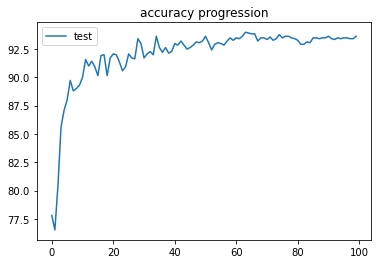

In [181]:
settings, save_dir = init()
import collections
from time import time
import random
from sklearn.metrics import f1_score, confusion_matrix
import pandas

torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
experiment_name = settings['experiment_name']
test ='bandits'
n_epochs = 100 #settings['n_epochs']
patients_removed = [6, 14, 16]
patients_left = [x for x in range(1,24) if x not in patients_removed]
print(patients_left)
p2p = P2P_AFPL(patients_left,10, test)
accuracies_local3 = p2p.loop(n_epochs, p2p, experiment_name)

[1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 15, 17, 18, 19, 20, 21, 22, 23]
0
losses before:  0
full train loss:  tensor(0.6906, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.7919, device='cuda:0', dtype=torch.float64)
client accuracy :  0
79.03225806451613
client accuracy :  1
77.77777777777779
client accuracy :  2
80.35714285714286
client accuracy :  3
60.37735849056604
client accuracy :  4
90.9090909090909
client accuracy :  5
79.54545454545455
client accuracy :  6
68.37606837606837
client accuracy :  7
89.1891891891892
client accuracy :  8
71.1864406779661
client accuracy :  9
97.16981132075472
client accuracy :  10
58.791208791208796
client accuracy :  11
75.71428571428571
client accuracy :  12
66.26984126984127
client accuracy :  13
78.04878048780488
client accuracy :  14
83.33333333333334
client accuracy :  15
88.57142857142857
client accuracy :  16
85.0
client accuracy :  17
55.55555555555556
client accuracy :  18
33.33333333333333
client accuracy :  19
88.67924528301

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
loss after my code:  0.22733208211471165
train loss after my code:  0.49692704675726884
val accuracy:  80.31272210376687
test accuracy:  79.57446808510639
2
losses before:  0
full train loss:  tensor(0.8304, device='cuda:0', dtype=torch.float64)
full loss:  tensor(1.0068, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  75.55081734186211
selected clients UCB:  [ 8  5  6 14 13]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.1950738593265896
train loss after my code:  0.27690223685500026
val accuracy:  82.87135749822318
test accuracy:  82.12765957446808
3
losses before:  0
full train loss:  tensor(0.6631, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.9132, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  81.2366737739872
selected clients UCB:  [10  7 12 11 19]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.24133503691183714
train loss after my code:  0.2587206642477187
val accuracy:  87.13574982231698
test accuracy:  86.52482269503547
4
losses before:  0
full train loss:  tensor(0.4239, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.7716, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  83.15565031982942
selected clients UCB:  [ 9 11  2  6 15]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
loss after my code:  0.23285811194232928
train loss after my code:  0.22997207702046235
val accuracy:  88.69936034115139
test accuracy:  88.01418439716312
5
losses before:  0
full train loss:  tensor(0.3828, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.7094, device='cuda:0', dtype=torch.float64)
client accuracy :  0
80.64516129032258
client accuracy :  1
81.48148148148148
client accuracy :  2
92.85714285714286
client accuracy :  3
73.58490566037736
client accuracy :  4
97.40259740259741
client accuracy :  5
84.0909090909091
client accuracy :  6
85.47008547008546
client accuracy :  7
89.1891891891892
client accuracy :  8
89.83050847457628
client accuracy :  9
99.05660377358491
client accuracy :  10
83.51648351648352
client accuracy :  11
90.0
client accuracy :  12
71.42857142857143
client accuracy :  13
85.36585365853658
client accuracy :  14
78.57142857142857
client accuracy :  15
77.14285714285715
client accur

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
loss after my code:  0.19522567885392708
train loss after my code:  0.3466853030320434
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
92.85714285714286
client accuracy :  3
77.35849056603774
client accuracy :  4
100.0
client accuracy :  5
90.9090909090909
client accuracy :  6
85.47008547008546
client accuracy :  7
100.0
client accuracy :  8
96.61016949152543
client accuracy :  9
99.05660377358491
client accuracy :  10
85.16483516483517
client accuracy :  11
90.0
client accuracy :  12
85.71428571428571
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
88.57142857142857
client accuracy :  16
60.0
client accuracy :  17
85.18518518518519
client accuracy :  18
96.29629629629629
client accuracy :  19
98.11320754716981
val accuracy:  89.76545842217483
client accuracy :  0
93.54838709677419
client accuracy :  1
92.5925925925926
clie

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.2240538984299596
train loss after my code:  0.23229845191906787
val accuracy:  89.76545842217483
test accuracy:  87.2340425531915
7
losses before:  0
full train loss:  tensor(0.1981, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3390, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  87.63326226012794
selected clients UCB:  [ 7 11 15 18  9]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
loss after my code:  0.0809905005388997
train loss after my code:  0.15329497287339267
val accuracy:  90.90262970859986
test accuracy:  89.21985815602837
8
losses before:  0
full train loss:  tensor(0.2743, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5033, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  85.85643212508884
selected clients UCB:  [ 7 11 15  2  6]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.21407993673961137
train loss after my code:  0.19445126007621935
val accuracy:  88.62828713574982
test accuracy:  87.58865248226951
9
losses before:  0
full train loss:  tensor(0.4659, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.6685, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  87.20682302771856
selected clients UCB:  [ 7  8 11 15 18]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
loss after my code:  0.20685434373734832
train loss after my code:  0.14960345578697634
val accuracy:  91.68443496801706
test accuracy:  90.70921985815603
10
losses before:  0
full train loss:  tensor(0.3137, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5378, device='cuda:0', dtype=torch.float64)
client accuracy :  0
95.16129032258065
client accuracy :  1
92.5925925925926
client accuracy :  2
85.71428571428571
client accuracy :  3
83.01886792452831
client accuracy :  4
100.0
client accuracy :  5
84.0909090909091
client accuracy :  6
87.17948717948718
client accuracy :  7
91.8918918918919
client accuracy :  8
98.30508474576271
client accuracy :  9
98.11320754716981
client accuracy :  10
64.83516483516483
client accuracy :  11
91.42857142857143
client accuracy :  12
80.55555555555556
client accuracy :  13
53.65853658536586
client accuracy :  14
97.61904761904762
client accuracy :  15
94.28571428571428
client accu

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.221664353215042
train loss after my code:  0.21049341630701265
client accuracy :  0
96.7741935483871
client accuracy :  1
96.29629629629629
client accuracy :  2
98.21428571428571
client accuracy :  3
83.01886792452831
client accuracy :  4
100.0
client accuracy :  5
88.63636363636364
client accuracy :  6
87.17948717948718
client accuracy :  7
94.5945945945946
client accuracy :  8
100.0
client accuracy :  9
98.11320754716981
client accuracy :  10
82.41758241758241
client accuracy :  11
91.42857142857143
client accuracy :  12
87.6984126984127
client accuracy :  13
90.2439024390244
client accuracy :  14
100.0
client accuracy :  15
94.28571428571428
client accuracy :  16
87.5
client accuracy :  17
81.48148148148148
client accuracy :  18
100.0
client accuracy :  19
98.11320754716981
val accuracy:  91.25799573560768
client accuracy :  0
93.54838709677419
client accuracy :  1
100.0
client accuracy :  2
98.2142

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.15714353734429512
train loss after my code:  0.1126941879906121
val accuracy:  88.55721393034825
test accuracy:  87.44680851063829
12
losses before:  0
full train loss:  tensor(0.5266, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.7536, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  85.28784648187633
selected clients UCB:  [ 7 15  2  3  1]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
loss after my code:  0.12766063745373069
train loss after my code:  0.13012225487835874
val accuracy:  90.19189765458422
test accuracy:  89.00709219858156
13
losses before:  0
full train loss:  tensor(0.1390, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4001, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  88.41506751954513
selected clients UCB:  [ 7  3 15 17 16]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
loss after my code:  0.11456787820493448
train loss after my code:  0.12212790795850142
val accuracy:  91.54228855721394
test accuracy:  91.27659574468086
14
losses before:  0
full train loss:  tensor(0.3241, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4685, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  89.62331201137171
selected clients UCB:  [ 7  3 17  4 14]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
loss after my code:  0.2163598996569191
train loss after my code:  0.17068954142716355
val accuracy:  92.03980099502488
test accuracy:  91.91489361702128
15
losses before:  0
full train loss:  tensor(0.2959, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.7488, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
81.48148148148148
client accuracy :  2
82.14285714285714
client accuracy :  3
83.01886792452831
client accuracy :  4
90.9090909090909
client accuracy :  5
77.27272727272727
client accuracy :  6
87.17948717948718
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
84.06593406593407
client accuracy :  11
87.14285714285714
client accuracy :  12
86.11111111111111
client accuracy :  13
82.92682926829268
client accuracy :  14
85.71428571428571
client accuracy :  15
71.42857142857143
client accuracy :  16


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.24886263823657748
train loss after my code:  0.18402927399051622
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
86.79245283018868
client accuracy :  4
93.5064935064935
client accuracy :  5
81.81818181818183
client accuracy :  6
87.17948717948718
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
84.06593406593407
client accuracy :  11
90.0
client accuracy :  12
88.88888888888889
client accuracy :  13
92.6829268292683
client accuracy :  14
97.61904761904762
client accuracy :  15
88.57142857142857
client accuracy :  16
80.0
client accuracy :  17
81.48148148148148
client accuracy :  18
88.88888888888889
client accuracy :  19
96.22641509433963
val accuracy:  90.68941009239516
client accuracy :  0
98.38709677419355
client accuracy :  1
85.18518518518519
cl

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.11216005276149366
train loss after my code:  0.10043897953779207
val accuracy:  90.97370291400142
test accuracy:  91.77304964539007
17
losses before:  0
full train loss:  tensor(0.1694, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4668, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  87.13574982231698
selected clients UCB:  [ 7 15 11 18  3]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.18351033637387693
train loss after my code:  0.11709620283417523
val accuracy:  91.75550817341862
test accuracy:  90.42553191489363
18
losses before:  0
full train loss:  tensor(0.1884, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4044, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  87.7043354655295
selected clients UCB:  [ 7 11  8 15 18]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
loss after my code:  0.13012331817097428
train loss after my code:  0.09943044136126532
val accuracy:  91.18692253020612
test accuracy:  90.2127659574468
19
losses before:  0
full train loss:  tensor(0.1662, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4696, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  89.19687277896233
selected clients UCB:  [ 7 11 18 15  3]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.18841873059281272
train loss after my code:  0.14403248137356175
val accuracy:  90.76048329779674
test accuracy:  88.86524822695036
20
losses before:  0
full train loss:  tensor(0.1116, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3526, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
92.85714285714286
client accuracy :  3
60.37735849056604
client accuracy :  4
98.7012987012987
client accuracy :  5
84.0909090909091
client accuracy :  6
94.01709401709401
client accuracy :  7
97.2972972972973
client accuracy :  8
98.30508474576271
client accuracy :  9
98.11320754716981
client accuracy :  10
82.41758241758241
client accuracy :  11
94.28571428571428
client accuracy :  12
89.28571428571429
client accuracy :  13
85.36585365853658
client accuracy :  14
100.0
client accuracy :  15
88.57142857142857
client accur

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.17120490626185084
train loss after my code:  0.07559973490733457
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
86.79245283018868
client accuracy :  4
98.7012987012987
client accuracy :  5
86.36363636363636
client accuracy :  6
94.01709401709401
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
82.41758241758241
client accuracy :  11
94.28571428571428
client accuracy :  12
91.26984126984127
client accuracy :  13
87.8048780487805
client accuracy :  14
100.0
client accuracy :  15
91.42857142857143
client accuracy :  16
85.0
client accuracy :  17
85.18518518518519
client accuracy :  18
100.0
client accuracy :  19
98.11320754716981
val accuracy:  92.60838663823738
client accuracy :  0
96.7741935483871
client accuracy :  1
100.0
client accuracy :  2
98.21

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.1213004190149249
train loss after my code:  0.09671793009103516
val accuracy:  91.54228855721394
test accuracy:  91.13475177304964
22
losses before:  0
full train loss:  tensor(0.1874, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5462, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  88.84150675195451
selected clients UCB:  [ 7 11 17 18 15]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.09956298210128807
train loss after my code:  0.09267167030076588
val accuracy:  91.82658137882018
test accuracy:  90.99290780141844
23
losses before:  0
full train loss:  tensor(0.1795, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5523, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  89.90760483297797
selected clients UCB:  [ 7 11 15 18  4]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
loss after my code:  0.17492365729186984
train loss after my code:  0.06713239319928128
val accuracy:  92.46624022743426
test accuracy:  91.77304964539007
24
losses before:  0
full train loss:  tensor(0.0472, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3372, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  90.40511727078892
selected clients UCB:  [ 7 15  5  1 16]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.1899554277664922
train loss after my code:  0.07020176117921953
val accuracy:  92.181947405828
test accuracy:  91.70212765957447
25
losses before:  0
full train loss:  tensor(0.1035, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4246, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
75.47169811320755
client accuracy :  4
100.0
client accuracy :  5
77.27272727272727
client accuracy :  6
93.16239316239316
client accuracy :  7
94.5945945945946
client accuracy :  8
98.30508474576271
client accuracy :  9
94.33962264150944
client accuracy :  10
84.06593406593407
client accuracy :  11
92.85714285714286
client accuracy :  12
88.09523809523809
client accuracy :  13
85.36585365853658
client accuracy :  14
97.61904761904762
client accuracy :  15
94.28571428571428
client accura

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.18306407522561222
train loss after my code:  0.10512061192008049
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
86.79245283018868
client accuracy :  4
100.0
client accuracy :  5
79.54545454545455
client accuracy :  6
93.16239316239316
client accuracy :  7
97.2972972972973
client accuracy :  8
100.0
client accuracy :  9
98.11320754716981
client accuracy :  10
84.06593406593407
client accuracy :  11
95.71428571428572
client accuracy :  12
89.28571428571429
client accuracy :  13
85.36585365853658
client accuracy :  14
97.61904761904762
client accuracy :  15
94.28571428571428
client accuracy :  16
82.5
client accuracy :  17
81.48148148148148
client accuracy :  18
100.0
client accuracy :  19
98.11320754716981
val accuracy:  91.96872778962332
client accuracy :  0
96.7741935483871
client accuracy :  1
100.0
client accura

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.2143054644599633
train loss after my code:  0.1539747153811673
val accuracy:  92.11087420042644
test accuracy:  91.20567375886525
27
losses before:  0
full train loss:  tensor(0.1236, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4293, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  90.33404406538736
selected clients UCB:  [ 7  9 17  2 14]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.29093860466412136
train loss after my code:  0.1396138978036944
val accuracy:  92.46624022743426
test accuracy:  90.85106382978724
28
losses before:  0
full train loss:  tensor(0.0831, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4119, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.181947405828
selected clients UCB:  [ 7  6 15 11 18]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.16999339092551188
train loss after my code:  0.08194611752865501
val accuracy:  93.24804548685147
test accuracy:  91.48936170212765
29
losses before:  0
full train loss:  tensor(0.0696, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3715, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  91.75550817341862
selected clients UCB:  [ 7 15 11  3  8]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.1492190831998888
train loss after my code:  0.07947690868177597
val accuracy:  92.82160625444207
test accuracy:  92.48226950354609
30
losses before:  0
full train loss:  tensor(0.1578, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4892, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
84.90566037735849
client accuracy :  4
97.40259740259741
client accuracy :  5
84.0909090909091
client accuracy :  6
89.74358974358975
client accuracy :  7
97.2972972972973
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
84.61538461538461
client accuracy :  11
97.14285714285714
client accuracy :  12
87.6984126984127
client accuracy :  13
85.36585365853658
client accuracy :  14
100.0
client accuracy :  15
94.28571428571428
client accuracy :  16
62.

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.24364979199481418
train loss after my code:  0.18217432334424016
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
86.79245283018868
client accuracy :  4
98.7012987012987
client accuracy :  5
86.36363636363636
client accuracy :  6
89.74358974358975
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
84.61538461538461
client accuracy :  11
97.14285714285714
client accuracy :  12
91.26984126984127
client accuracy :  13
92.6829268292683
client accuracy :  14
100.0
client accuracy :  15
94.28571428571428
client accuracy :  16
67.5
client accuracy :  17
85.18518518518519
client accuracy :  18
100.0
client accuracy :  19
98.11320754716981
val accuracy:  92.3951670220327
client accuracy :  0
98.38709677419355
client accuracy :  1
100.0
client accuracy :  2
92.85

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.3696963571190188
train loss after my code:  0.2672717996528074
val accuracy:  93.03482587064677
test accuracy:  91.34751773049645
32
losses before:  0
full train loss:  tensor(0.1777, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5242, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  91.18692253020612
selected clients UCB:  [ 7 17 16  1 13]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
loss after my code:  0.2072981024717508
train loss after my code:  0.18499163786554093
val accuracy:  92.53731343283582
test accuracy:  91.20567375886525
33
losses before:  0
full train loss:  tensor(0.1861, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5389, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  91.25799573560768
selected clients UCB:  [16  7  5  4 12]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.29178388587258314
train loss after my code:  0.15914391395296382
val accuracy:  92.89267945984363
test accuracy:  91.98581560283688
34
losses before:  0
full train loss:  tensor(0.0882, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4276, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.96375266524521
selected clients UCB:  [16  7 10 15  8]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
loss after my code:  0.33542498134406884
train loss after my code:  0.1709586879420946
val accuracy:  93.60341151385929
test accuracy:  91.77304964539007
35
losses before:  0
full train loss:  tensor(0.1296, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5381, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
81.13207547169812
client accuracy :  4
93.5064935064935
client accuracy :  5
81.81818181818183
client accuracy :  6
94.01709401709401
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
87.36263736263736
client accuracy :  11
95.71428571428572
client accuracy :  12
90.87301587301587
client accuracy :  13
87.8048780487805
client accuracy :  14
97.61904761904762
client accuracy :  15
94.28571428571428
client accuracy :  16
65

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.2888073229859392
train loss after my code:  0.12516762218382654
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
84.90566037735849
client accuracy :  4
97.40259740259741
client accuracy :  5
86.36363636363636
client accuracy :  6
94.01709401709401
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
87.36263736263736
client accuracy :  11
95.71428571428572
client accuracy :  12
90.87301587301587
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
94.28571428571428
client accuracy :  16
72.5
client accuracy :  17
88.88888888888889
client accuracy :  18
100.0
client accuracy :  19
98.11320754716981
val accuracy:  92.89267945984363
client accuracy :  0
98.38709677419355
client accuracy :  1
100.0
client accura

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.04271682351649046
train loss after my code:  0.09082908328082472
val accuracy:  92.46624022743426
test accuracy:  91.56028368794327
37
losses before:  0
full train loss:  tensor(0.2216, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.7138, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  91.4001421464108
selected clients UCB:  [ 7 15  8 11 19]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.47920151554451146
train loss after my code:  0.3108429042139711
val accuracy:  92.67945984363894
test accuracy:  91.56028368794327
38
losses before:  0
full train loss:  tensor(0.2357, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.6948, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  91.96872778962332
selected clients UCB:  [ 7 15  9 14  6]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.4089573967073561
train loss after my code:  0.19866778913912317
val accuracy:  93.46126510305615
test accuracy:  92.05673758865248
39
losses before:  0
full train loss:  tensor(0.1658, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5889, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.11087420042644
selected clients UCB:  [ 7 17 16  2  3]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.34149413853009253
train loss after my code:  0.22438252293853886
val accuracy:  93.03482587064677
test accuracy:  91.70212765957447
40
losses before:  0
full train loss:  tensor(0.0970, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5034, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
86.79245283018868
client accuracy :  4
97.40259740259741
client accuracy :  5
88.63636363636364
client accuracy :  6
93.16239316239316
client accuracy :  7
97.2972972972973
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
86.26373626373626
client accuracy :  11
97.14285714285714
client accuracy :  12
90.47619047619048
client accuracy :  13
90.2439024390244
client accuracy :  14
95.23809523809523
client accuracy :  15
91.42857142857143
client accu

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.035384547603372105
train loss after my code:  0.19960880531464287
client accuracy :  0
100.0
client accuracy :  1
96.29629629629629
client accuracy :  2
96.42857142857143
client accuracy :  3
86.79245283018868
client accuracy :  4
98.7012987012987
client accuracy :  5
88.63636363636364
client accuracy :  6
93.16239316239316
client accuracy :  7
97.2972972972973
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
86.26373626373626
client accuracy :  11
97.14285714285714
client accuracy :  12
90.47619047619048
client accuracy :  13
95.1219512195122
client accuracy :  14
97.61904761904762
client accuracy :  15
91.42857142857143
client accuracy :  16
90.0
client accuracy :  17
85.18518518518519
client accuracy :  18
100.0
client accuracy :  19
98.11320754716981
val accuracy:  93.46126510305615
client accuracy :  0
96.7741935483871
client accuracy :  1
96.29629629629629
c

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.08946867448275514
train loss after my code:  0.1697806411800792
val accuracy:  93.60341151385929
test accuracy:  92.41134751773049
42
losses before:  0
full train loss:  tensor(0.0696, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4158, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.67945984363894
selected clients UCB:  [ 2  7  4 13 12]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.13525921504526725
train loss after my code:  0.16805943024427153
val accuracy:  93.53233830845771
test accuracy:  92.12765957446808
43
losses before:  0
full train loss:  tensor(0.1007, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4183, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.3951670220327
selected clients UCB:  [ 2  4  7 10 15]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.37211599368929454
train loss after my code:  0.2808429596129892
val accuracy:  93.39019189765459
test accuracy:  91.27659574468086
44
losses before:  0
full train loss:  tensor(0.1590, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4981, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.25302061122956
selected clients UCB:  [ 2  4 11  7  3]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.2498296021028552
train loss after my code:  0.3141733384422265
val accuracy:  92.96375266524521
test accuracy:  92.2695035460993
45
losses before:  0
full train loss:  tensor(0.1534, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4013, device='cuda:0', dtype=torch.float64)
client accuracy :  0
100.0
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
86.79245283018868
client accuracy :  4
100.0
client accuracy :  5
90.9090909090909
client accuracy :  6
91.45299145299145
client accuracy :  7
89.1891891891892
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
85.16483516483517
client accuracy :  11
95.71428571428572
client accuracy :  12
93.25396825396825
client accuracy :  13
87.8048780487805
client accuracy :  14
97.61904761904762
client accuracy :  15
94.28571428571428
client accuracy :  16
85.0
client accur

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.03428451628481762
train loss after my code:  0.15954843907088317
client accuracy :  0
100.0
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
86.79245283018868
client accuracy :  4
100.0
client accuracy :  5
90.9090909090909
client accuracy :  6
91.45299145299145
client accuracy :  7
97.2972972972973
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
85.16483516483517
client accuracy :  11
97.14285714285714
client accuracy :  12
93.25396825396825
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
94.28571428571428
client accuracy :  16
85.0
client accuracy :  17
85.18518518518519
client accuracy :  18
100.0
client accuracy :  19
100.0
val accuracy:  93.60341151385929
client accuracy :  0
96.7741935483871
client accuracy :  1
96.29629629629629
client accuracy :  2
96.428

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.09104288223182133
train loss after my code:  0.09741539677692086
val accuracy:  93.60341151385929
test accuracy:  91.98581560283688
47
losses before:  0
full train loss:  tensor(0.0647, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3583, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.60838663823738
selected clients UCB:  [ 2  9 17 16  7]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.1042918940057204
train loss after my code:  0.0867227834439456
val accuracy:  93.10589907604833
test accuracy:  92.62411347517731
48
losses before:  0
full train loss:  tensor(0.0508, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3353, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.24804548685147
selected clients UCB:  [ 2  9 11  7 15]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.054553113615403014
train loss after my code:  0.06495033320067535
val accuracy:  93.46126510305615
test accuracy:  91.91489361702128
49
losses before:  0
full train loss:  tensor(0.0645, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3920, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.181947405828
selected clients UCB:  [ 2  9 18  8  7]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.12804616644744063
train loss after my code:  0.09579406214531035
val accuracy:  92.67945984363894
test accuracy:  92.34042553191489
50
losses before:  0
full train loss:  tensor(0.0779, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4406, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
98.21428571428571
client accuracy :  3
84.90566037735849
client accuracy :  4
100.0
client accuracy :  5
88.63636363636364
client accuracy :  6
90.5982905982906
client accuracy :  7
94.5945945945946
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
86.26373626373626
client accuracy :  11
95.71428571428572
client accuracy :  12
92.85714285714286
client accuracy :  13
85.36585365853658
client accuracy :  14
95.23809523809523
client accuracy :  15
91.42857142857143
client accuracy :  16
7

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.08240794281775149
train loss after my code:  0.09461225191540111
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
98.21428571428571
client accuracy :  3
84.90566037735849
client accuracy :  4
100.0
client accuracy :  5
88.63636363636364
client accuracy :  6
90.5982905982906
client accuracy :  7
94.5945945945946
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
86.26373626373626
client accuracy :  11
95.71428571428572
client accuracy :  12
92.85714285714286
client accuracy :  13
90.2439024390244
client accuracy :  14
95.23809523809523
client accuracy :  15
91.42857142857143
client accuracy :  16
75.0
client accuracy :  17
85.18518518518519
client accuracy :  18
100.0
client accuracy :  19
100.0
val accuracy:  92.89267945984363
client accuracy :  0
98.38709677419355
client accuracy :  1
100.0
client accuracy :  2
98.21

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.15803663147427477
train loss after my code:  0.09527624926552326
val accuracy:  93.95877754086709
test accuracy:  92.34042553191489
52
losses before:  0
full train loss:  tensor(0.0639, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4357, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.24804548685147
selected clients UCB:  [ 9  2 12 10 13]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.03870749822443126
train loss after my code:  0.056912866184940486
val accuracy:  93.81663113006397
test accuracy:  92.34042553191489
53
losses before:  0
full train loss:  tensor(0.0584, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4428, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.60838663823738
selected clients UCB:  [ 9  2 14  4  6]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.1024385884475274
train loss after my code:  0.06289900257662337
val accuracy:  93.03482587064677
test accuracy:  92.62411347517731
54
losses before:  0
full train loss:  tensor(0.0535, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4507, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.67945984363894
selected clients UCB:  [ 9 16 19 17  2]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.08804485976003446
train loss after my code:  0.08712284377605958
val accuracy:  93.24804548685147
test accuracy:  92.5531914893617
55
losses before:  0
full train loss:  tensor(0.0416, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4142, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
98.21428571428571
client accuracy :  3
79.24528301886792
client accuracy :  4
100.0
client accuracy :  5
88.63636363636364
client accuracy :  6
92.3076923076923
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
84.61538461538461
client accuracy :  11
95.71428571428572
client accuracy :  12
93.25396825396825
client accuracy :  13
87.8048780487805
client accuracy :  14
95.23809523809523
client accuracy :  15
91.42857142857143
client accuracy :  16
87.5
client ac

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.14268581093878221
train loss after my code:  0.09743505986097573
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
98.21428571428571
client accuracy :  3
81.13207547169812
client accuracy :  4
100.0
client accuracy :  5
88.63636363636364
client accuracy :  6
92.3076923076923
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
84.61538461538461
client accuracy :  11
95.71428571428572
client accuracy :  12
93.25396825396825
client accuracy :  13
90.2439024390244
client accuracy :  14
95.23809523809523
client accuracy :  15
91.42857142857143
client accuracy :  16
87.5
client accuracy :  17
88.88888888888889
client accuracy :  18
100.0
client accuracy :  19
100.0
val accuracy:  93.31911869225303
client accuracy :  0
98.38709677419355
client accuracy :  1
100.0
client accuracy :  2
96.4285714285714

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.12845845927528413
train loss after my code:  0.10480065637542277
val accuracy:  93.60341151385929
test accuracy:  92.12765957446808
57
losses before:  0
full train loss:  tensor(0.0745, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4441, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.03482587064677
selected clients UCB:  [ 3  9 15  2  7]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.11753425545701235
train loss after my code:  0.07889931356721362
val accuracy:  93.60341151385929
test accuracy:  92.2695035460993
58
losses before:  0
full train loss:  tensor(0.0958, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4296, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.31911869225303
selected clients UCB:  [ 3  9 18  8  4]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.11545746789580144
train loss after my code:  0.2336159636056876
val accuracy:  93.81663113006397
test accuracy:  93.04964539007092
59
losses before:  0
full train loss:  tensor(0.1205, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4033, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.39019189765459
selected clients UCB:  [ 3  9 14  6 19]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.17731691040449704
train loss after my code:  0.1679397310533967
val accuracy:  93.7455579246624
test accuracy:  93.12056737588652
60
losses before:  0
full train loss:  tensor(0.0943, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4038, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
84.90566037735849
client accuracy :  4
100.0
client accuracy :  5
88.63636363636364
client accuracy :  6
93.16239316239316
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
85.71428571428571
client accuracy :  11
95.71428571428572
client accuracy :  12
92.46031746031747
client accuracy :  13
87.8048780487805
client accuracy :  14
95.23809523809523
client accuracy :  15
91.42857142857143
client accuracy :  16
90.0
client ac

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.029263591674292926
train loss after my code:  0.11136968507861425
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
84.90566037735849
client accuracy :  4
100.0
client accuracy :  5
88.63636363636364
client accuracy :  6
93.16239316239316
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
85.71428571428571
client accuracy :  11
95.71428571428572
client accuracy :  12
92.46031746031747
client accuracy :  13
90.2439024390244
client accuracy :  14
95.23809523809523
client accuracy :  15
91.42857142857143
client accuracy :  16
90.0
client accuracy :  17
85.18518518518519
client accuracy :  18
100.0
client accuracy :  19
100.0
val accuracy:  93.46126510305615
client accuracy :  0
98.38709677419355
client accuracy :  1
100.0
client accuracy :  2
98.21428571428

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.09864265814999576
train loss after my code:  0.07866982718963694
val accuracy:  94.02985074626866
test accuracy:  93.12056737588652
62
losses before:  0
full train loss:  tensor(0.0473, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4047, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.60341151385929
selected clients UCB:  [12 10  9  7 15]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.13231366304237946
train loss after my code:  0.08273067155070302
val accuracy:  93.95877754086709
test accuracy:  93.04964539007092
63
losses before:  0
full train loss:  tensor(0.0583, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4171, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.46126510305615
selected clients UCB:  [11 18  3  8  7]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.11544294518410997
train loss after my code:  0.0656626929540801
val accuracy:  93.81663113006397
test accuracy:  92.90780141843972
64
losses before:  0
full train loss:  tensor(0.0550, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4012, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.67448471926085
selected clients UCB:  [ 2 15  9  6  4]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.09103562421709369
train loss after my code:  0.05845729105150683
val accuracy:  93.88770433546553
test accuracy:  93.19148936170212
65
losses before:  0
full train loss:  tensor(0.0477, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4036, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
84.90566037735849
client accuracy :  4
100.0
client accuracy :  5
90.9090909090909
client accuracy :  6
93.16239316239316
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
97.16981132075472
client accuracy :  10
86.26373626373626
client accuracy :  11
95.71428571428572
client accuracy :  12
92.46031746031747
client accuracy :  13
87.8048780487805
client accuracy :  14
97.61904761904762
client accuracy :  15
91.42857142857143
client accuracy :  16
90.0
client a

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.034011454492946014
train loss after my code:  0.05550616517450876
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
84.90566037735849
client accuracy :  4
100.0
client accuracy :  5
90.9090909090909
client accuracy :  6
93.16239316239316
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
86.26373626373626
client accuracy :  11
95.71428571428572
client accuracy :  12
92.46031746031747
client accuracy :  13
92.6829268292683
client accuracy :  14
97.61904761904762
client accuracy :  15
91.42857142857143
client accuracy :  16
90.0
client accuracy :  17
85.18518518518519
client accuracy :  18
100.0
client accuracy :  19
100.0
val accuracy:  93.7455579246624
client accuracy :  0
96.7741935483871
client accuracy :  1
100.0
client accuracy :  2
98.21428571428571

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.09938724778811531
train loss after my code:  0.06956648289504375
val accuracy:  93.88770433546553
test accuracy:  93.12056737588652
67
losses before:  0
full train loss:  tensor(0.0562, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4048, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.46126510305615
selected clients UCB:  [ 9  3 18  8  7]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.035768030659065454
train loss after my code:  0.05035239660369351
val accuracy:  93.7455579246624
test accuracy:  93.04964539007092
68
losses before:  0
full train loss:  tensor(0.0456, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3856, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.53233830845771
selected clients UCB:  [ 9  1 13 12 10]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.056495241062876025
train loss after my code:  0.06264567251027711
val accuracy:  93.88770433546553
test accuracy:  92.97872340425532
69
losses before:  0
full train loss:  tensor(0.0369, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3684, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.60341151385929
selected clients UCB:  [13  5 11  7 15]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.04473961079681273
train loss after my code:  0.04264467018840567
val accuracy:  93.95877754086709
test accuracy:  93.12056737588652
70
losses before:  0
full train loss:  tensor(0.0297, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3678, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
84.90566037735849
client accuracy :  4
100.0
client accuracy :  5
88.63636363636364
client accuracy :  6
93.16239316239316
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
86.26373626373626
client accuracy :  11
95.71428571428572
client accuracy :  12
94.04761904761905
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
94.28571428571428
client accuracy :  16
90.0
client 

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.017738139052498228
train loss after my code:  0.04514044991639558
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
88.67924528301887
client accuracy :  4
100.0
client accuracy :  5
88.63636363636364
client accuracy :  6
93.16239316239316
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
86.26373626373626
client accuracy :  11
95.71428571428572
client accuracy :  12
94.04761904761905
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
94.28571428571428
client accuracy :  16
90.0
client accuracy :  17
85.18518518518519
client accuracy :  18
100.0
client accuracy :  19
100.0
val accuracy:  94.10092395167023
client accuracy :  0
96.7741935483871
client accuracy :  1
100.0
client accuracy :  2
98.214285714285

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.031223994129258786
train loss after my code:  0.046635433367306446
val accuracy:  93.95877754086709
test accuracy:  92.8368794326241
72
losses before:  0
full train loss:  tensor(0.0308, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3897, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.67448471926085
selected clients UCB:  [13 14 18  8  3]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.06430821149233164
train loss after my code:  0.04626087111442944
val accuracy:  93.88770433546553
test accuracy:  93.33333333333333
73
losses before:  0
full train loss:  tensor(0.0347, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4050, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.60341151385929
selected clients UCB:  [13 11 15  7  9]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.036817449291108736
train loss after my code:  0.03795390766100853
val accuracy:  93.7455579246624
test accuracy:  92.97872340425532
74
losses before:  0
full train loss:  tensor(0.0260, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3829, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.7455579246624
selected clients UCB:  [ 2 15 11  7  3]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.005505546437156393
train loss after my code:  0.028478725479559194
val accuracy:  93.81663113006397
test accuracy:  93.12056737588652
75
losses before:  0
full train loss:  tensor(0.0252, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3883, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
83.01886792452831
client accuracy :  4
100.0
client accuracy :  5
90.9090909090909
client accuracy :  6
93.16239316239316
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
98.11320754716981
client accuracy :  10
86.26373626373626
client accuracy :  11
95.71428571428572
client accuracy :  12
93.25396825396825
client accuracy :  13
87.8048780487805
client accuracy :  14
97.61904761904762
client accuracy :  15
91.42857142857143
client accuracy :  16
90.0
client

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.07258497906272658
train loss after my code:  0.035822393623850465
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
84.90566037735849
client accuracy :  4
100.0
client accuracy :  5
90.9090909090909
client accuracy :  6
93.16239316239316
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
86.26373626373626
client accuracy :  11
95.71428571428572
client accuracy :  12
93.25396825396825
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
91.42857142857143
client accuracy :  16
90.0
client accuracy :  17
88.88888888888889
client accuracy :  18
100.0
client accuracy :  19
100.0
val accuracy:  93.88770433546553
client accuracy :  0
98.38709677419355
client accuracy :  1
100.0
client accuracy :  2
98.214285714285

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.06301086248185118
train loss after my code:  0.03943141216625242
val accuracy:  93.95877754086709
test accuracy:  93.40425531914893
77
losses before:  0
full train loss:  tensor(0.0492, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3855, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.81663113006397
selected clients UCB:  [19  6 17 16 14]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.06686568291530653
train loss after my code:  0.041616125555674434
val accuracy:  93.95877754086709
test accuracy:  93.47517730496455
78
losses before:  0
full train loss:  tensor(0.0576, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3774, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.7455579246624
selected clients UCB:  [13 15 11  7  8]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.05463108629811614
train loss after my code:  0.05670372790439266
val accuracy:  93.88770433546553
test accuracy:  93.26241134751773
79
losses before:  0
full train loss:  tensor(0.0412, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3731, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.95877754086709
selected clients UCB:  [18  3 15  9  2]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.0038576743316124976
train loss after my code:  0.041368523703639276
val accuracy:  94.02985074626866
test accuracy:  93.19148936170212
80
losses before:  0
full train loss:  tensor(0.0407, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3821, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
86.79245283018868
client accuracy :  4
100.0
client accuracy :  5
90.9090909090909
client accuracy :  6
93.16239316239316
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
98.11320754716981
client accuracy :  10
86.26373626373626
client accuracy :  11
95.71428571428572
client accuracy :  12
93.25396825396825
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
91.42857142857143
client accuracy :  16
90.0
clien

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.004632502161756808
train loss after my code:  0.04095903312286212
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
86.79245283018868
client accuracy :  4
100.0
client accuracy :  5
90.9090909090909
client accuracy :  6
93.16239316239316
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
86.26373626373626
client accuracy :  11
95.71428571428572
client accuracy :  12
93.25396825396825
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
91.42857142857143
client accuracy :  16
90.0
client accuracy :  17
88.88888888888889
client accuracy :  18
100.0
client accuracy :  19
100.0
val accuracy:  93.95877754086709
client accuracy :  0
100.0
client accuracy :  1
100.0
client accuracy :  2
98.21428571428571
client ac

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.021927465700031304
train loss after my code:  0.031474727131408524
val accuracy:  94.17199715707179
test accuracy:  93.47517730496455
82
losses before:  0
full train loss:  tensor(0.0257, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3760, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.81663113006397
selected clients UCB:  [ 6  5  1 12 10]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.018511526208665523
train loss after my code:  0.025919587351742695
val accuracy:  93.95877754086709
test accuracy:  93.04964539007092
83
losses before:  0
full train loss:  tensor(0.0230, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3704, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.7455579246624
selected clients UCB:  [ 9  2 18  3  8]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.04499728743825647
train loss after my code:  0.025908877969754666
val accuracy:  93.88770433546553
test accuracy:  93.26241134751773
84
losses before:  0
full train loss:  tensor(0.0338, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3696, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.88770433546553
selected clients UCB:  [11  7 15  9  2]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.03996822377706923
train loss after my code:  0.028073660515264085
val accuracy:  94.02985074626866
test accuracy:  93.26241134751773
85
losses before:  0
full train loss:  tensor(0.0350, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3612, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
98.21428571428571
client accuracy :  3
84.90566037735849
client accuracy :  4
100.0
client accuracy :  5
90.9090909090909
client accuracy :  6
93.16239316239316
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
85.71428571428571
client accuracy :  11
95.71428571428572
client accuracy :  12
93.25396825396825
client accuracy :  13
87.8048780487805
client accuracy :  14
97.61904761904762
client accuracy :  15
91.42857142857143
client accuracy :  16
90.0
client 

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.05918014156599843
train loss after my code:  0.044175593509087514
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
98.21428571428571
client accuracy :  3
84.90566037735849
client accuracy :  4
100.0
client accuracy :  5
90.9090909090909
client accuracy :  6
93.16239316239316
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
85.71428571428571
client accuracy :  11
95.71428571428572
client accuracy :  12
93.25396825396825
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
94.28571428571428
client accuracy :  16
90.0
client accuracy :  17
88.88888888888889
client accuracy :  18
100.0
client accuracy :  19
100.0
val accuracy:  93.95877754086709
client accuracy :  0
100.0
client accuracy :  1
100.0
client accuracy :  2
98.21428571428571
client ac

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.039940219697907176
train loss after my code:  0.048943841640393816
val accuracy:  94.24307036247335
test accuracy:  93.12056737588652
87
losses before:  0
full train loss:  tensor(0.0345, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3836, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.88770433546553
selected clients UCB:  [14 13  6  4 11]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.011800102121998684
train loss after my code:  0.03454171703288575
val accuracy:  93.95877754086709
test accuracy:  93.19148936170212
88
losses before:  0
full train loss:  tensor(0.0434, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3804, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.81663113006397
selected clients UCB:  [ 9  2 15  7  5]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.0769162257841198
train loss after my code:  0.04353391277564121
val accuracy:  93.95877754086709
test accuracy:  93.19148936170212
89
losses before:  0
full train loss:  tensor(0.0421, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3652, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  94.10092395167023
selected clients UCB:  [ 1 12 10  3 18]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.00035946422891320717
train loss after my code:  0.04212744401711605
val accuracy:  94.17199715707179
test accuracy:  92.97872340425532
90
losses before:  0
full train loss:  tensor(0.0340, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3735, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
84.90566037735849
client accuracy :  4
100.0
client accuracy :  5
90.9090909090909
client accuracy :  6
93.16239316239316
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
86.81318681318682
client accuracy :  11
95.71428571428572
client accuracy :  12
93.25396825396825
client accuracy :  13
87.8048780487805
client accuracy :  14
97.61904761904762
client accuracy :  15
94.28571428571428
client accuracy :  16
90.0
clien

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.04146832147868905
train loss after my code:  0.04104152863138957
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
84.90566037735849
client accuracy :  4
100.0
client accuracy :  5
90.9090909090909
client accuracy :  6
93.16239316239316
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
86.81318681318682
client accuracy :  11
95.71428571428572
client accuracy :  12
93.25396825396825
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
94.28571428571428
client accuracy :  16
90.0
client accuracy :  17
88.88888888888889
client accuracy :  18
100.0
client accuracy :  19
100.0
val accuracy:  94.02985074626866
client accuracy :  0
96.7741935483871
client accuracy :  1
100.0
client accuracy :  2
98.21428571428571

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.03570591003771362
train loss after my code:  0.05114724818835534
val accuracy:  93.95877754086709
test accuracy:  93.12056737588652
92
losses before:  0
full train loss:  tensor(0.0422, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3757, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.88770433546553
selected clients UCB:  [14 13  6  7 15]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.04449374111407945
train loss after my code:  0.05764564089124094
val accuracy:  93.95877754086709
test accuracy:  93.04964539007092
93
losses before:  0
full train loss:  tensor(0.0484, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3734, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.95877754086709
selected clients UCB:  [11  3 18  8  7]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.0
train loss after my code:  0.0484206330130025
val accuracy:  93.95877754086709
test accuracy:  93.12056737588652
94
losses before:  0
full train loss:  tensor(0.0467, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3687, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  94.02985074626866
selected clients UCB:  [ 9  2  1  5 12]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.0
train loss after my code:  0.04674430196341333
val accuracy:  94.02985074626866
test accuracy:  93.04964539007092
95
losses before:  0
full train loss:  tensor(0.0352, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3654, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
84.90566037735849
client accuracy :  4
100.0
client accuracy :  5
90.9090909090909
client accuracy :  6
93.16239316239316
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
98.11320754716981
client accuracy :  10
86.81318681318682
client accuracy :  11
95.71428571428572
client accuracy :  12
93.25396825396825
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
94.28571428571428
client accuracy :  16
90.0
client accuracy :  17
88

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.005665040205237974
train loss after my code:  0.03663083153672598
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
96.42857142857143
client accuracy :  3
84.90566037735849
client accuracy :  4
100.0
client accuracy :  5
90.9090909090909
client accuracy :  6
93.16239316239316
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
99.05660377358491
client accuracy :  10
86.81318681318682
client accuracy :  11
95.71428571428572
client accuracy :  12
93.25396825396825
client accuracy :  13
90.2439024390244
client accuracy :  14
97.61904761904762
client accuracy :  15
94.28571428571428
client accuracy :  16
90.0
client accuracy :  17
88.88888888888889
client accuracy :  18
100.0
client accuracy :  19
100.0
val accuracy:  94.02985074626866
client accuracy :  0
98.38709677419355
client accuracy :  1
100.0
client accuracy :  2
98.214285714285

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.03820524602450507
train loss after my code:  0.037988316072370285
val accuracy:  94.10092395167023
test accuracy:  92.97872340425532
97
losses before:  0
full train loss:  tensor(0.0351, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3641, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  94.10092395167023
selected clients UCB:  [6 7 9 2 3]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.0
train loss after my code:  0.035098993043174605
val accuracy:  94.10092395167023
test accuracy:  93.12056737588652
98
losses before:  0
full train loss:  tensor(0.0281, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3687, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.88770433546553
selected clients UCB:  [18  8 15  7 11]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.02778985860506557
train loss after my code:  0.04318365831170585
val accuracy:  93.95877754086709
test accuracy:  92.76595744680851
99
losses before:  0
full train loss:  tensor(0.0361, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3608, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  94.02985074626866
selected clients UCB:  [15  9  2  7  3]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.0
train loss after my code:  0.036101651321933735
val accuracy:  94.02985074626866
test accuracy:  93.04964539007092


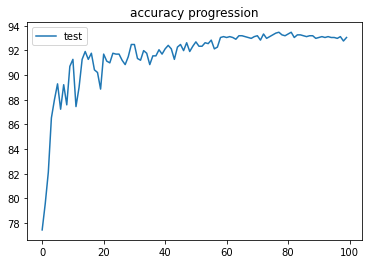

In [176]:
settings, save_dir = init()
import collections
from time import time
import random
from sklearn.metrics import f1_score, confusion_matrix
import pandas

torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
experiment_name = settings['experiment_name']
test ='bandits'
n_epochs = 100 #settings['n_epochs']
patients_removed = [6, 14, 16]
patients_left = [x for x in range(1,24) if x not in patients_removed]
print(patients_left)
p2p = P2P_AFPL(patients_left,5, test)
accuracies_local2 = p2p.loop(n_epochs, p2p, experiment_name)

[1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 15, 17, 18, 19, 20, 21, 22, 23]
0
losses before:  0
full train loss:  tensor(0.6906, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.7919, device='cuda:0', dtype=torch.float64)
client accuracy :  0
79.03225806451613
client accuracy :  1
77.77777777777779
client accuracy :  2
80.35714285714286
client accuracy :  3
60.37735849056604
client accuracy :  4
90.9090909090909
client accuracy :  5
79.54545454545455
client accuracy :  6
68.37606837606837
client accuracy :  7
89.1891891891892
client accuracy :  8
71.1864406779661
client accuracy :  9
97.16981132075472
client accuracy :  10
58.791208791208796
client accuracy :  11
75.71428571428571
client accuracy :  12
66.26984126984127
client accuracy :  13
78.04878048780488
client accuracy :  14
83.33333333333334
client accuracy :  15
88.57142857142857
client accuracy :  16
85.0
client accuracy :  17
55.55555555555556
client accuracy :  18
33.33333333333333
client accuracy :  19
88.67924528301

client accuracy :  2
92.85714285714286
client accuracy :  3
45.28301886792453
client accuracy :  4
92.20779220779221
client accuracy :  5
79.54545454545455
client accuracy :  6
84.61538461538461
client accuracy :  7
83.78378378378379
client accuracy :  8
100.0
client accuracy :  9
96.22641509433963
client accuracy :  10
82.41758241758241
client accuracy :  11
94.28571428571428
client accuracy :  12
88.4920634920635
client accuracy :  13
85.36585365853658
client accuracy :  14
92.85714285714286
client accuracy :  15
94.28571428571428
client accuracy :  16
87.5
client accuracy :  17
70.37037037037037
client accuracy :  18
81.48148148148148
client accuracy :  19
90.56603773584906
val accuracy:  87.42004264392324
client accuracy :  0
98.38709677419355
client accuracy :  1
100.0
client accuracy :  2
94.64285714285714
client accuracy :  3
39.62264150943396
client accuracy :  4
84.4155844155844
client accuracy :  5
95.45454545454545
client accuracy :  6
91.45299145299145
client accuracy :  7


client accuracy :  8
98.30508474576271
client accuracy :  9
96.26168224299066
client accuracy :  10
84.61538461538461
client accuracy :  11
88.57142857142857
client accuracy :  12
88.93280632411067
client accuracy :  13
90.2439024390244
client accuracy :  14
83.33333333333334
client accuracy :  15
97.14285714285714
client accuracy :  16
87.8048780487805
client accuracy :  17
74.07407407407408
client accuracy :  18
100.0
client accuracy :  19
96.22641509433963
test accuracy:  91.77304964539007
21
losses before:  0
full train loss:  tensor(0.0325, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4218, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  91.6133617626155
we are done
val accuracy:  91.6133617626155
test accuracy:  92.12765957446808
22
losses before:  0
full train loss:  tensor(0.0041, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4600, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.32409381663112
we are done
val

val accuracy before bandits:  92.181947405828
we are done
val accuracy:  92.181947405828
test accuracy:  92.12765957446808
33
losses before:  0
full train loss:  tensor(0.0020, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5316, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.3951670220327
we are done
val accuracy:  92.3951670220327
test accuracy:  92.62411347517731
34
losses before:  0
full train loss:  tensor(0.0020, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5646, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.46624022743426
we are done
val accuracy:  92.46624022743426
test accuracy:  92.8368794326241
35
losses before:  0
full train loss:  tensor(0.0065, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5216, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
96.29629629629629
client accuracy :  2
94.64285714285714
client accuracy :  3
86.79245283018868

client accuracy :  6
88.88888888888889
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
98.11320754716981
client accuracy :  10
87.36263736263736
client accuracy :  11
94.28571428571428
client accuracy :  12
90.47619047619048
client accuracy :  13
92.6829268292683
client accuracy :  14
92.85714285714286
client accuracy :  15
94.28571428571428
client accuracy :  16
92.5
client accuracy :  17
81.48148148148148
client accuracy :  18
100.0
client accuracy :  19
98.11320754716981
val accuracy before bandits:  92.75053304904051
we are done
client accuracy :  0
98.38709677419355
client accuracy :  1
96.29629629629629
client accuracy :  2
94.64285714285714
client accuracy :  3
83.01886792452831
client accuracy :  4
98.7012987012987
client accuracy :  5
90.9090909090909
client accuracy :  6
88.88888888888889
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
98.11320754716981
client accuracy :  10
87.36263736263736
client accuracy :  11
94.28571

client accuracy :  11
94.28571428571428
client accuracy :  12
91.26984126984127
client accuracy :  13
92.6829268292683
client accuracy :  14
92.85714285714286
client accuracy :  15
94.28571428571428
client accuracy :  16
92.5
client accuracy :  17
81.48148148148148
client accuracy :  18
100.0
client accuracy :  19
98.11320754716981
val accuracy:  92.89267945984363
client accuracy :  0
98.38709677419355
client accuracy :  1
100.0
client accuracy :  2
94.64285714285714
client accuracy :  3
90.56603773584906
client accuracy :  4
98.7012987012987
client accuracy :  5
97.72727272727273
client accuracy :  6
94.01709401709401
client accuracy :  7
100.0
client accuracy :  8
98.30508474576271
client accuracy :  9
96.26168224299066
client accuracy :  10
85.71428571428571
client accuracy :  11
91.42857142857143
client accuracy :  12
88.93280632411067
client accuracy :  13
90.2439024390244
client accuracy :  14
92.85714285714286
client accuracy :  15
97.14285714285714
client accuracy :  16
90.2439

client accuracy :  15
97.14285714285714
client accuracy :  16
92.6829268292683
client accuracy :  17
88.88888888888889
client accuracy :  18
100.0
client accuracy :  19
96.22641509433963
test accuracy:  93.12056737588652
66
losses before:  0
full train loss:  tensor(0.0002, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5694, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.89267945984363
we are done
val accuracy:  92.89267945984363
test accuracy:  92.90780141843972
67
losses before:  0
full train loss:  tensor(0.0002, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5547, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.75053304904051
we are done
val accuracy:  92.75053304904051
test accuracy:  92.97872340425532
68
losses before:  0
full train loss:  tensor(0.0001, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5504, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.89267945984363
we are

val accuracy before bandits:  92.82160625444207
we are done
val accuracy:  92.82160625444207
test accuracy:  93.04964539007092
79
losses before:  0
full train loss:  tensor(4.2195e-05, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5501, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.82160625444207
we are done
val accuracy:  92.82160625444207
test accuracy:  93.04964539007092
80
losses before:  0
full train loss:  tensor(4.2070e-05, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5486, device='cuda:0', dtype=torch.float64)
client accuracy :  0
98.38709677419355
client accuracy :  1
96.29629629629629
client accuracy :  2
94.64285714285714
client accuracy :  3
86.79245283018868
client accuracy :  4
98.7012987012987
client accuracy :  5
88.63636363636364
client accuracy :  6
89.74358974358975
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
98.11320754716981
client accuracy :  10
86.81318681318682
client accuracy :  

client accuracy :  10
87.36263736263736
client accuracy :  11
94.28571428571428
client accuracy :  12
90.47619047619048
client accuracy :  13
92.6829268292683
client accuracy :  14
92.85714285714286
client accuracy :  15
94.28571428571428
client accuracy :  16
92.5
client accuracy :  17
81.48148148148148
client accuracy :  18
100.0
client accuracy :  19
98.11320754716981
val accuracy before bandits:  92.82160625444207
we are done
client accuracy :  0
98.38709677419355
client accuracy :  1
92.5925925925926
client accuracy :  2
94.64285714285714
client accuracy :  3
86.79245283018868
client accuracy :  4
98.7012987012987
client accuracy :  5
88.63636363636364
client accuracy :  6
89.74358974358975
client accuracy :  7
100.0
client accuracy :  8
100.0
client accuracy :  9
98.11320754716981
client accuracy :  10
87.36263736263736
client accuracy :  11
94.28571428571428
client accuracy :  12
90.47619047619048
client accuracy :  13
92.6829268292683
client accuracy :  14
92.85714285714286
cli

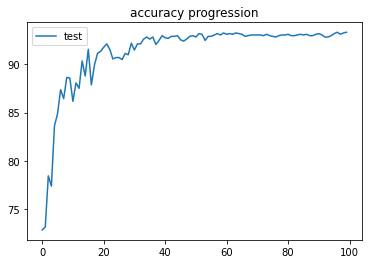

In [177]:
settings, save_dir = init()
import collections
from time import time
import random
from sklearn.metrics import f1_score, confusion_matrix
import pandas

torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
experiment_name = settings['experiment_name']
test ='local'
n_epochs = 100 #settings['n_epochs']
patients_removed = [6, 14, 16]
patients_left = [x for x in range(1,24) if x not in patients_removed]
print(patients_left)
p2p = P2P_AFPL(patients_left,5, test)
accuracies_local = p2p.loop(n_epochs, p2p, experiment_name)

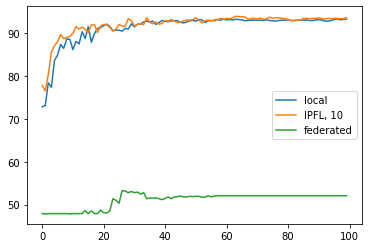

In [190]:
plt.plot(accuracies_local,label='local')
#plt.plot(accuracies_local2,label='IPFL, 5')
plt.plot(accuracies_local3,label='IPFL, 10')
#plt.plot(accuracies_local4,label='IPFL, without UCB')
plt.plot(accuracies_fed,label='federated')
plt.legend()

In [187]:
print(np.max(accuracies_local))
print(np.max(accuracies_local2))
print(np.max(accuracies_local3))
print(np.max(accuracies_local4))

93.33333333333333
93.47517730496455
93.97163120567376
92.97872340425532


### Old results

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
0
full train loss:  tensor(0.8770, device='cuda:0', dtype=torch.float64)
full loss:  tensor(1.1211, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  55.28846153846154
we are done
val accuracy:  55.28846153846154
test accuracy:  55.97826086956522
1
full train loss:  tensor(0.6228, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.7745, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  67.54807692307693
we are done
val accuracy:  67.54807692307693
test accuracy:  68.47826086956522
2
full train loss:  tensor(0.3428, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4439, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  78.60576923076923
we are done
val accuracy:  78.60576923076923
test accuracy:  79.34782608695652
3
full train loss:  tensor(0.2666, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3545, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  83.17

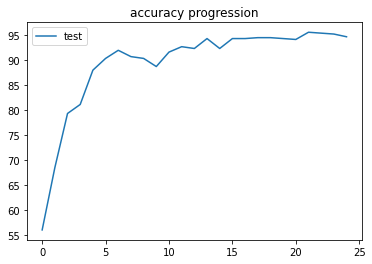

In [72]:
settings, save_dir = init()
import collections
from time import time
import random
from sklearn.metrics import f1_score, confusion_matrix
import pandas

torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
experiment_name = settings['experiment_name']
test ='local'
n_epochs = 25 #settings['n_epochs']
patients_left = [x for x in range(1,11)]
print(patients_left)
p2p = P2P_AFPL(patients_left,5, test)
accuracies_local = p2p.loop(n_epochs, p2p, experiment_name)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
0
full train loss:  tensor(0.6924, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.7759, device='cuda:0', dtype=torch.float64)
[ 6.73076923  2.64423077  8.17307692  5.52884615 10.81730769  1.44230769
  6.25       11.77884615  6.49038462  7.93269231]
val accuracy before bandits:  67.78846153846155
selected clients UCB:  [9 8 7 6 5 4 3 2 0]
[0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
loss after my code:  0.26546496236618555
train loss after my code:  0.21744809254292563
[ 9.61538462  3.60576923  6.73076923  6.00961538  9.13461538  1.68269231
  6.25       11.29807692  6.49038462  7.69230769]
val accuracy:  68.50961538461539
[ 9.23913043  3.98550725  5.79710145  6.70289855  7.42753623  1.08695652
  6.88405797 11.77536232  6.52173913  6.70289855]
test accuracy:  66.12318840579711
1
full train loss:  tensor(0.2798, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3503, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  79.807692307692

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [8 6 5 9 7 4 3 2 1]
[0. 0. 0. 1. 1. 1. 1. 0. 1. 1.]
loss after my code:  0.1976038260113196
train loss after my code:  0.19164287791685147
val accuracy:  78.125
test accuracy:  78.98550724637681
2
full train loss:  tensor(0.4613, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5754, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  79.32692307692307


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [8 6 5 9 4 3 0 7 2]
[1. 0. 0. 1. 0. 1. 1. 1. 1. 1.]
loss after my code:  0.17054259217568754
train loss after my code:  0.15009861445660647
val accuracy:  81.73076923076923
test accuracy:  78.98550724637681
3
full train loss:  tensor(0.2464, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2799, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  85.8173076923077


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [8 6 5 9 3 0 7 4 2]
[1. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
loss after my code:  0.17378326806685773
train loss after my code:  0.16404889145728843
val accuracy:  81.97115384615384
test accuracy:  83.15217391304348
4
full train loss:  tensor(0.2843, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4546, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  86.0576923076923


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [6 9 8 5 0 3 7 4 2]
[1. 0. 1. 0. 1. 0. 1. 1. 1. 1.]
loss after my code:  0.17953003652846702
train loss after my code:  0.1580074232029173
val accuracy:  83.41346153846155
test accuracy:  88.22463768115942
5
full train loss:  tensor(0.3117, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5591, device='cuda:0', dtype=torch.float64)
[10.81730769  4.80769231  8.41346154  5.76923077  9.85576923  2.88461538
  6.25       16.82692308  6.25       10.33653846]
val accuracy before bandits:  82.21153846153845


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [6 9 8 0 5 7 4 3 2]
[1. 0. 1. 1. 0. 0. 0. 0. 1. 0.]
loss after my code:  0.13991698662429666
train loss after my code:  0.14427295514741334
[11.29807692  4.32692308  8.89423077  7.45192308 13.22115385  2.88461538
  6.73076923 14.18269231  6.49038462 10.57692308]
val accuracy:  86.0576923076923
[10.6884058   4.52898551  9.05797101  7.60869565 13.4057971   2.7173913
  7.60869565 14.49275362  6.70289855 10.50724638]
test accuracy:  87.31884057971014
6
full train loss:  tensor(0.1505, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2553, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  87.98076923076923


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [8 6 0 9 5 3 7 4 2]
[1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
loss after my code:  0.11923981206654208
train loss after my code:  0.10210093205259792
val accuracy:  89.90384615384616
test accuracy:  92.21014492753623
7
full train loss:  tensor(0.1319, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2681, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  87.25961538461539


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [8 6 0 9 5 3 7 4 2]
[1. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
loss after my code:  0.18750517875684883
train loss after my code:  0.11621966309748621
val accuracy:  86.53846153846155
test accuracy:  86.23188405797102
8
full train loss:  tensor(0.1974, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3090, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  87.01923076923077


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [8 0 6 9 3 7 5 2 4]
[1. 0. 1. 1. 1. 1. 0. 1. 1. 1.]
loss after my code:  0.16996271447775904
train loss after my code:  0.14609510307927898
val accuracy:  83.65384615384616
test accuracy:  84.60144927536231
9
full train loss:  tensor(0.2474, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4365, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  86.0576923076923


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [0 8 9 6 3 7 5 2 4]
[1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
loss after my code:  0.185379487926885
train loss after my code:  0.10315709153940995
val accuracy:  86.77884615384616
test accuracy:  86.77536231884058
10
full train loss:  tensor(0.1803, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5034, device='cuda:0', dtype=torch.float64)
[11.29807692  4.56730769  7.93269231  8.17307692 13.46153846  2.88461538
  4.32692308 16.58653846  6.73076923 10.57692308]
val accuracy before bandits:  86.53846153846155


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [0 8 9 6 3 7 5 2 4]
[0. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
loss after my code:  0.17281940400334747
train loss after my code:  0.12079569142619101
[11.29807692  4.56730769  6.73076923  8.41346154 13.70192308  2.88461538
  6.73076923 11.29807692  6.73076923 10.57692308]
val accuracy:  82.9326923076923
[11.23188406  4.52898551  5.61594203  8.69565217 13.76811594  2.89855072
  7.60869565 11.77536232  6.70289855 10.32608696]
test accuracy:  83.15217391304348
11
full train loss:  tensor(0.0842, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1485, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.0673076923077


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [8 0 6 3 9 7 5 2 4]
[1. 0. 0. 1. 1. 0. 1. 1. 1. 1.]
loss after my code:  0.09650440899215092
train loss after my code:  0.06622291654837799
val accuracy:  91.58653846153845
test accuracy:  92.7536231884058
12
full train loss:  tensor(0.0695, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1274, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  90.38461538461539


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [8 0 6 3 9 7 5 4 2]
[1. 0. 0. 1. 1. 0. 1. 1. 0. 0.]
loss after my code:  0.09600419091111782
train loss after my code:  0.05442204674780749
val accuracy:  90.625
test accuracy:  91.12318840579711
13
full train loss:  tensor(0.1261, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2078, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  87.5


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [8 0 6 3 9 7 4 5 2]
[1. 0. 0. 0. 1. 0. 1. 0. 1. 1.]
loss after my code:  0.16503662956667828
train loss after my code:  0.14071889675832822
val accuracy:  84.375
test accuracy:  84.42028985507247
14
full train loss:  tensor(0.0481, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1216, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  94.47115384615384


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [8 0 6 3 9 7 4 5 2]
[1. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
loss after my code:  0.08979930010757226
train loss after my code:  0.0543319833262939
val accuracy:  93.99038461538461
test accuracy:  95.1086956521739
15
full train loss:  tensor(0.0502, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1208, device='cuda:0', dtype=torch.float64)
[10.81730769  4.56730769  9.375       8.41346154 13.94230769  3.125
  6.97115385 16.58653846  6.73076923 10.09615385]
val accuracy before bandits:  90.625


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [8 0 6 9 3 7 4 5 2]
[0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
loss after my code:  0.10691395225822617
train loss after my code:  0.06585379953720713
[10.81730769  4.56730769  9.375       8.41346154 13.94230769  3.125
  6.97115385 15.86538462  6.73076923 10.09615385]
val accuracy:  89.90384615384616
[10.50724638  4.52898551  8.87681159  8.87681159 13.76811594  2.89855072
  7.60869565 15.39855072  6.70289855  9.96376812]
test accuracy:  89.13043478260869
16
full train loss:  tensor(0.1180, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1677, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  88.9423076923077


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [8 0 6 9 3 7 4 5 2]
[1. 0. 1. 0. 0. 0. 1. 1. 0. 0.]
loss after my code:  0.11551805940044571
train loss after my code:  0.060609748210981335
val accuracy:  93.02884615384616
test accuracy:  93.84057971014492
17
full train loss:  tensor(0.0464, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1186, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.3076923076923


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [8 0 6 9 7 3 4 2 5]
[1. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
loss after my code:  0.08385693841875635
train loss after my code:  0.04304816488417735
val accuracy:  94.47115384615384
test accuracy:  94.02173913043478
18
full train loss:  tensor(0.0222, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1205, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.26923076923077


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [0 8 6 7 9 3 4 2 5]
[1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
loss after my code:  0.10913285448431204
train loss after my code:  0.05424037449746431
val accuracy:  91.34615384615384
test accuracy:  92.7536231884058
19
full train loss:  tensor(0.0213, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1434, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  93.26923076923077


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [0 8 6 7 9 3 4 2 5]
[1. 0. 1. 1. 1. 0. 1. 1. 0. 0.]
loss after my code:  0.1284204612805796
train loss after my code:  0.04291362940708886
val accuracy:  91.34615384615384
test accuracy:  92.21014492753623
20
full train loss:  tensor(0.0222, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1141, device='cuda:0', dtype=torch.float64)
[10.81730769  4.80769231  9.61538462  6.97115385 13.70192308  3.36538462
  6.73076923 18.99038462  6.73076923 10.57692308]
val accuracy before bandits:  92.3076923076923


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [0 6 8 7 3 9 4 2 5]
[1. 0. 1. 0. 1. 0. 1. 1. 1. 0.]
loss after my code:  0.102241088898375
train loss after my code:  0.03406102893496676
[10.81730769  4.80769231  9.375       6.97115385 13.70192308  3.36538462
  6.73076923 19.23076923  6.73076923 10.57692308]
val accuracy:  92.3076923076923
[10.14492754  4.89130435  9.42028986  8.87681159 13.22463768  2.89855072
  7.60869565 20.28985507  6.70289855 10.32608696]
test accuracy:  94.38405797101449
21
full train loss:  tensor(0.0384, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2207, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.54807692307693


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [0 6 8 7 3 9 4 2 5]
[1. 0. 1. 1. 1. 0. 1. 1. 1. 0.]
loss after my code:  0.1986576152591462
train loss after my code:  0.03528764905517825
val accuracy:  93.26923076923077
test accuracy:  90.03623188405797
22
full train loss:  tensor(0.0139, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1247, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  94.71153846153845


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [0 6 8 7 3 4 9 2 5]
[1. 0. 1. 1. 1. 0. 1. 1. 1. 1.]
loss after my code:  0.11473853327891549
train loss after my code:  0.018277253094958416
val accuracy:  95.1923076923077
test accuracy:  94.02173913043478
23
full train loss:  tensor(0.0174, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2131, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.54807692307693


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [0 6 8 7 3 4 9 2 5]
[1. 0. 1. 1. 1. 0. 1. 1. 1. 0.]
loss after my code:  0.20317335927825428
train loss after my code:  0.0402307553539473
val accuracy:  90.625
test accuracy:  89.67391304347827
24
full train loss:  tensor(0.0328, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1856, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  91.58653846153845


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [0 6 8 7 3 4 2 9 5]
[1. 0. 0. 1. 1. 0. 1. 1. 0. 1.]
loss after my code:  0.16976154800897825
train loss after my code:  0.06314463690046976
val accuracy:  90.86538461538461
test accuracy:  90.39855072463769


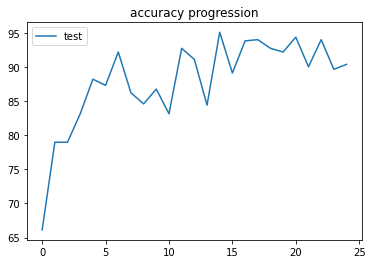

In [116]:
settings, save_dir = init()
import collections
from time import time
import random
from sklearn.metrics import f1_score, confusion_matrix
import pandas

torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
experiment_name = settings['experiment_name']
test = settings['type']
n_epochs = 25 #settings['n_epochs']
patients_left = [x for x in range(1,11)]
print(patients_left)
p2p = P2P_AFPL(patients_left,9, test)
accuracies_mine3 = p2p.loop(n_epochs, p2p, experiment_name)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
0
full train loss:  tensor(0.8770, device='cuda:0', dtype=torch.float64)
full loss:  tensor(1.1211, device='cuda:0', dtype=torch.float64)
[5.04807692 1.92307692 6.49038462 5.28846154 9.13461538 2.16346154
 6.25       9.85576923 2.64423077 6.49038462]
val accuracy before bandits:  55.28846153846154
selected clients UCB:  [9 8 7 6 5 4 3 2 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.2859861139561108
train loss after my code:  0.19851739734617108
[10.81730769  1.92307692  7.93269231  5.28846154 12.98076923  1.44230769
  6.73076923 17.54807692  4.32692308 10.33653846]
val accuracy:  79.32692307692307
[10.14492754  2.17391304  8.15217391  7.06521739 11.95652174  0.9057971
  7.24637681 18.11594203  4.16666667  9.96376812]
test accuracy:  79.8913043478261
1
full train loss:  tensor(0.6245, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5831, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  78.36538461538461


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [9 8 7 6 5 4 3 2 1]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
loss after my code:  0.20980250516946303
train loss after my code:  0.13914924381372462
val accuracy:  86.29807692307693
test accuracy:  86.95652173913044
2
full train loss:  tensor(0.4712, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5346, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  75.48076923076923


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [5 0 9 8 7 6 4 3 2]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
loss after my code:  0.1479667285530356
train loss after my code:  0.10086868863693085
val accuracy:  88.22115384615384
test accuracy:  89.85507246376811
3
full train loss:  tensor(0.1273, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2266, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  88.70192307692307


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [5 0 9 8 7 6 4 3 2]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.135955988992845
train loss after my code:  0.09411351460200368
val accuracy:  88.46153846153845
test accuracy:  89.13043478260869
4
full train loss:  tensor(0.2132, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3077, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  84.13461538461539


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [5 3 0 9 8 7 6 4 2]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
loss after my code:  0.1543432492502697
train loss after my code:  0.10801937163198476
val accuracy:  82.6923076923077
test accuracy:  84.60144927536231
5
full train loss:  tensor(0.2490, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3520, device='cuda:0', dtype=torch.float64)
[ 9.61538462  3.60576923  9.61538462  5.76923077 13.70192308  2.16346154
  6.25       15.38461538  6.49038462  7.69230769]
val accuracy before bandits:  80.28846153846155


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [5 3 0 9 8 7 6 4 2]
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
loss after my code:  0.15839623182180834
train loss after my code:  0.10153259699840599
[10.09615385  4.08653846  9.61538462  7.21153846 13.70192308  2.40384615
  6.49038462 12.01923077  6.73076923 10.09615385]
val accuracy:  82.45192307692307
[ 9.42028986  4.89130435  9.7826087   7.42753623 13.76811594  1.99275362
  7.78985507 11.77536232  6.70289855  9.05797101]
test accuracy:  82.6086956521739
6
full train loss:  tensor(0.3781, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4849, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  78.36538461538461


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [5 3 2 0 9 8 7 6 4]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
loss after my code:  0.125025594508371
train loss after my code:  0.06691477157951756
val accuracy:  89.42307692307693
test accuracy:  90.21739130434783
7
full train loss:  tensor(0.1821, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2740, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  78.84615384615384


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [5 3 2 0 9 8 7 6 4]
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
loss after my code:  0.14605296392283457
train loss after my code:  0.10547486762261223
val accuracy:  81.73076923076923
test accuracy:  84.60144927536231
8
full train loss:  tensor(0.1485, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2294, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  87.98076923076923


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [5 6 3 2 0 9 8 7 4]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.11799463179684208
train loss after my code:  0.07022959849959852
val accuracy:  90.38461538461539
test accuracy:  92.02898550724638
9
full train loss:  tensor(0.1574, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2514, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  85.33653846153845


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [5 3 6 2 0 9 8 7 4]
[0. 0. 0. 1. 0. 1. 1. 0. 0. 1.]
loss after my code:  0.1390104027692879
train loss after my code:  0.07823144537877519
val accuracy:  86.29807692307693
test accuracy:  89.4927536231884
10
full train loss:  tensor(0.1014, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2085, device='cuda:0', dtype=torch.float64)
[11.29807692  4.56730769  8.89423077  6.97115385 13.22115385  1.92307692
  6.49038462 18.26923077  6.25       10.57692308]
val accuracy before bandits:  88.46153846153845


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [5 3 6 9 2 0 8 7 4]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
loss after my code:  0.12051520788536253
train loss after my code:  0.04543668735558795
[11.29807692  4.56730769  9.85576923  6.97115385 13.70192308  1.92307692
  6.49038462 17.78846154  6.73076923 10.57692308]
val accuracy:  89.90384615384616
[10.86956522  4.89130435  9.60144928  8.69565217 13.4057971   2.35507246
  7.60869565 17.75362319  6.52173913 10.32608696]
test accuracy:  92.02898550724638
11
full train loss:  tensor(0.0305, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1171, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.78846153846155


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [5 3 6 9 2 0 8 7 4]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.08704881776682821
train loss after my code:  0.03480990387961946
val accuracy:  92.78846153846155
test accuracy:  94.38405797101449
12
full train loss:  tensor(0.1154, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2467, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  91.34615384615384


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [5 3 6 9 2 0 8 7 4]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
loss after my code:  0.16458391995429297
train loss after my code:  0.043014492707878375
val accuracy:  89.1826923076923
test accuracy:  91.84782608695652
13
full train loss:  tensor(0.1048, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2222, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  86.53846153846155


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [5 3 6 9 2 0 8 7 4]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.1060180957581563
train loss after my code:  0.025304686498466282
val accuracy:  90.14423076923077
test accuracy:  94.56521739130434
14
full train loss:  tensor(0.0820, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1740, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  86.29807692307693


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [5 3 6 9 2 0 8 7 4]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.10642482738297025
train loss after my code:  0.03571202422333433
val accuracy:  90.38461538461539
test accuracy:  92.3913043478261
15
full train loss:  tensor(0.0537, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1748, device='cuda:0', dtype=torch.float64)
[11.05769231  4.56730769  9.13461538  7.69230769 13.46153846  2.88461538
  7.21153846 19.23076923  6.73076923  9.85576923]
val accuracy before bandits:  91.82692307692307


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [5 3 6 9 2 0 8 7 4]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
loss after my code:  0.10396844296557294
train loss after my code:  0.0313634137605565
[11.05769231  4.56730769  8.41346154  7.21153846 13.46153846  2.88461538
  6.73076923 19.23076923  6.73076923 10.57692308]
val accuracy:  90.86538461538461
[10.32608696  4.89130435  8.33333333  8.69565217 13.22463768  3.07971014
  7.78985507 19.56521739  6.70289855 10.32608696]
test accuracy:  92.93478260869566
16
full train loss:  tensor(0.0784, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2186, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  89.66346153846155


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [5 6 3 9 2 0 8 7 4]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
loss after my code:  0.1322800353754316
train loss after my code:  0.03838820394266001
val accuracy:  91.34615384615384
test accuracy:  93.11594202898551
17
full train loss:  tensor(0.0829, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2336, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  90.625


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [5 6 3 9 8 2 0 7 4]
[0. 0. 0. 1. 0. 1. 0. 1. 1. 1.]
loss after my code:  0.12491340379913829
train loss after my code:  0.027139696928634733
val accuracy:  92.0673076923077
test accuracy:  93.29710144927536
18
full train loss:  tensor(0.0229, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1331, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  91.58653846153845


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [5 3 9 6 8 7 2 0 4]
[0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
loss after my code:  0.11089912262509033
train loss after my code:  0.01202027156621975
val accuracy:  92.3076923076923
test accuracy:  92.7536231884058
19
full train loss:  tensor(0.0269, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1279, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.54807692307693


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [5 9 6 3 8 2 7 4 0]
[0. 0. 0. 1. 1. 0. 1. 0. 1. 0.]
loss after my code:  0.10206222968442806
train loss after my code:  0.026740700373149774
val accuracy:  91.58653846153845
test accuracy:  92.93478260869566
20
full train loss:  tensor(0.0197, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1194, device='cuda:0', dtype=torch.float64)
[ 9.61538462  4.56730769  9.61538462  7.69230769 13.70192308  3.125
  6.73076923 18.50961538  6.73076923 10.57692308]
val accuracy before bandits:  90.86538461538461


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [5 6 3 9 8 4 2 7 0]
[0. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
loss after my code:  0.0919967827617351
train loss after my code:  0.026993161194650634
[10.09615385  4.80769231  9.375       7.93269231 13.70192308  3.125
  7.21153846 18.26923077  6.73076923 10.57692308]
val accuracy:  91.82692307692307
[ 9.05797101  4.89130435  9.60144928  8.87681159 13.58695652  3.07971014
  7.60869565 18.29710145  6.70289855 10.32608696]
test accuracy:  92.02898550724638
21
full train loss:  tensor(0.0383, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1806, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.54807692307693


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [5 6 9 3 8 4 2 7 0]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
loss after my code:  0.12320098491002296
train loss after my code:  0.024341524616385585
val accuracy:  91.58653846153845
test accuracy:  92.93478260869566
22
full train loss:  tensor(0.0154, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1303, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.3076923076923


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [5 6 9 3 8 4 2 7 0]
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1.]
loss after my code:  0.10632653406971411
train loss after my code:  0.014540731382050458
val accuracy:  91.34615384615384
test accuracy:  93.84057971014492
23
full train loss:  tensor(0.0097, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1356, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.0673076923077


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [5 6 9 8 4 3 2 7 0]
[0. 0. 1. 1. 1. 0. 1. 0. 0. 1.]
loss after my code:  0.12487424022108592
train loss after my code:  0.014221520225829324
val accuracy:  92.3076923076923
test accuracy:  94.92753623188406
24
full train loss:  tensor(0.0113, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1165, device='cuda:0', dtype=torch.float64)
val accuracy before bandits:  92.78846153846155


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


selected clients UCB:  [5 6 9 4 3 8 2 7 0]
[0. 0. 1. 1. 1. 0. 1. 1. 0. 1.]
loss after my code:  0.0950316985156225
train loss after my code:  0.012914950289718471
val accuracy:  92.0673076923077
test accuracy:  94.56521739130434


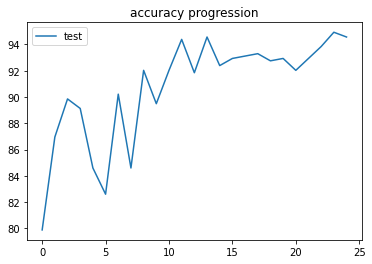

In [102]:
settings, save_dir = init()
import collections
from time import time
import random
from sklearn.metrics import f1_score, confusion_matrix
import pandas

torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
experiment_name = settings['experiment_name']
test = settings['type']
n_epochs = 25 #settings['n_epochs']
patients_left = [x for x in range(1,11)]
print(patients_left)
p2p = P2P_AFPL(patients_left,9, test)
accuracies_mine2 = p2p.loop(n_epochs, p2p, experiment_name)

[[ 0.  0. 10.  8.  9.  2.  6. 13. 16.  9.]
 [ 6.  0. 19.  5. 16.  4. 18. 10. 14. 15.]
 [ 8.  5.  0. 10. 16.  2. 17. 11. 21. 16.]
 [ 7.  7. 21.  0. 16.  5. 14. 11. 18. 12.]
 [ 8.  7. 14.  9.  0.  1. 19. 11. 18. 14.]
 [ 5. 10.  9.  6.  8.  0. 14.  7.  9.  6.]
 [ 7.  9. 15.  3. 17.  2.  1.  8. 16. 13.]
 [ 5.  3.  5.  5.  4.  0.  4.  0. 17. 10.]
 [10.  5. 19. 15. 12.  2. 13. 13.  0. 14.]
 [ 8.  8. 15.  4. 17.  1. 12. 10. 10.  0.]]


<Figure size 432x288 with 0 Axes>

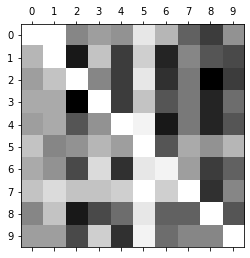

In [105]:
print(np.transpose(phi))
fig = plt.figure()
plt.matshow(10-np.transpose(phi),cmap='gray')
plt.xticks(np.arange(0,10,1));
plt.yticks(np.arange(0,10,1)); # diagonal should be zeros but I fucked it up a little 